# Ejercicio 1. PGR

## Descripción general de la tabla

https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico

Información actualizada de las carpetas de investigación de la Fiscalia General de Justicia (FGJ) de la Cdmx apartir de **enero de 2016**.

Las variables contenidas son Carpetas de Investigación de delitos a nivel calle de la FGJ por FIscalía, Agenica, Unidad de Investigación (UI), fecha de apertura de la carpeta de investigación, delito, categoría de delito, calle, colonia, alcaldía, coordenadas, mes y año.

Actualizaciones mensuales (**última actualización 29 de julio de 2020**) 

**Nota**
1. Pueden presentarse diferencias en lo reportado del Secretariado, ya que el reporte mensual se basa en criterios de homologación del resto de los estados, y solo considera delitos del fuero común excluyendo:
    * incompetencias por tipo de fuero
    * incompetencias por territorio
    * hechos no delictivos
    * denuncias de hechos
    * hechos delicitivos cometidos por menores de edad
    

## Preguntas

1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario
hacerlas. Sólo describe la prueba y qué te dice cada una.

2. ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los
datos?
3. ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más
frecuentes?

4. Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten
cuidado con los delitos con pocas ocurrencias).

5. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?.¿Por qué crees que sea
esto?

6. Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la
semana, quincenas)?

8. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

9. Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada
Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de
población no esté actualizado).

    9.1. Pinta un mapa con este indicador. Describe los resultados.

10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de
desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

11. Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra
patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de
Machine Learning no supervisados).
    11.1. ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en
común?

12. Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con
y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos
delitos?

# Librerías y datos

In [121]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
pgr = pd.read_csv('data/48fcb848-220c-4af0-839b-4fd8ac812c0f', delimiter = ",")

/home/abraxas/venv/opi/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Resolución

In [50]:
pgr.sample(5)

_id  ao_hechos mes_hechos         fecha_hechos  ao_inicio  \
931589    931590     2017.0      Julio  2017-07-09 12:00:00       2018   
168516    168517     2017.0    Febrero  2017-02-26 18:30:00       2017   
302818    302819     2018.0     Agosto  2018-08-21 13:45:00       2018   
336693    336694     2018.0  Diciembre  2018-12-16 12:30:00       2018   
1110471  1110472     2020.0  Noviembre  2020-11-16 21:55:00       2020   

        mes_inicio         fecha_inicio  \
931589       Marzo  2018-03-03T11:48:00   
168516     Febrero  2017-02-26T19:23:47   
302818      Agosto  2018-08-22T10:20:00   
336693   Diciembre  2018-12-19T09:57:00   
1110471  Noviembre  2020-11-16T23:36:46   

                                                    delito  \
931589                         FALSIFICACION DE DOCUMENTOS   
168516                          ROBO DE ACCESORIOS DE AUTO   
302818          ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA   
336693   DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES I...   
1110471                DAÑO EN PROPIEDAD AJENA INTENCIONAL   

                                                 fiscalia agencia  \
931589                      INVESTIGACIÓN EN AZCAPOTZALCO    AZ-1   
168516               INVESTIGACIÓN EN MAGDALENA CONTRERAS    MC-2   
302818               INVESTIGACIÓN EN VENUSTIANO CARRANZA    VC-2   
336693                 INVESTIGACIÓN EN GUSTAVO A. MADERO   GAM-6   
1110471  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN TLALPAN   TLP-3   

        unidad_investigacion        categoria_delito  \
931589                UI-3SD  DELITO DE BAJO IMPACTO   
168516                UI-2CD  DELITO DE BAJO IMPACTO   
302818                UI-1SD  DELITO DE BAJO IMPACTO   
336693                UI-3CD  DELITO DE BAJO IMPACTO   
1110471               UI-2CD  DELITO DE BAJO IMPACTO   

                              calle_hechos     calle_hechos2  \
931589                         FAJA DE ORO               NaN   
168516                    CORONA DEL ROSAL   FRANCISCO VILLA   
302818   BOULEVARD PUERTO AEREO NUMERO 123               NaN   
336693                  CALZ. DE GUADALUPE  AVENIDA EXELSIOR   
1110471                 CDA. DE TEZOQUIPAN               NaN   

               colonia_hechos         alcaldia_hechos  competencia   longitud  \
931589              PETROLERA            AZCAPOTZALCO          NaN -99.199753   
168516              EL TANQUE  LA MAGDALENA CONTRERAS          NaN -99.246582   
302818   MOCTEZUMA 2A SECCIÓN     VENUSTIANO CARRANZA          NaN -99.094310   
336693             INDUSTRIAL        GUSTAVO A MADERO          NaN -99.122561   
1110471              POLOTLAN                 TLALPAN  FUERO COMUN -99.163206   

           latitud  tempo  
931589   19.485025    NaN  
168516   19.325393    NaN  
302818   19.424373    NaN  
336693   19.471524    NaN  
1110471  19.281746    NaN

## ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

1. Reliability

    a.  Accuracy: 

        The data provided is accurate

        * API checar si las coordenadas corresponden a domiclio 
        * Fechas con sentido (no fechas >= a la mínima
        * Coordenadas dentro de la ciudad de México

        The data representation (or value) reflects well the actual state of the source information

        * Cruzar información de reporte de plataforma contra mismos agrupados: The data representation (or value) reflects well the actual state of the source information (+-10% variación de los resultados, ya que no coinciden al 100% por lo comentado en la **Nota** inicial)

        The representation of information (data) will not cause ambiguity
        * Datos vacíos: The representation of information (data) will not cause ambiguity

    b. Integrity

        The data format is clear and meets the criteria


        * Se respetan los catálogos de datos (categoría de delito, fiscalía, agencia, unidad de investigación):The data format is clear and meets the criteria
        Data is consistent with structural integrity
        * Tipos de datos
        * Rangos aceptables para variables numéricas 
        * Si hay transformaciones de variables como columnas deben de tener completo sentido
        
    c. Completeness

        Whether a component deficiency will affect the accuracy and integrity of the data
        * fechas >= fecha suceso
        * Id's únicos
        * Coordenadas corresponden al domicilio
        * Coordenadas dentro del país
        * Outliers
        * Missings
    
2. Presentation quality :
    a. Readability
        The data (content, format, etc.) is clear and understandable
        Data description, classification, and coding content meet specification and are easy to understand

        * Existencia de diccionario
        * Existencia de catálogos

Clasificación basada en:

https://translate.google.com/translate?hl=en&sl=es&u=https://blog.powerdata.es/el-valor-de-la-gestion-de-datos/bid/368784/introducci-n-a-la-calidad-de-datos-definici-n-control-y-beneficios&prev=search&pto=aue

## ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [53]:
pgr['fecha_hechos'] = pgr['fecha_hechos'].apply(lambda x: x if not type(x) == str else datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
pgr['fecha_inicio'] = pgr['fecha_inicio'].apply(lambda x: x if not type(x) == str else datetime.strptime(x,'%Y-%m-%dT%H:%M:%S'))

In [59]:
print(f'Total de delitos registrados: {len(pgr)}\n', f'Fecha mínima para hechos: {pgr.fecha_hechos.min()}\n',
      f'Fecha mínima para inicios de carpeta: {pgr.fecha_inicio.min()}')

Total de delitos registrados: 1168250
 Fecha mínima para hechos: 1906-06-02 19:00:00
 Fecha mínima para inicios de carpeta: 2016-01-01 01:35:06


# Limpieza de datos

In [60]:
pgr.shape

(1168250, 20)

#### Tipo de datos

In [61]:
pgr.dtypes.to_frame()

0
_id                            int64
ao_hechos                    float64
mes_hechos                    object
fecha_hechos          datetime64[ns]
ao_inicio                      int64
mes_inicio                    object
fecha_inicio          datetime64[ns]
delito                        object
fiscalia                      object
agencia                       object
unidad_investigacion          object
categoria_delito              object
calle_hechos                  object
calle_hechos2                 object
colonia_hechos                object
alcaldia_hechos               object
competencia                   object
longitud                     float64
latitud                      float64
tempo                        float64

In [62]:
pgr.isnull().sum()

_id                           0
ao_hechos                   433
mes_hechos                  433
fecha_hechos                433
ao_inicio                     0
mes_inicio                    0
fecha_inicio                  0
delito                        0
fiscalia                      2
agencia                       0
unidad_investigacion        227
categoria_delito              0
calle_hechos               2969
calle_hechos2            709215
colonia_hechos            47432
alcaldia_hechos            3177
competencia             1064079
longitud                  46464
latitud                   46464
tempo                   1168250
dtype: int64

**NULOS**
* Fecha_hechos
    Imputar nulos de fechas con 1900-01-01 (asegurarnos que no hay registros con este valor)

* Fiscalia, unidad_investigacion, calle_hechos, calle_hechoS2, colonia_hechos, alcaldia_hechos, competencia
    Imputar con "SIN INFORMACIÓN"
    
* Longitud/latitud
    No imputar

* Tempo
    Eliminar

In [63]:
pgr['mes_hechos'] = pgr.fecha_hechos.dt.month
pgr['ao_hechos'] = pgr.fecha_hechos.dt.year

In [64]:
pgr['mes_inicio'] = pgr.fecha_inicio.dt.month
pgr['ao_inicio'] = pgr.fecha_inicio.dt.year

In [65]:
col_str = ['delito', 'fiscalia', 'agencia','unidad_investigacion', 'categoria_delito', 'calle_hechos',
           'calle_hechos2', 'colonia_hechos', 'alcaldia_hechos', 'competencia']
col_int = ['_id', 'ao_hechos', 'mes_hechos','ao_inicio','mes_inicio']
col_dt = ['fecha_hechos','fecha_inicio']
col_float = ['longitud', 'latitud', 'tempo']

In [66]:
#Asegurarme que no olvido o me sobra alguna variable
print(len(set(col_dt+col_float+col_int+col_str))/len(pgr.columns),
      len(col_dt+col_float+col_int+col_str)/len(pgr.columns))

1.0 1.0


In [67]:
col_str

['delito',
 'fiscalia',
 'agencia',
 'unidad_investigacion',
 'categoria_delito',
 'calle_hechos',
 'calle_hechos2',
 'colonia_hechos',
 'alcaldia_hechos',
 'competencia']

In [68]:
pgr[col_str] = pgr[col_str].astype(str)

In [69]:
col_float

['longitud', 'latitud', 'tempo']

In [70]:
pgr[col_float] = pgr[col_float].astype(float)

In [71]:
pgr[col_int] = pgr[col_int].astype(pd.Int32Dtype())

In [72]:
pgr.dtypes.to_frame()

0
_id                            Int32
ao_hechos                      Int32
mes_hechos                     Int32
fecha_hechos          datetime64[ns]
ao_inicio                      Int32
mes_inicio                     Int32
fecha_inicio          datetime64[ns]
delito                        object
fiscalia                      object
agencia                       object
unidad_investigacion          object
categoria_delito              object
calle_hechos                  object
calle_hechos2                 object
colonia_hechos                object
alcaldia_hechos               object
competencia                   object
longitud                     float64
latitud                      float64
tempo                        float64

#### Categorías, rangos y outliers

* Latitud (-90,90)
* Longitud (-180,180)
* Fecha inicio >= 2016
* Fecha hechos <= fecha_inicio
* Tempo >= 0

In [73]:
pgr[['latitud','longitud','ao_hechos','ao_inicio','tempo']].describe()

latitud      longitud     ao_hechos     ao_inicio  tempo
count  1.121786e+06  1.121786e+06  1.167817e+06  1.168250e+06    0.0
mean   1.938754e+01 -9.913727e+01  2.017964e+03  2.018112e+03    NaN
std    6.966439e-02  5.970430e-02  1.734185e+00  1.422001e+00    NaN
min    1.909535e+01 -1.002319e+02  1.906000e+03  2.016000e+03    NaN
25%    1.934020e+01 -9.917550e+01  2.017000e+03  2.017000e+03    NaN
50%    1.939013e+01 -9.914218e+01  2.018000e+03  2.018000e+03    NaN
75%    1.943771e+01 -9.910001e+01  2.019000e+03  2.019000e+03    NaN
max    1.958333e+01 -9.894686e+01  2.021000e+03  2.021000e+03    NaN

In [74]:
pgr[pgr.ao_inicio<2016]

Empty DataFrame
Columns: [_id, ao_hechos, mes_hechos, fecha_hechos, ao_inicio, mes_inicio, fecha_inicio, delito, fiscalia, agencia, unidad_investigacion, categoria_delito, calle_hechos, calle_hechos2, colonia_hechos, alcaldia_hechos, competencia, longitud, latitud, tempo]
Index: []

In [75]:
len(pgr[(pgr.fecha_hechos.dt.date>pgr.fecha_inicio.dt.date)])/len(pgr)

8.38861545046009e-05

In [96]:
len(pgr._id)/len(pgr)

1.0

* Las coordenadas entran dentro del rango

* Inicio de carpetas si es apartir de 2016

* Fecha hechos > fecha inicio (sin contar diferencia de horas) son datos que no cumplen con data accuracy ya que no pudo haberse cometido délito después de iniciar la carpeta de investigación. ¿O sí?

**Beredicto**: Son eliminados 0.00003886%

* _id si es un identificador para cada carpeta de investigación

In [78]:
pgr = pgr[~(pgr.fecha_hechos.dt.date>pgr.fecha_inicio.dt.date)].reset_index(drop=True).copy()

In [79]:
pgr.shape

(1168152, 20)

In [80]:
pgr.columns

Index(['_id', 'ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio',
       'mes_inicio', 'fecha_inicio', 'delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'categoria_delito', 'calle_hechos',
       'calle_hechos2', 'colonia_hechos', 'alcaldia_hechos', 'competencia',
       'longitud', 'latitud', 'tempo'],
      dtype='object')

In [81]:
pgr.drop(['tempo'],axis=1,inplace=True)

In [82]:
pgr.columns

Index(['_id', 'ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio',
       'mes_inicio', 'fecha_inicio', 'delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'categoria_delito', 'calle_hechos',
       'calle_hechos2', 'colonia_hechos', 'alcaldia_hechos', 'competencia',
       'longitud', 'latitud'],
      dtype='object')

In [83]:
ident = ['id']
var_cont = ['longitud', 'latitud']
var_disc = ['ao_hechos','ao_inicio',]
var_cat  = ['mes_hechos','mes_inicio','delito', 'fiscalia', 'agencia','unidad_investigacion', 'categoria_delito', 
            'calle_hechos','calle_hechos2', 'colonia_hechos', 'alcaldia_hechos', 'competencia']
var_dts  = ['fecha_hechos','fecha_inicio']

In [84]:
#Asegurarme que no olvido o me sobra alguna variable
print(len(set(ident+var_cont+var_disc+var_cat+var_dts))/len(pgr.columns),
      len(ident+var_cont+var_disc+var_cat+var_dts)/len(pgr.columns))

1.0 1.0


In [85]:
for columna in var_cat:
    print(columna,'*'*10,pgr[columna].value_counts(1),'-'*5,len(pgr[columna].unique()))

mes_hechos ********** 1     0.093322
2     0.090523
10    0.087744
3     0.084797
8     0.084068
11    0.082795
9     0.082279
5     0.080927
7     0.080018
12    0.079815
6     0.078339
4     0.075373
Name: mes_hechos, dtype: Float64 ----- 13
mes_inicio ********** 2     0.092859
1      0.09252
10    0.088795
3     0.084758
8     0.084506
11    0.082475
9     0.081632
7     0.080881
12     0.07905
5     0.078988
6     0.078079
4     0.075458
Name: mes_inicio, dtype: Float64 ----- 12
delito ********** VIOLENCIA FAMILIAR                                                        9.956838e-02
FRAUDE                                                                    6.042878e-02
ROBO DE OBJETOS                                                           5.900174e-02
ROBO A NEGOCIO SIN VIOLENCIA                                              5.595419e-02
AMENAZAS                                                                  5.243068e-02
                                                           

## ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

pgr = pgr.drop(columns=['n'])

In [94]:
pgr['num_delitos'] = 1

In [118]:
group_delito = pgr[['num_delitos','delito']].groupby(['delito']).sum().sort_values(by='num_delitos',ascending=False)/len(pgr)*100

In [119]:
group_delito

num_delitos
delito                                                         
VIOLENCIA FAMILIAR                                     9.956838
FRAUDE                                                 6.042878
ROBO DE OBJETOS                                        5.900174
ROBO A NEGOCIO SIN VIOLENCIA                           5.595419
AMENAZAS                                               5.243068
...                                                         ...
SECUESTRO                                              0.000086
ASOCIACION DELICTUOSA                                  0.000086
PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL Y...     0.000086
VIOLACION Y ROBO DE VEHICULO                           0.000086
CALUMNIAS                                              0.000086

[341 rows x 1 columns]

## Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

In [539]:
fecha_final = datetime.today()
fecha_inicial = fecha_final-timedelta(weeks=52)

In [540]:
pgr_lastyear = pgr[(pgr.fecha_hechos>=fecha_inicial) & (pgr.fecha_hechos<=fecha_final)].copy()

In [541]:
lista_fechas = pd.date_range(fecha_inicial,fecha_final,freq='D').strftime('%Y-%m').unique().tolist()

### Mes-anio

In [542]:
pgr_lastyear = pgr_lastyear[~pgr_lastyear.fecha_hechos.isnull()].copy()

pgr_lastyear['mes_anio_hechos'] = pgr_lastyear['fecha_hechos'].apply(lambda x: x.strftime('%Y-%m'))
pgr_lastyear['semana_anio_hechos'] = pgr_lastyear['fecha_hechos'].apply(lambda x: x.strftime('%Y-%WS'))

In [543]:
group_delito_lastyear = pgr_lastyear[['num_delitos','delito']].groupby(['delito']).sum().sort_values(by='num_delitos',ascending=False)
group_delito_lastyear.reset_index(inplace=True)
group_delito_lastyear['pct_delitos'] = group_delito_lastyear['num_delitos']/len(pgr_lastyear)*100

In [544]:
def crecimiento(periodo,data):
    if periodo == 'semanas':
        columna = 'semana_anio_hechos'
    elif periodo == 'mes':
        columna =  'mes_anio_hechos'
    agrupado = data[[columna,'delito','num_delitos']].groupby([columna,'delito']).sum().reset_index()
    result_delito = pd.DataFrame()
    for delito in agrupado.delito.unique():
        agrupado_delito = agrupado[agrupado.delito==delito].copy()
        aux = [x for x in lista_fechas if x not in agrupado_delito[columna].unique()]
        agrupado_delito = agrupado_delito.append(pd.DataFrame({columna:aux,'delito':delito,'num_delitos':[0]*len(aux)})).sort_values(by=columna).reset_index(drop=True)
        #agrupado_delito['diff_'] = (agrupado_delito['num_delitos']-agrupado_delito['num_delitos'].shift(1))
        #agrupado_delito.dropna(inplace=True)
        x = np.arange(0,len(agrupado_delito))
        y=np.array(agrupado_delito.num_delitos)
        z = np.polyfit(x,y,1)
        result_delito = result_delito.append(pd.DataFrame({'delito':[delito],'m':[z[0]]}))
    return result_delito
                                    

In [579]:
result_delito = crecimiento('semanas',pgr_lastyear)

In [580]:
result_delito

delito         m
0   ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...  0.170860
0                                  ABUSO DE CONFIANZA -0.159410
0                                        ABUSO SEXUAL  0.182309
0   ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ES...  0.065554
0                                            AMENAZAS  0.733753
..                                                ...       ...
0    HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE  0.002198
0        ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA  0.002198
0                                   HOMICIDIO CULPOSO  0.015385
0                     PERDIDA DE LA VIDA POR DERRUMBE  0.028571
0                                   REGULACIÓN URBANA  0.028571

[270 rows x 2 columns]

In [581]:
result_delito = result_delito.merge(group_delito_lastyear,on=['delito'])

In [582]:
result_delito['m*pct'] = result_delito["m"]*result_delito["pct_delitos"]

In [596]:
result_delito = result_delito.sort_values(by='m*pct',ascending = False)

In [597]:
result_delito_crec = result_delito.head(10)
result_delito_decrec = result_delito.tail(10)

In [598]:
result_delito_crec

delito         m  num_delitos  \
69                                  VIOLENCIA FAMILIAR  2.183599        20657   
4                                             AMENAZAS  0.733753        10198   
51      ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA  1.208837         6183   
52                          ROBO DE ACCESORIOS DE AUTO  0.893888         5542   
56                                     ROBO DE OBJETOS  0.342525         5951   
18                                              FRAUDE  0.161184         8399   
57         ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO  0.350750         3321   
41                        ROBO A NEGOCIO SIN VIOLENCIA  0.428479         2716   
131                       ROBO A NEGOCIO CON VIOLENCIA  0.548194         1382   
44   ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...  0.343493         1680   

     pct_delitos      m*pct  
69     15.257179  33.315568  
4       7.532203   5.526774  
51      4.566740   5.520445  
52      4.093299   3.658952  
56      4.395385   1.505531  
18      6.203468   0.999898  
57      2.452878   0.860347  
41      2.006027   0.859541  
131     1.020740   0.559564  
44      1.240841   0.426220

In [599]:
result_delito_decrec

delito         m  num_delitos  \
96   FALSIFICACION O ALTERACION Y USO INDEBIDO DE D... -0.083167          359   
155  ROBO S/V DENTRO DE NEGOCIOS, AUTOSERVICIOS, CO... -0.043584          715   
113                      NEGACION DEL SERVICIO PUBLICO -0.084052          375   
60   ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI... -0.023383         1425   
106                      LA ADMINISTRACION DE JUSTICIA -0.078204          548   
43   ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE... -0.215933          715   
40   ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIE... -0.295204          760   
37   PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI... -0.194969         1496   
1                                   ABUSO DE CONFIANZA -0.159410         2022   
28                        NARCOMENUDEO POSESION SIMPLE -0.251572         2599   

     pct_delitos     m*pct  
96      0.265156 -0.022052  
155     0.528096 -0.023017  
113     0.276974 -0.023280  
60      1.052499 -0.024611  
106     0.404751 -0.031653  
43      0.528096 -0.114033  
40      0.561333 -0.165708  
37      1.104940 -0.215429  
1       1.493441 -0.238069  
28      1.919611 -0.482921

In [600]:
agrupado_delito_mesanio = pgr_lastyear.groupby(['delito','mes_anio_hechos'])[['num_delitos']].sum().reset_index()

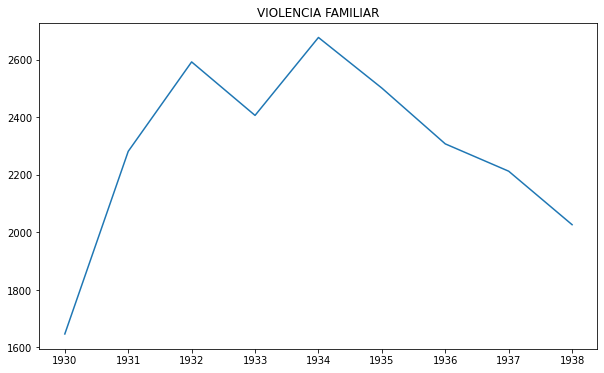

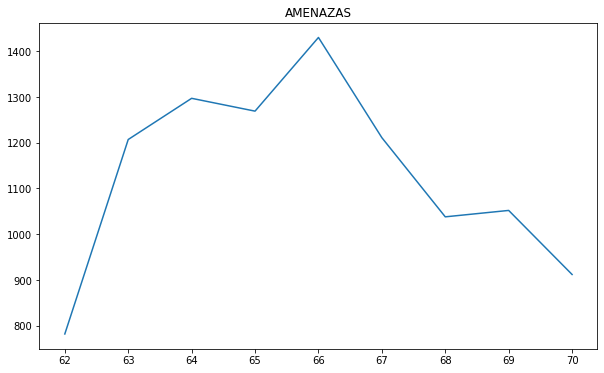

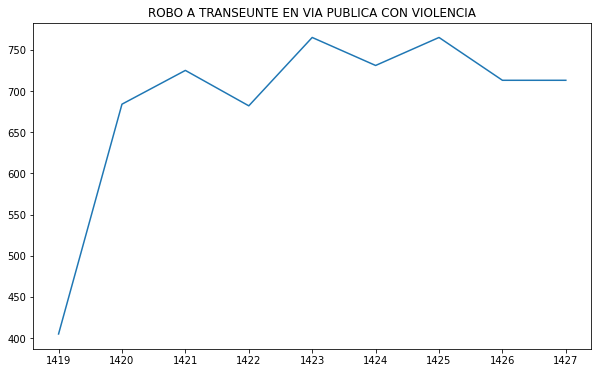

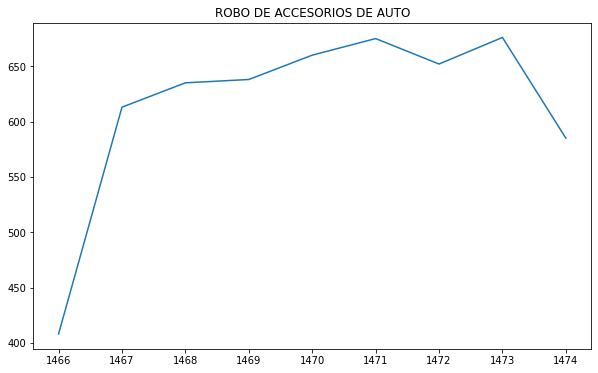

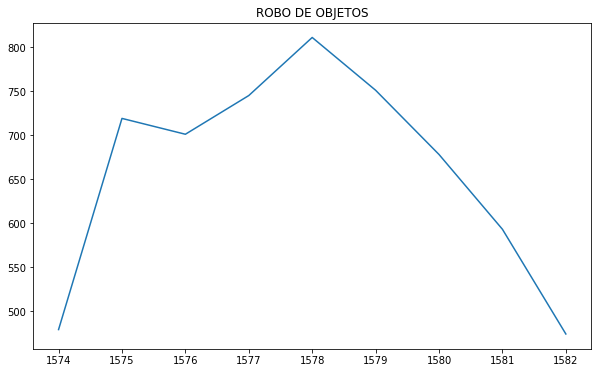

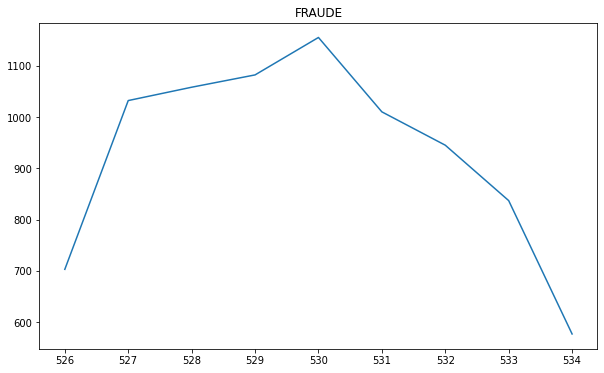

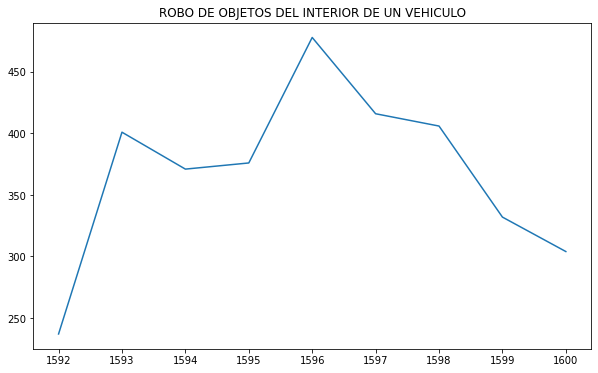

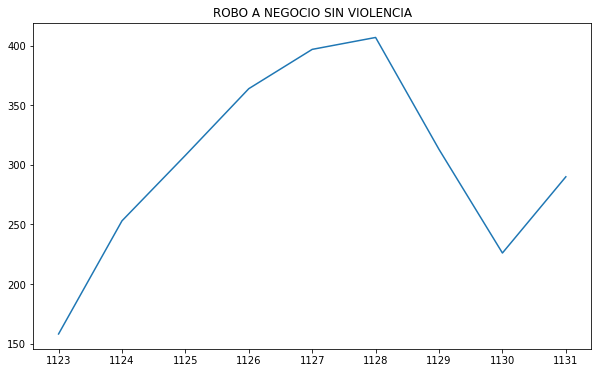

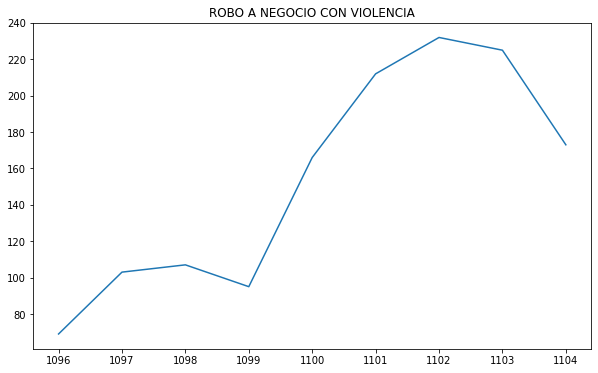

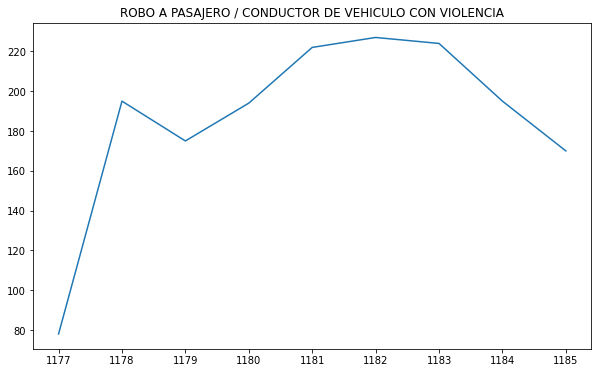

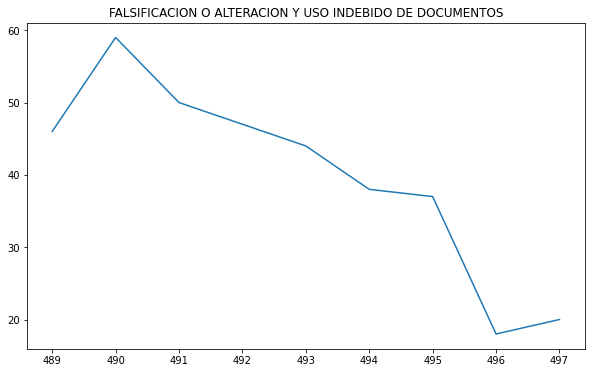

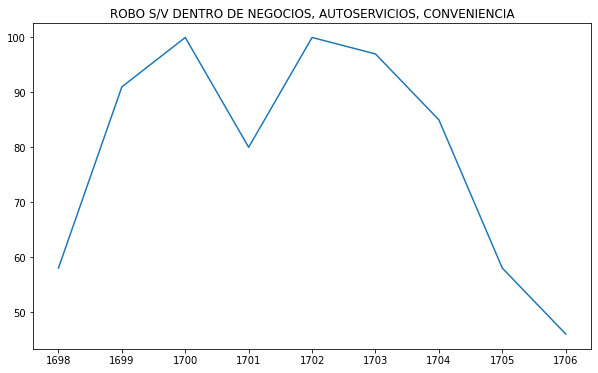

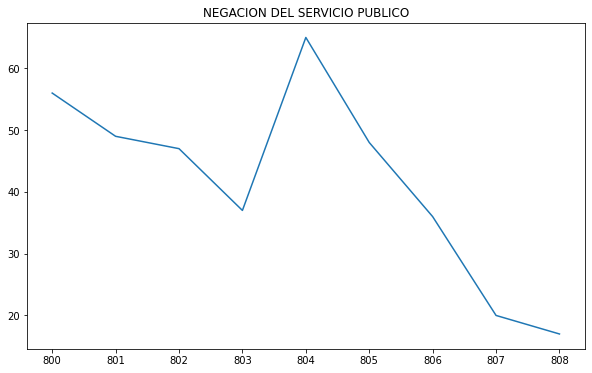

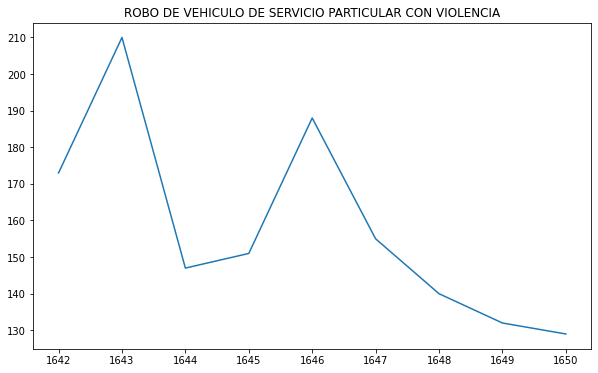

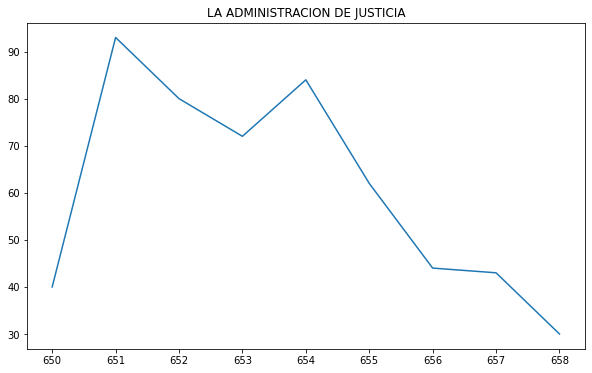

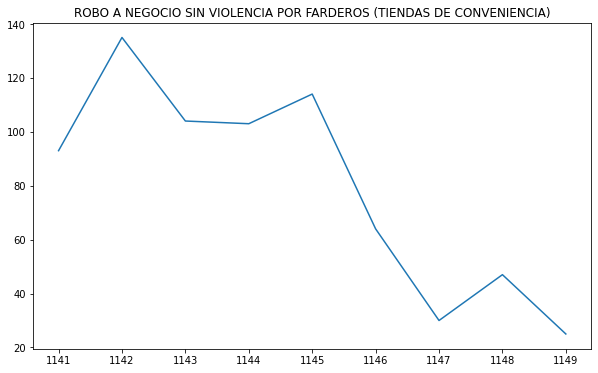

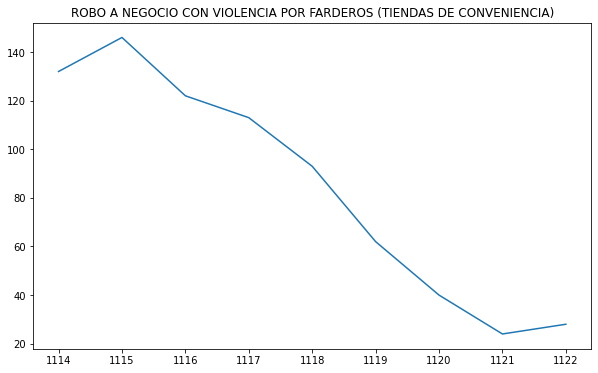

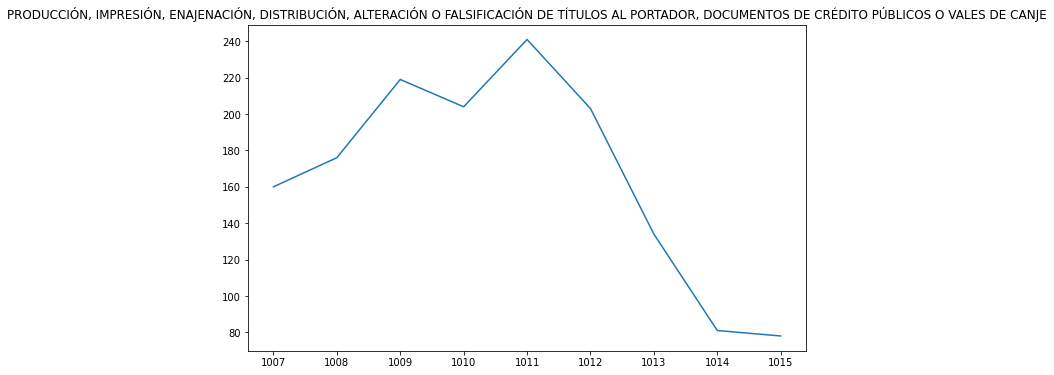

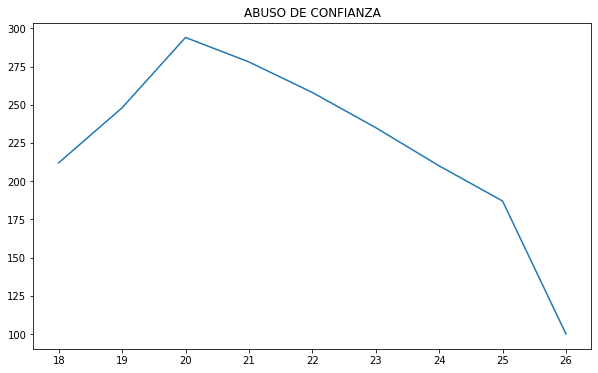

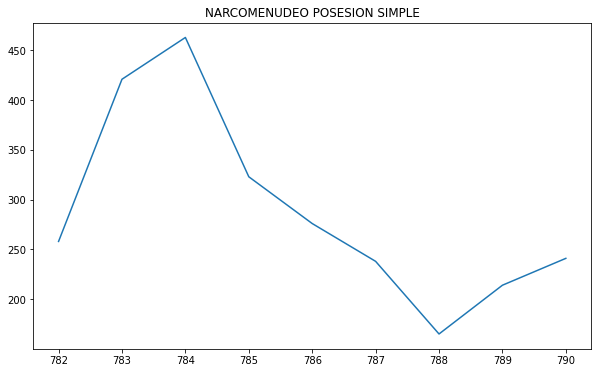

In [601]:
for delito in result_delito_crec.delito.tolist()+result_delito_decrec.delito.tolist():
    fig = plt.figure(figsize=(10,6))
    plt.plot(agrupado_delito_mesanio[agrupado_delito_mesanio.delito == delito].num_delitos)
    plt.title(delito)
    plt.show()

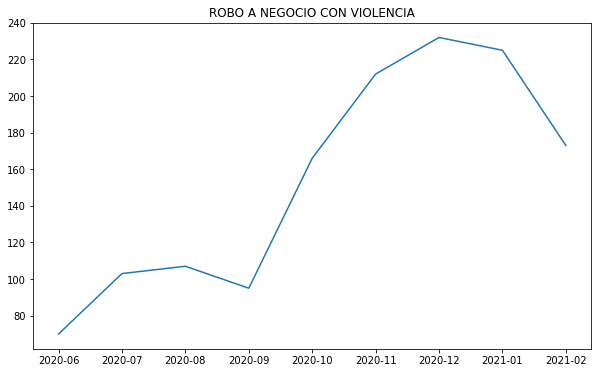

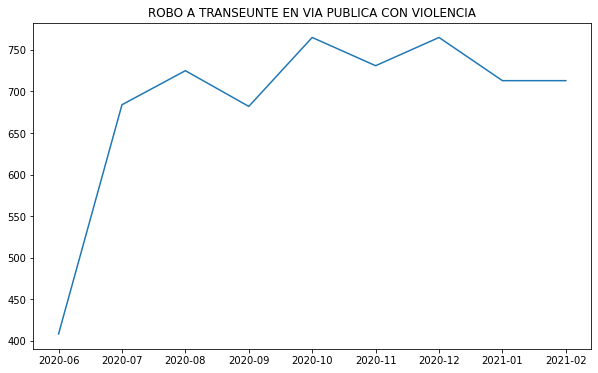

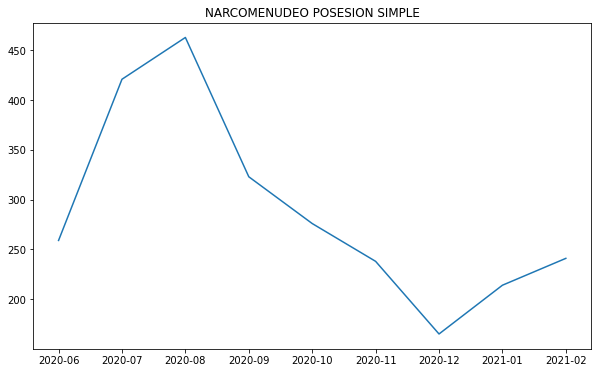

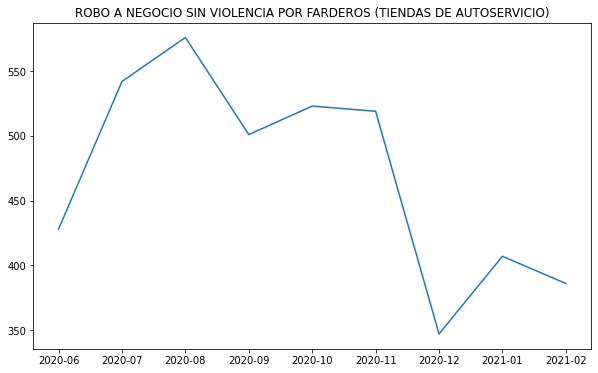

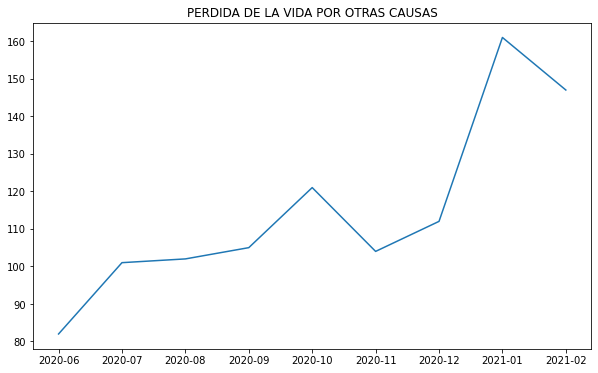

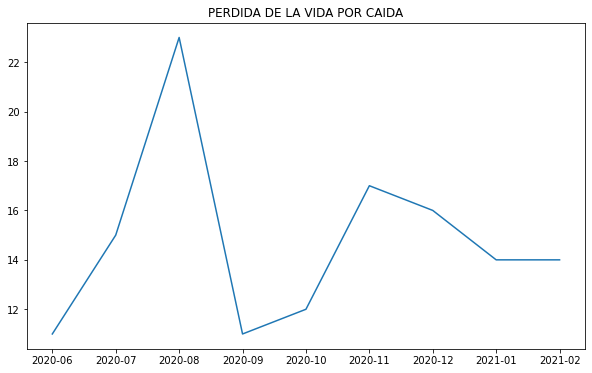

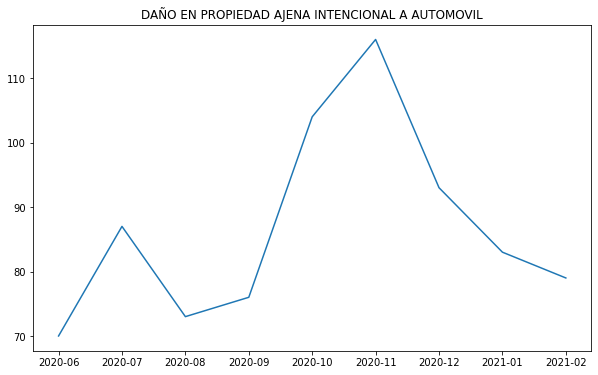

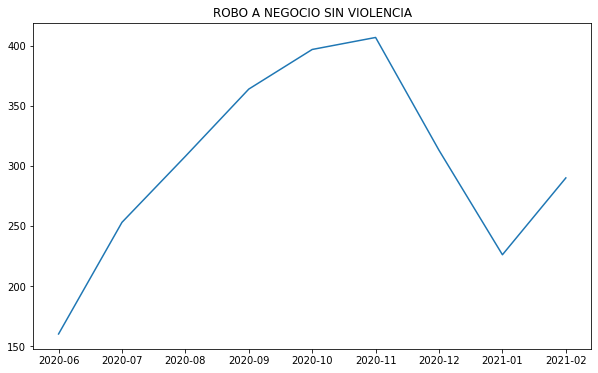

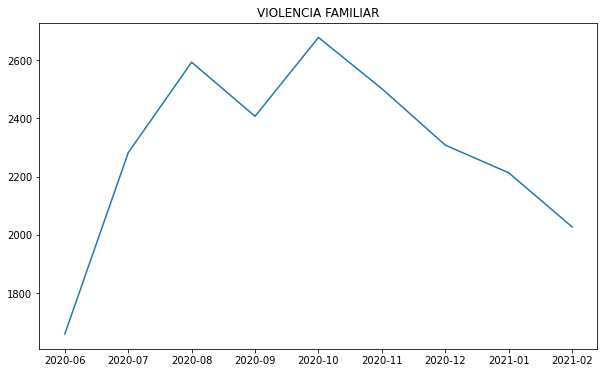

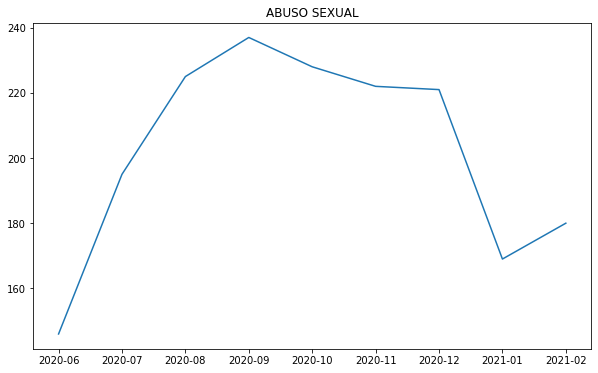

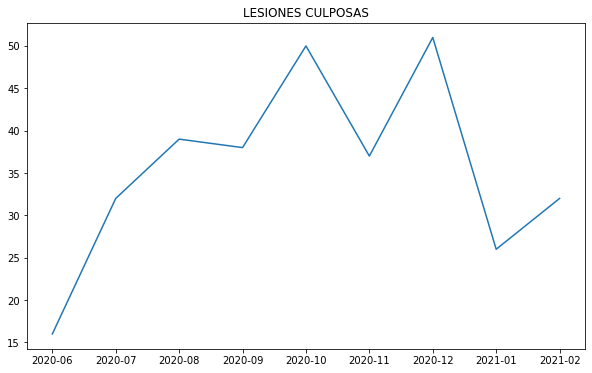

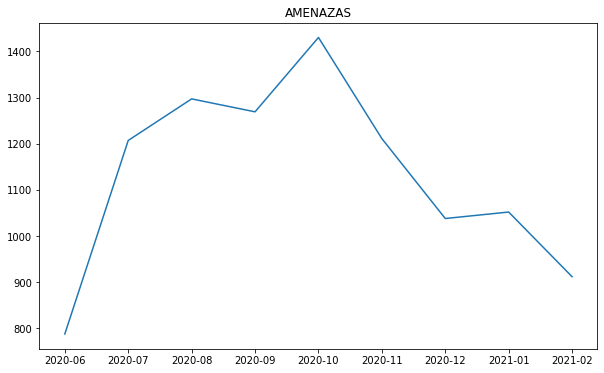

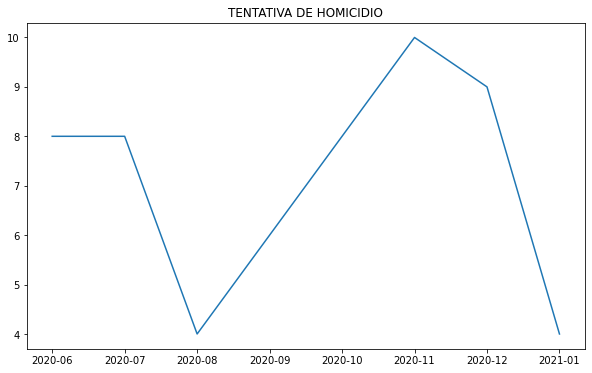

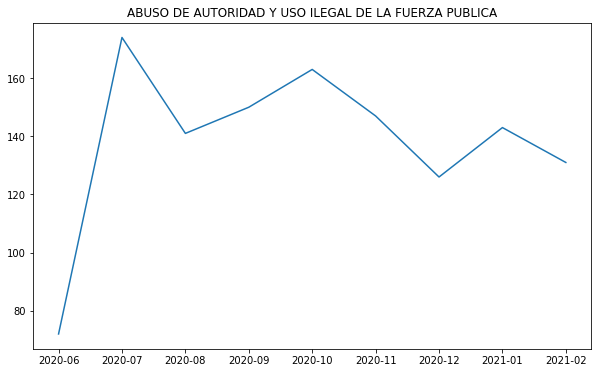

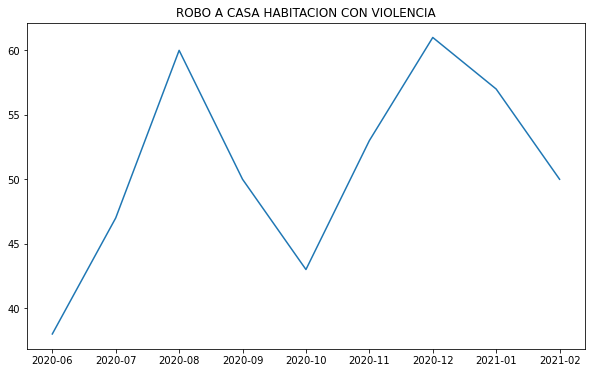

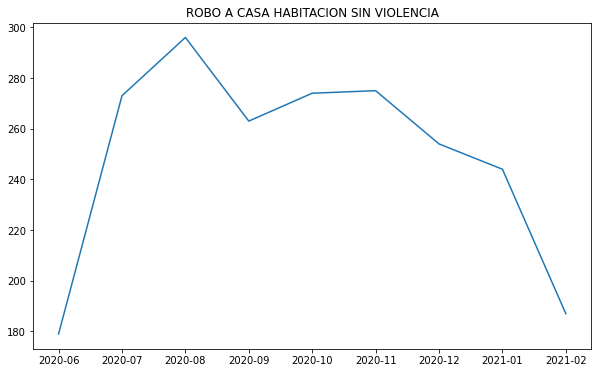

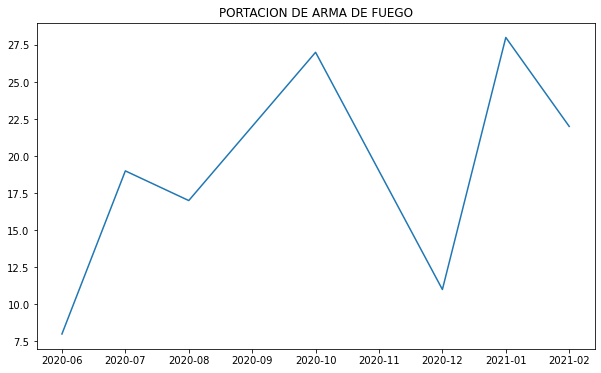

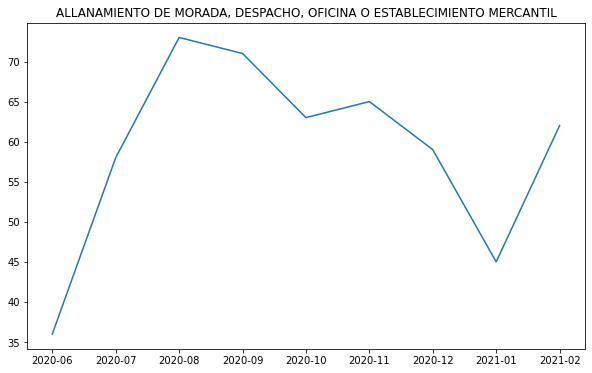

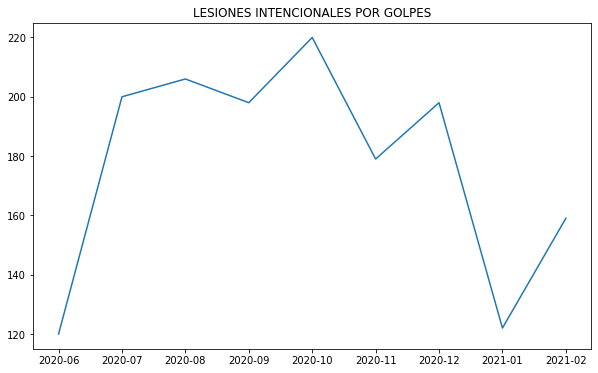

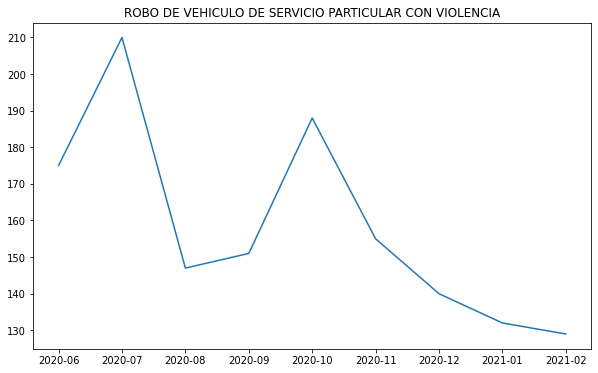

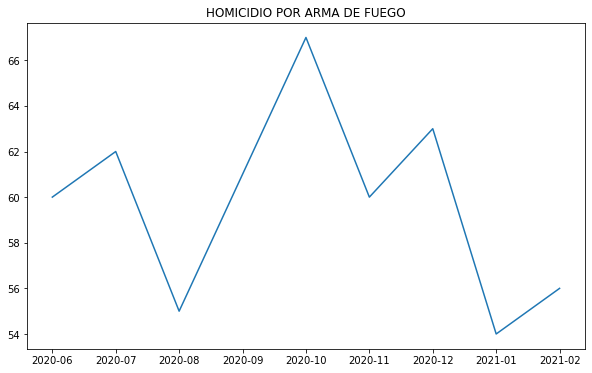

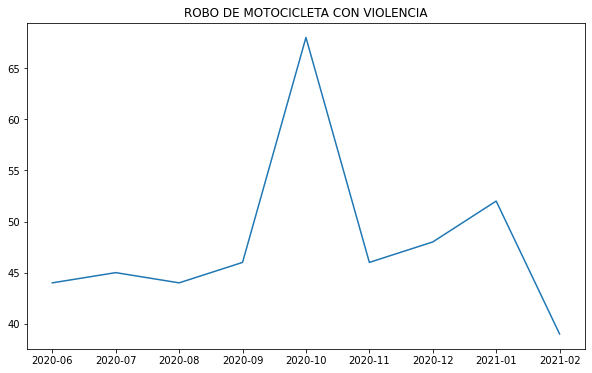

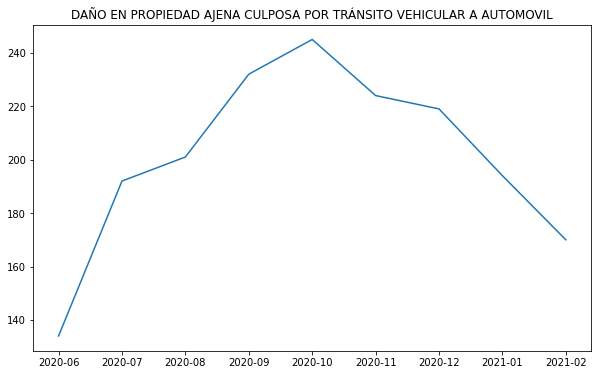

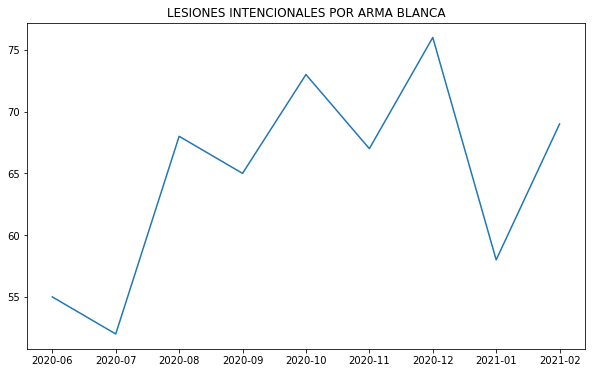

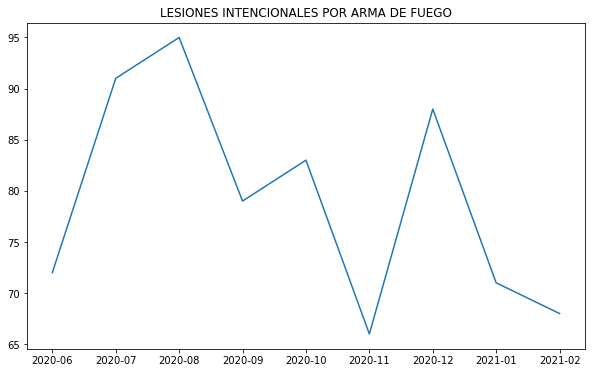

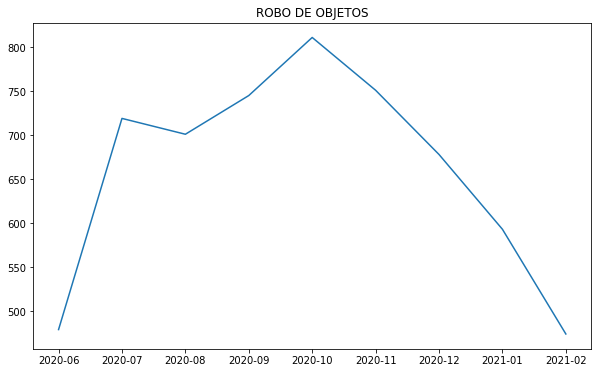

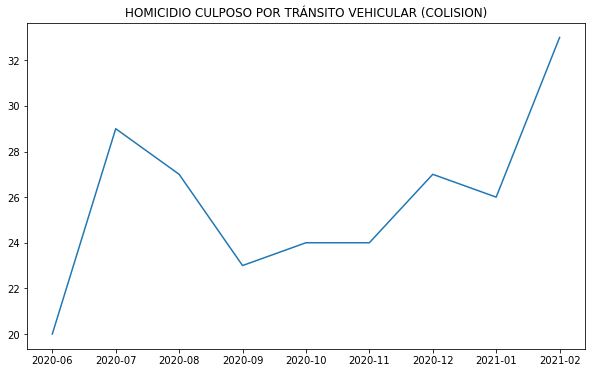

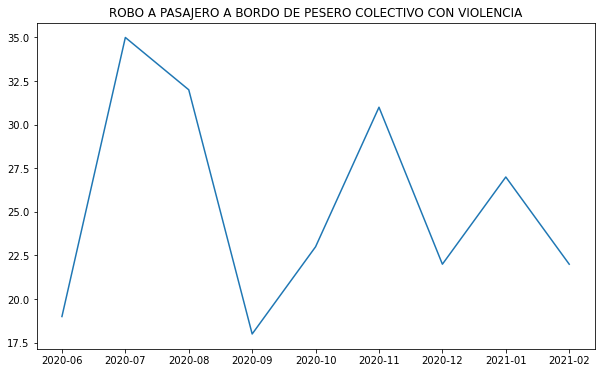

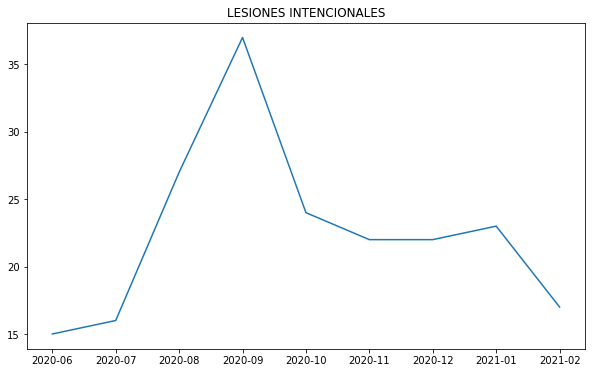

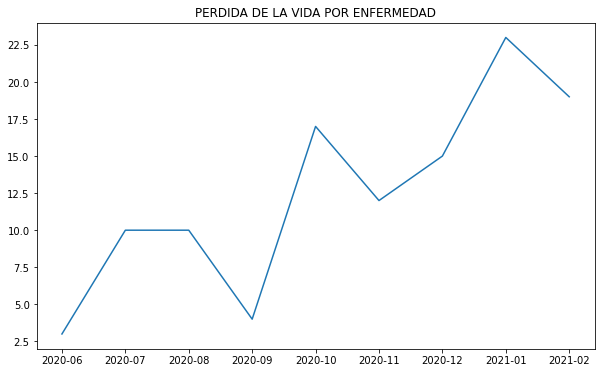

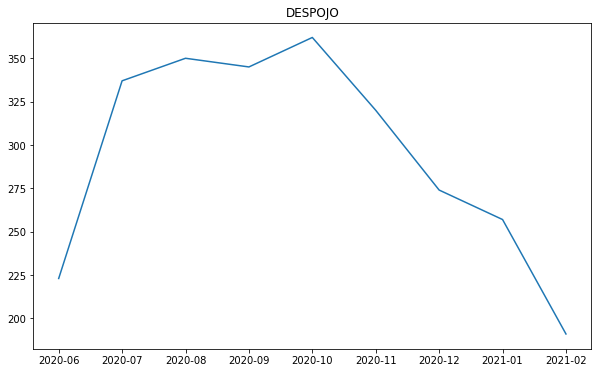

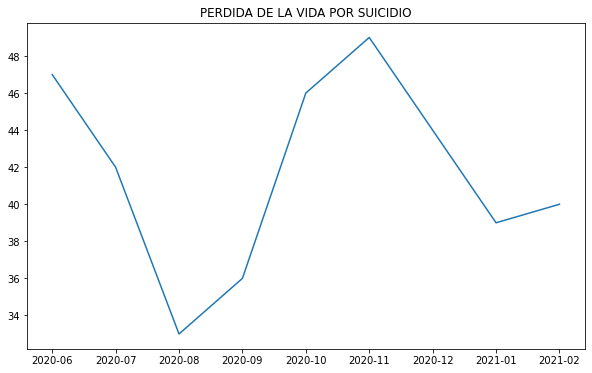

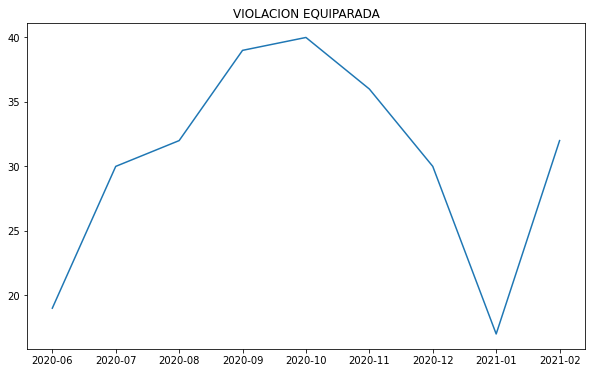

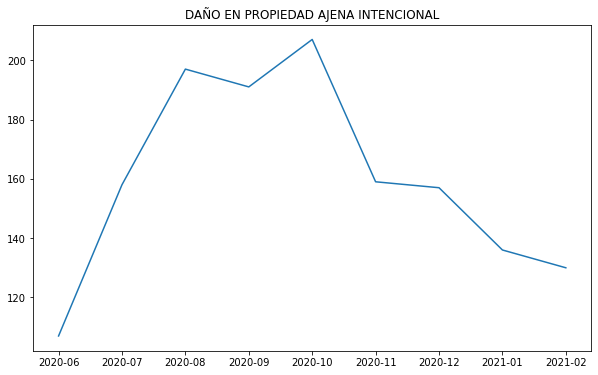

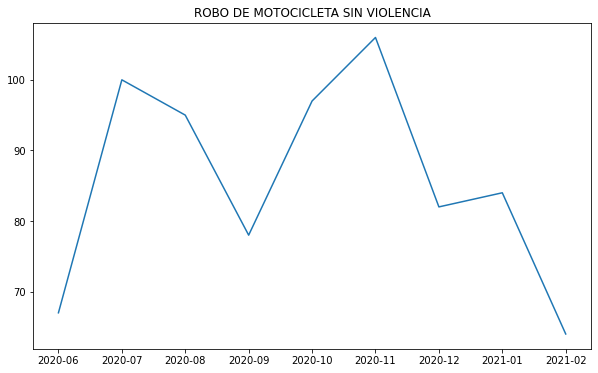

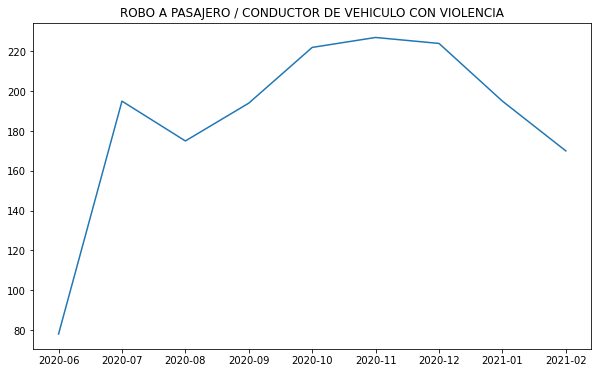

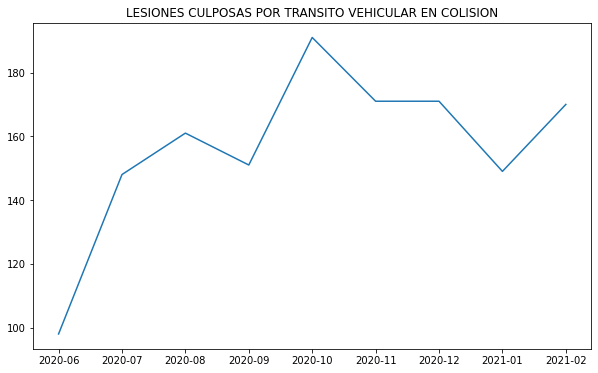

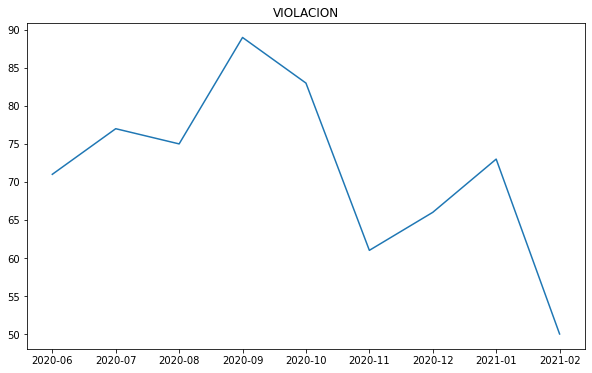

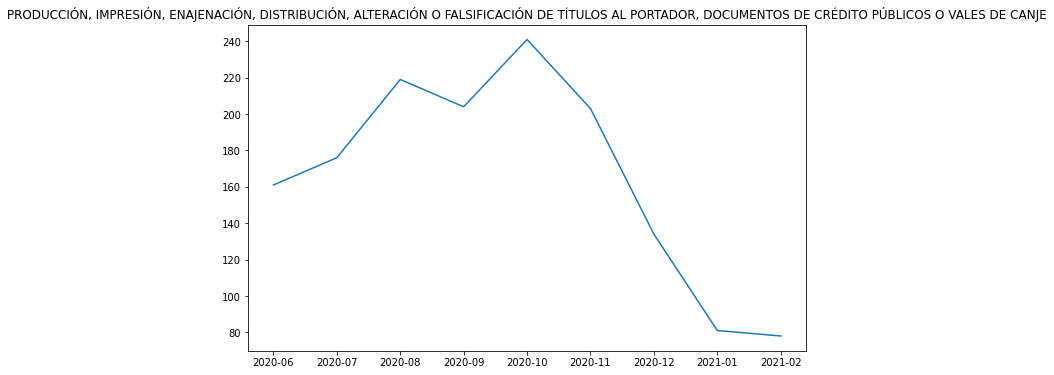

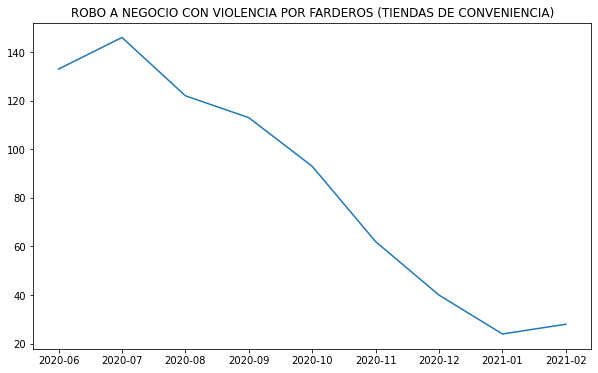

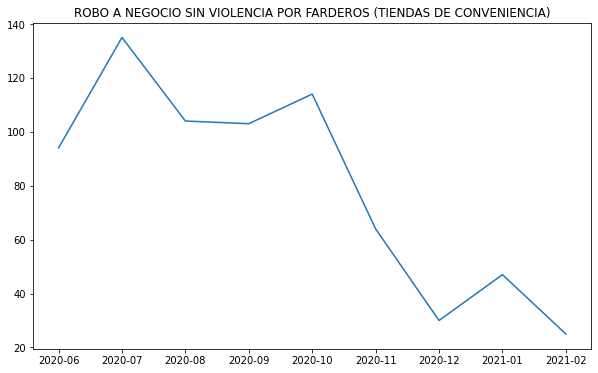

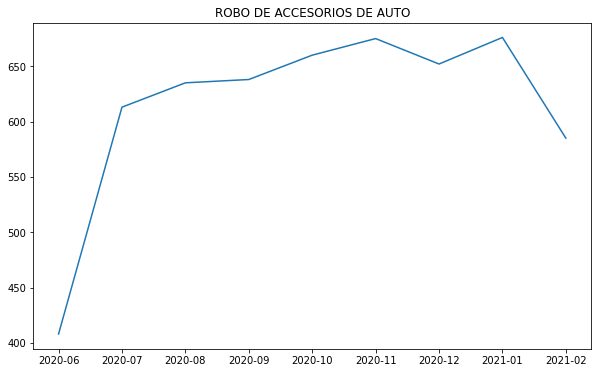

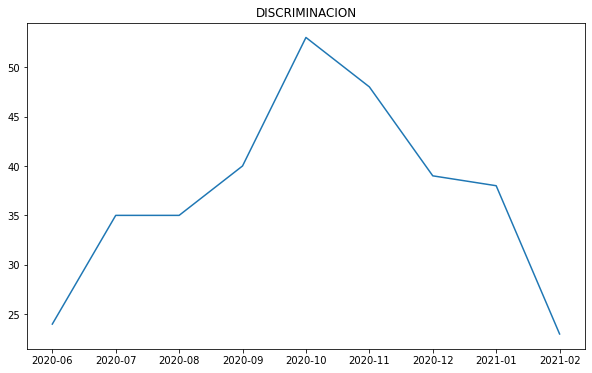

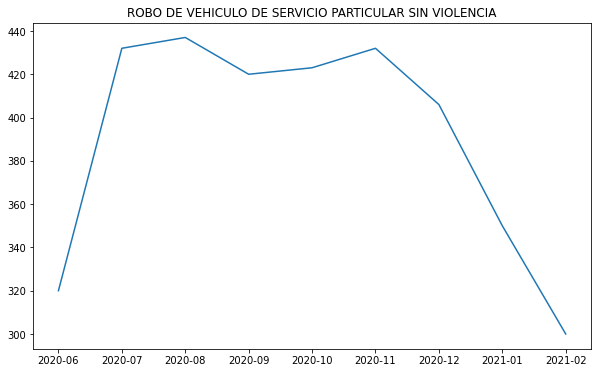

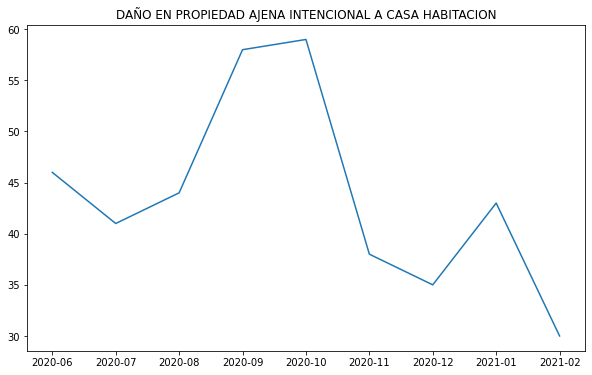

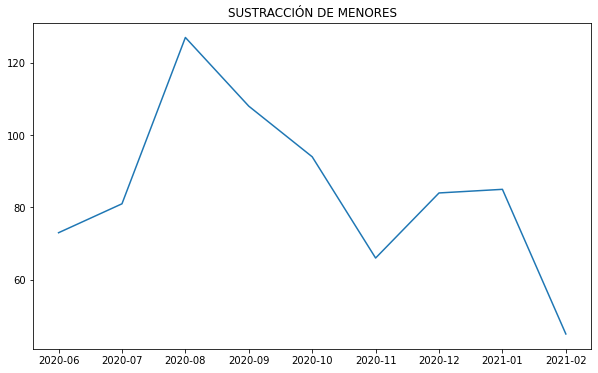

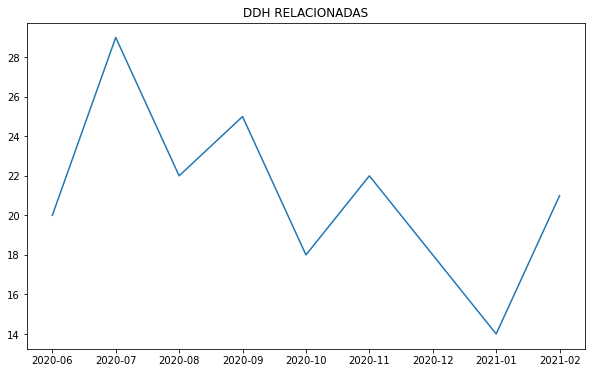

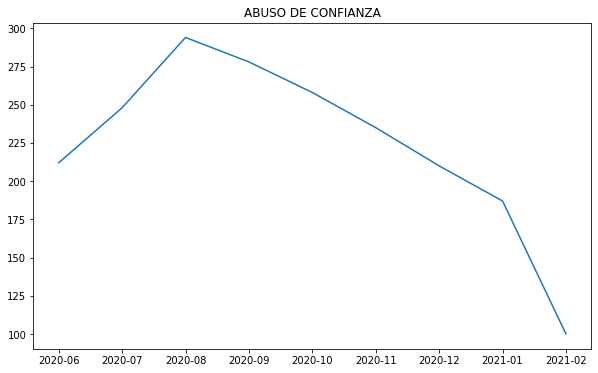

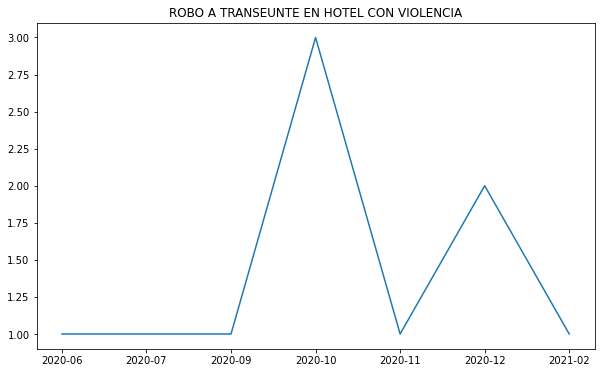

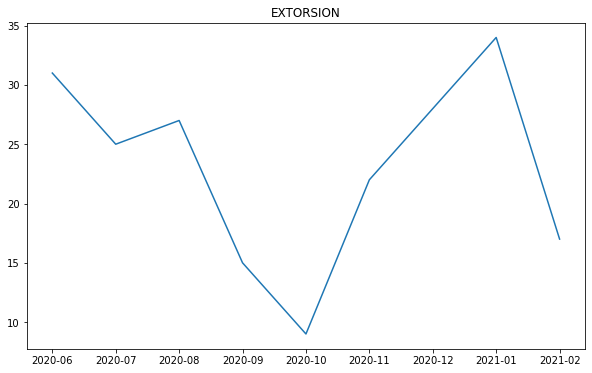

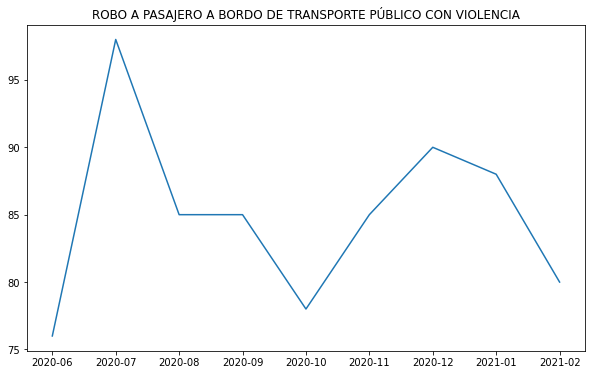

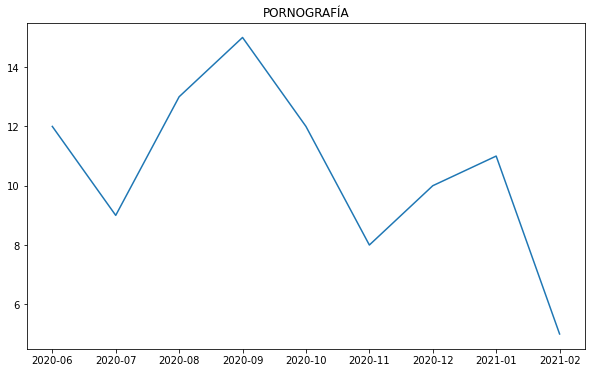

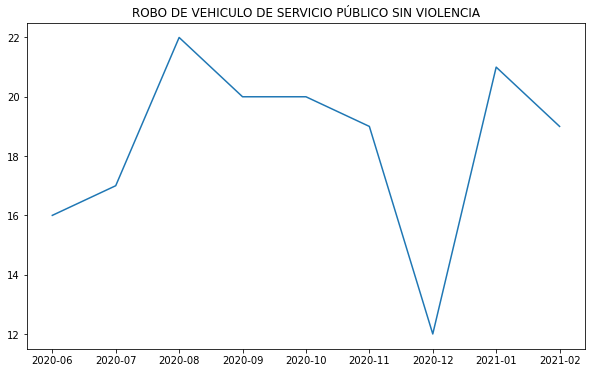

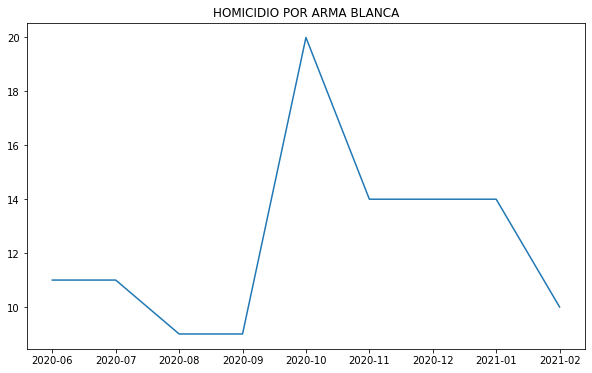

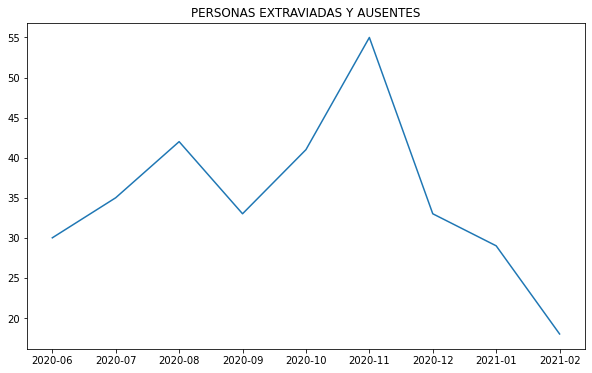

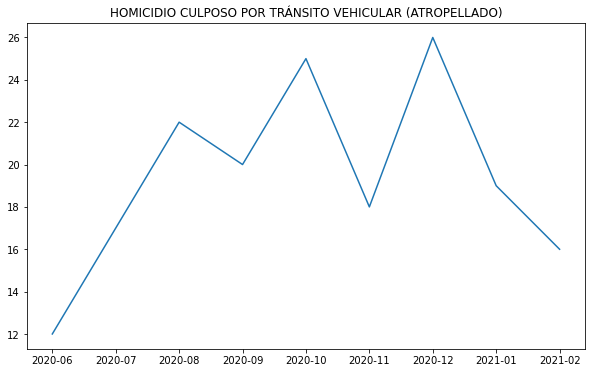

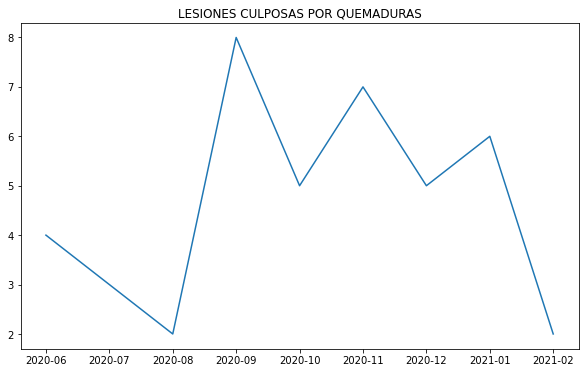

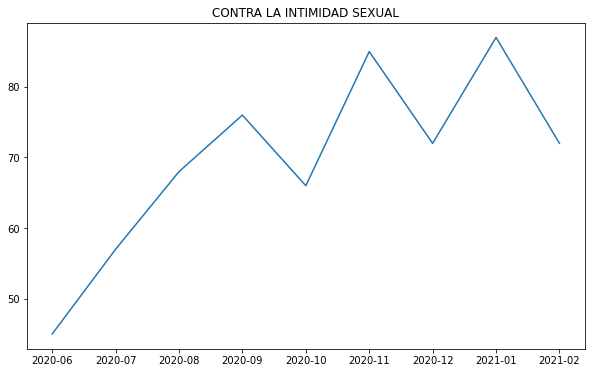

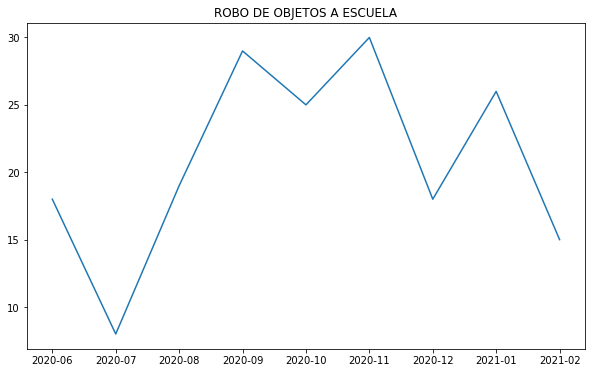

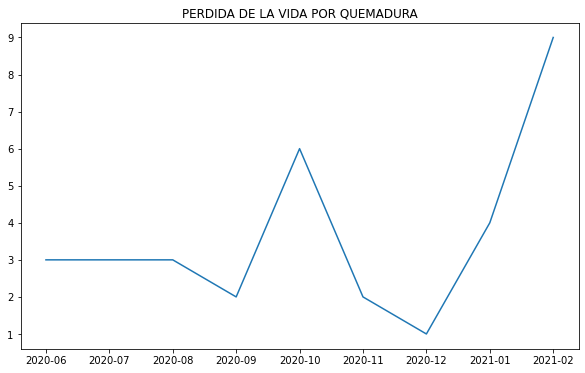

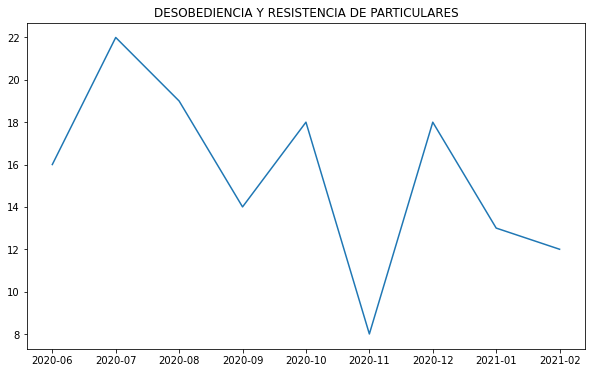

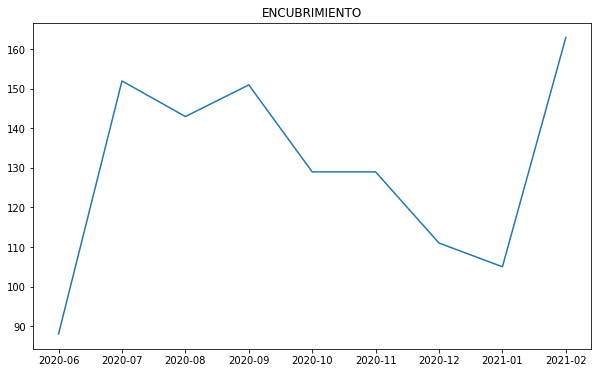

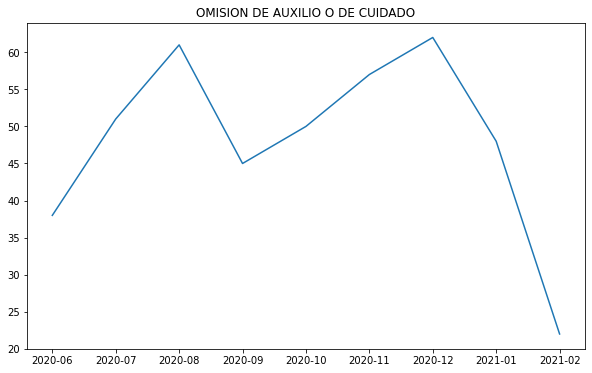

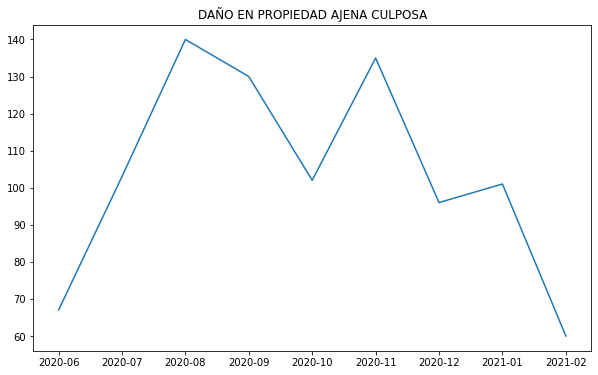

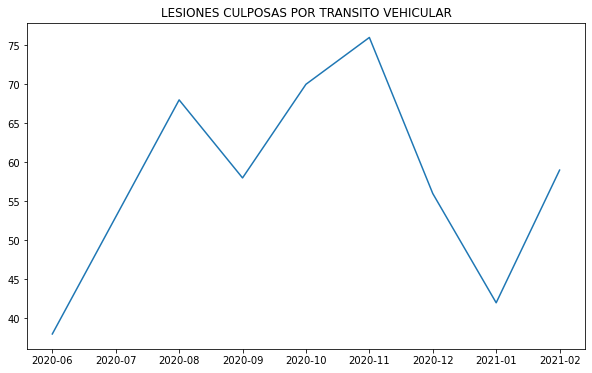

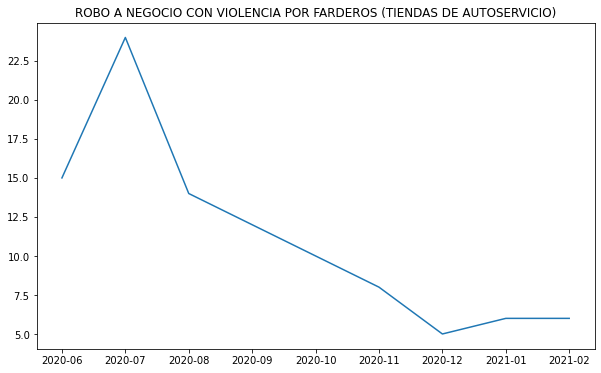

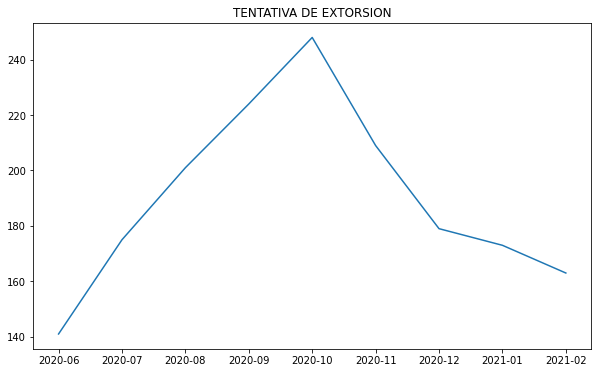

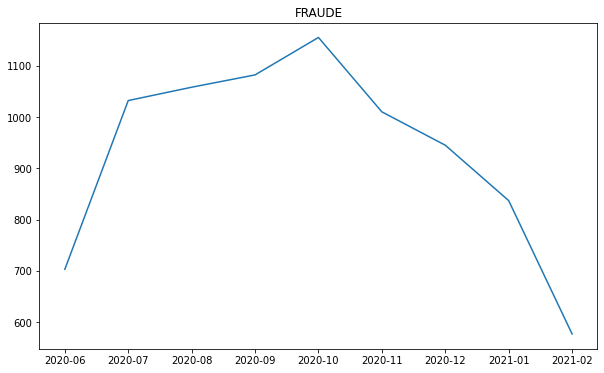

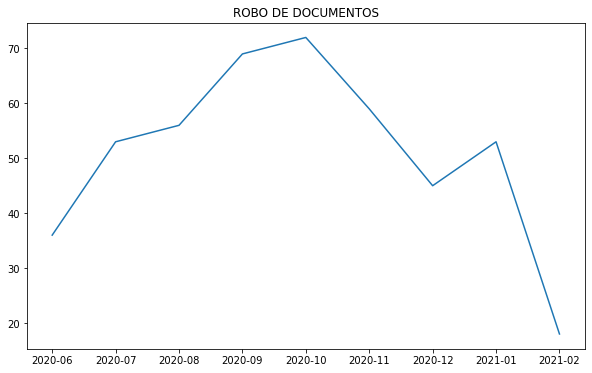

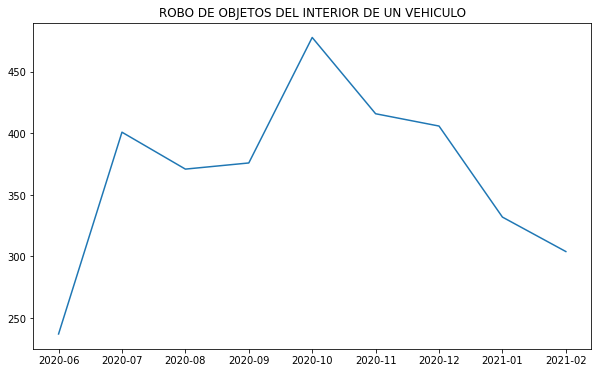

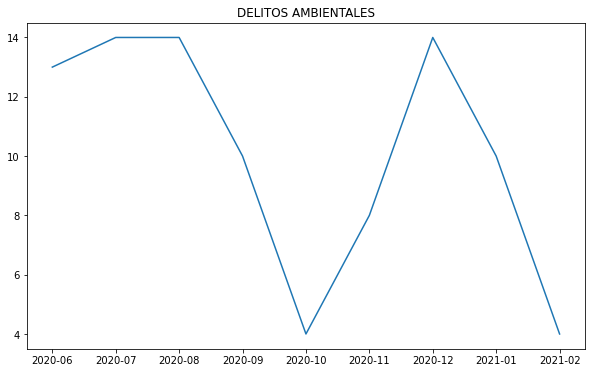

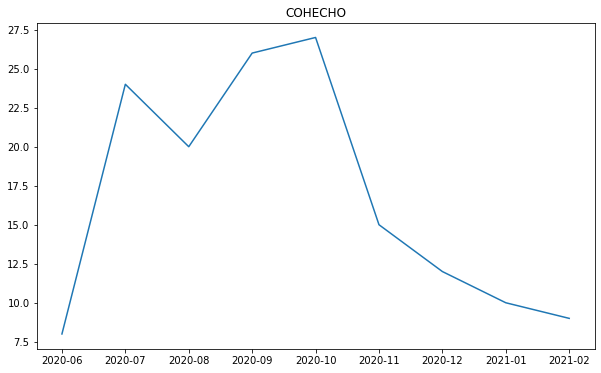

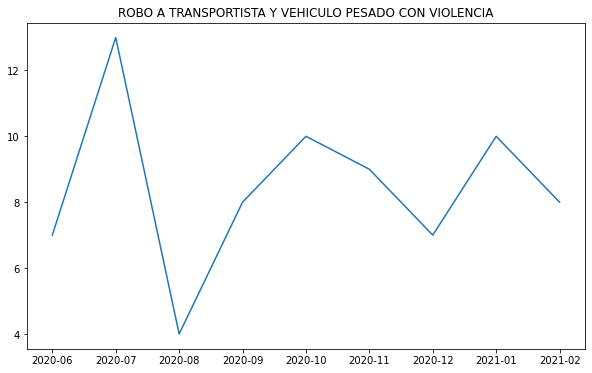

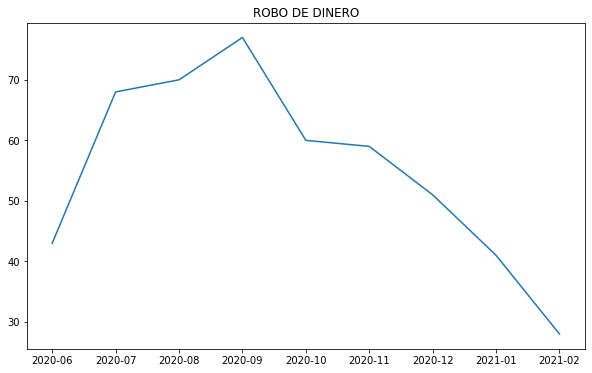

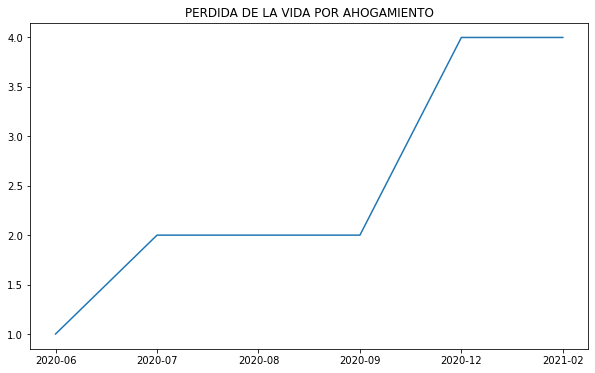

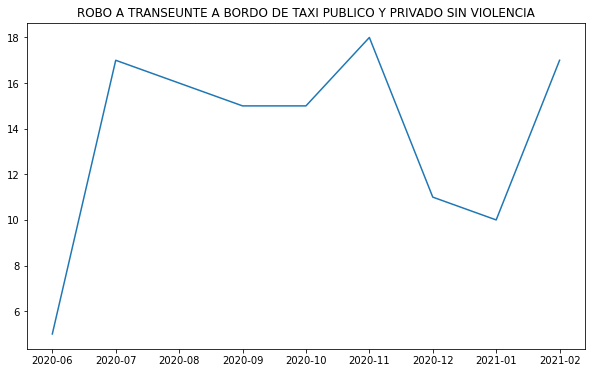

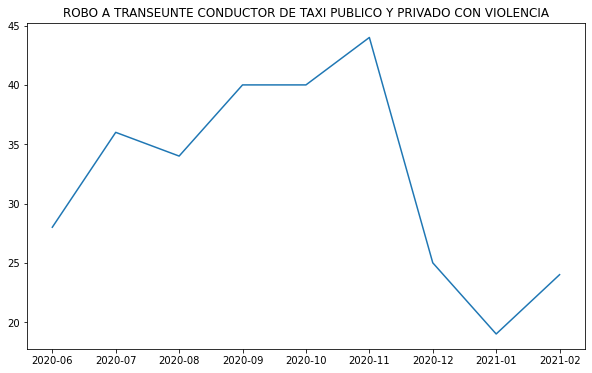

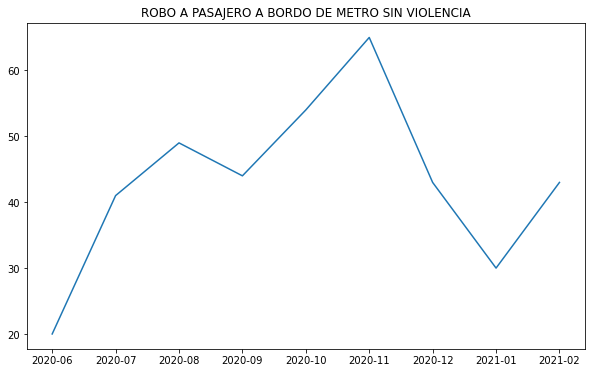

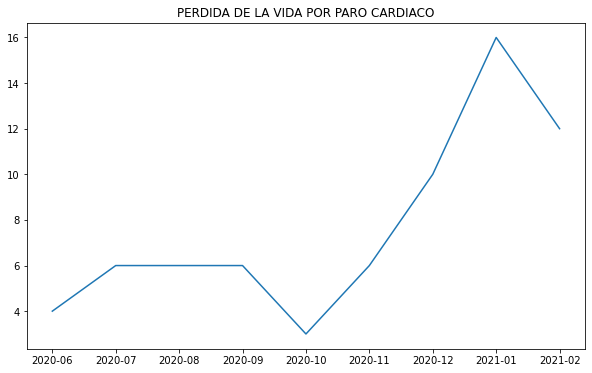

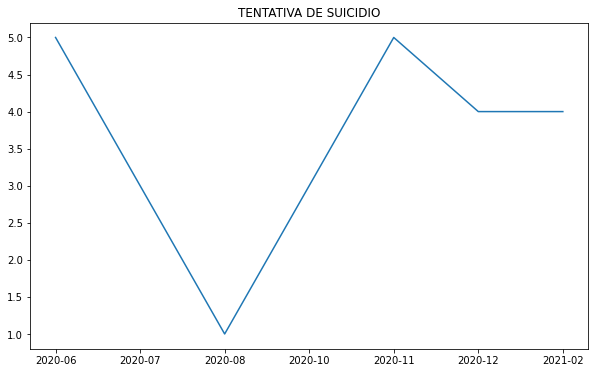

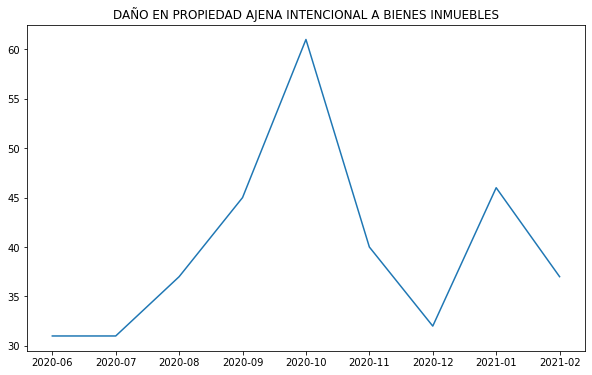

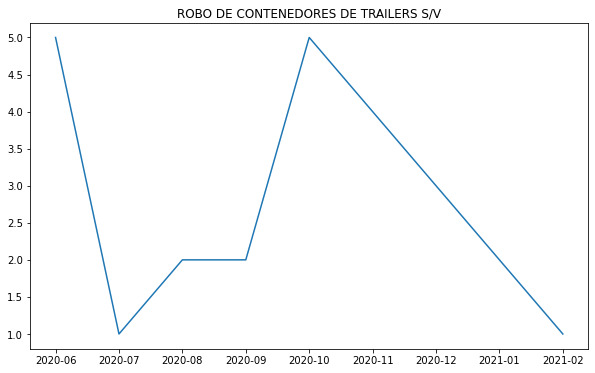

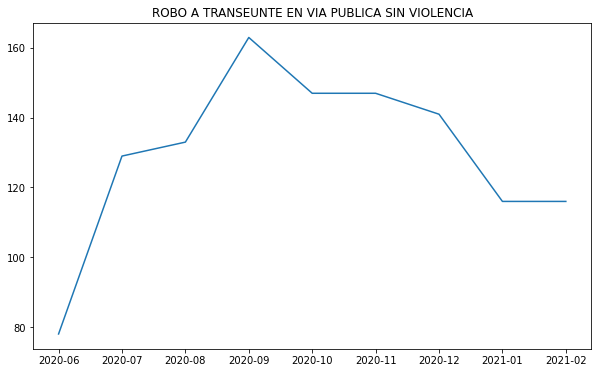

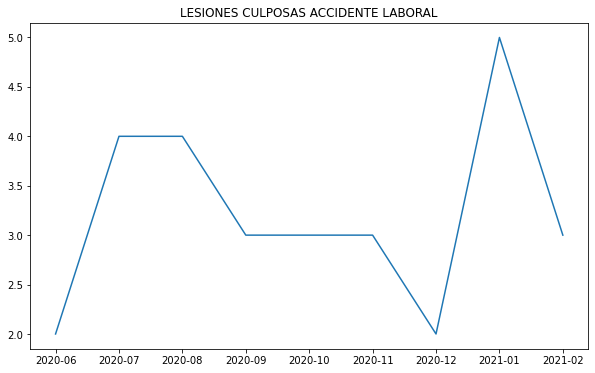

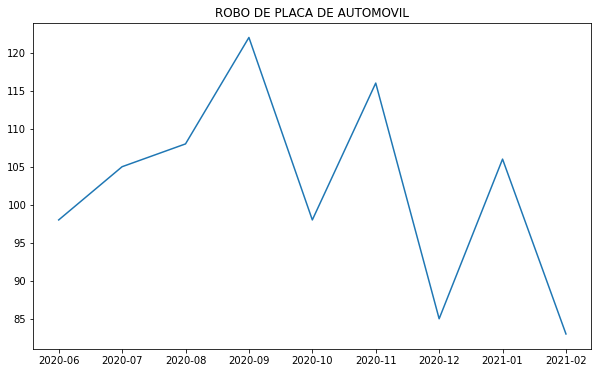

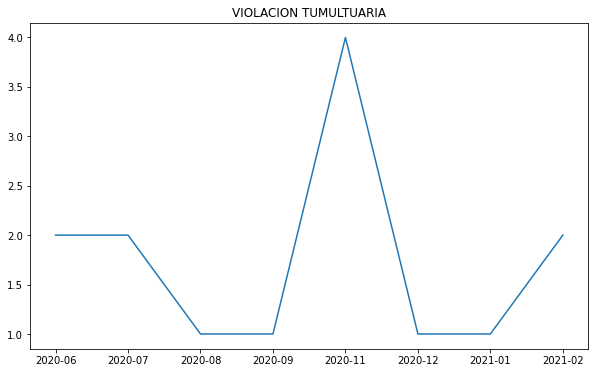

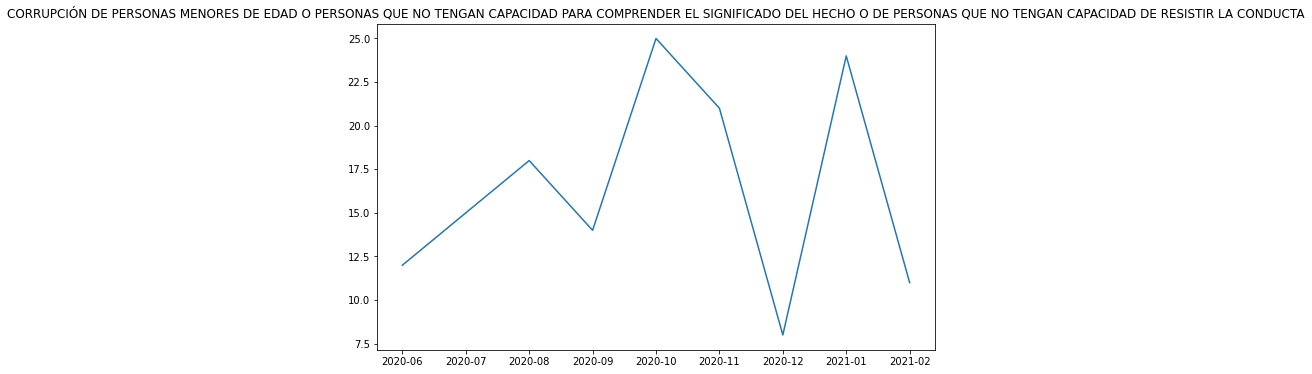

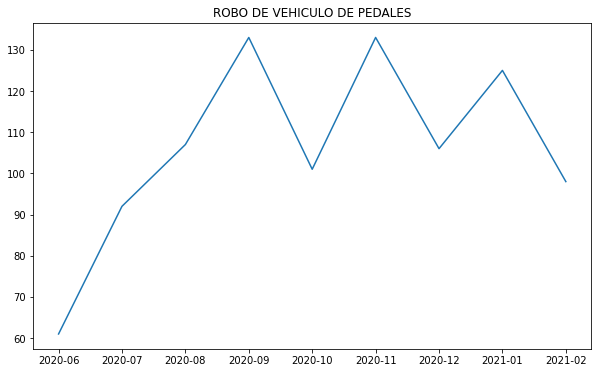

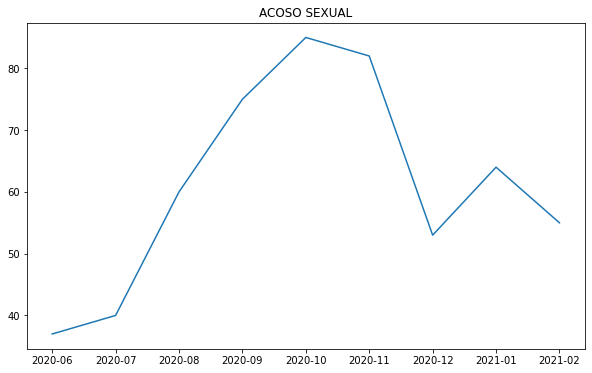

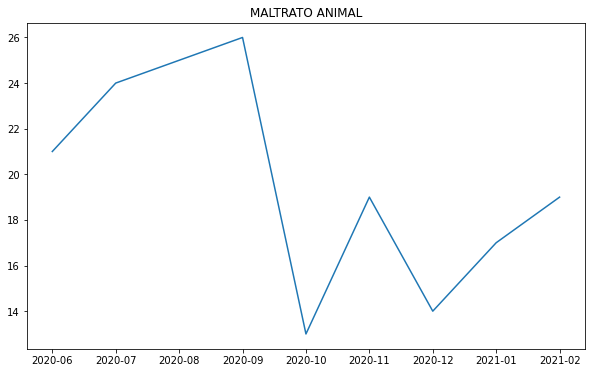

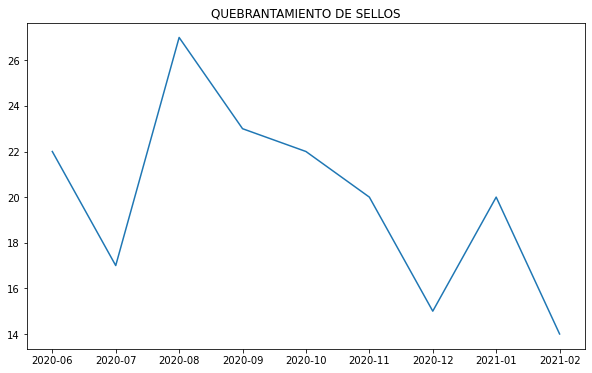

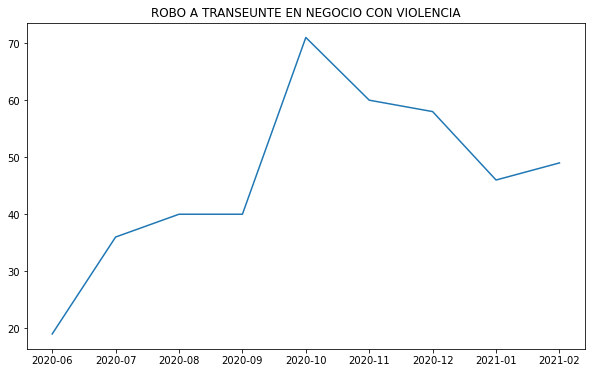

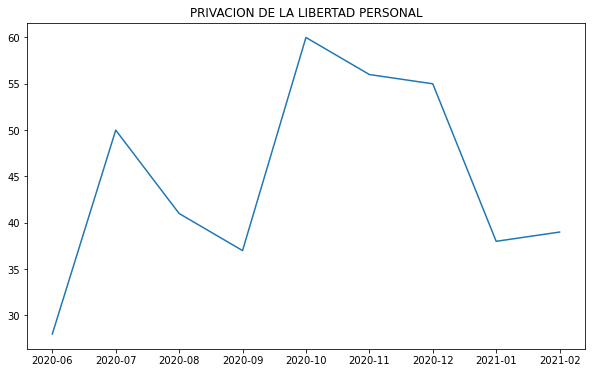

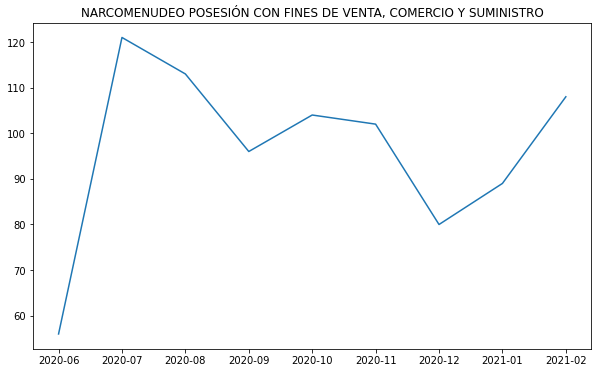

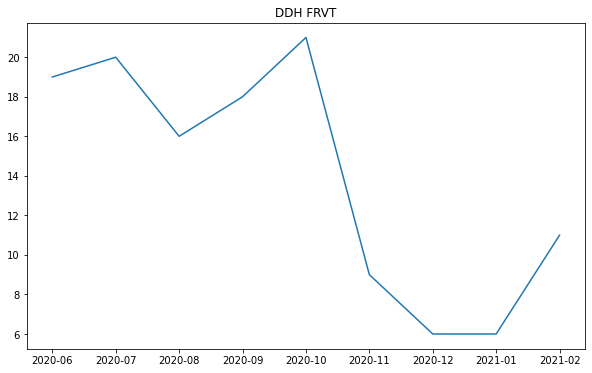

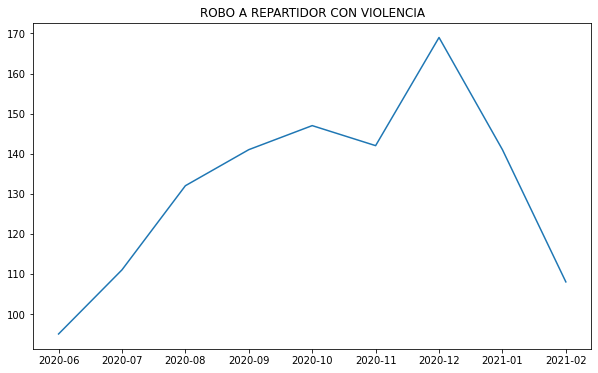

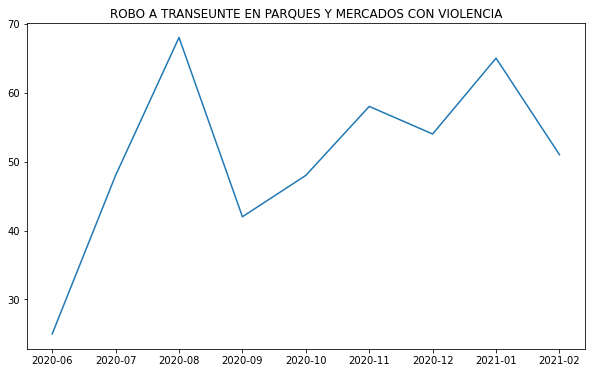

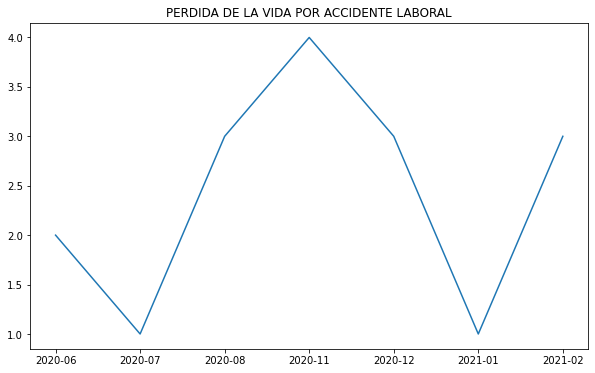

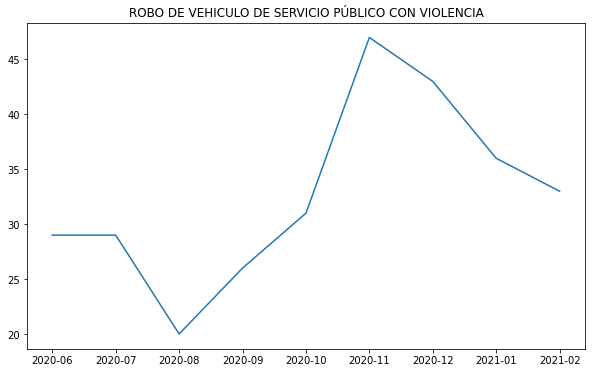

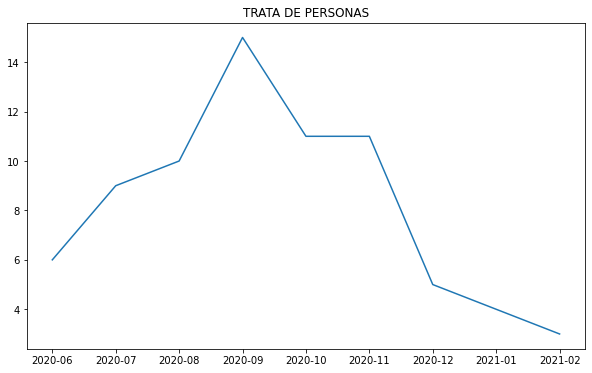

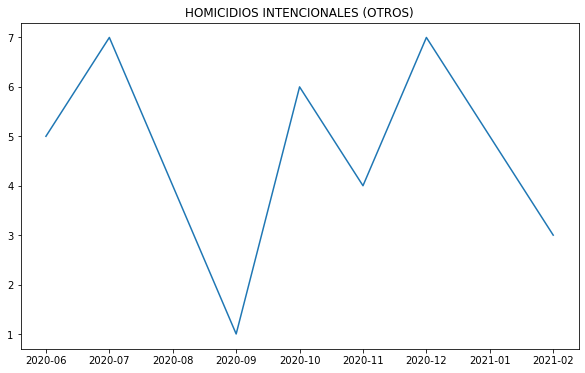

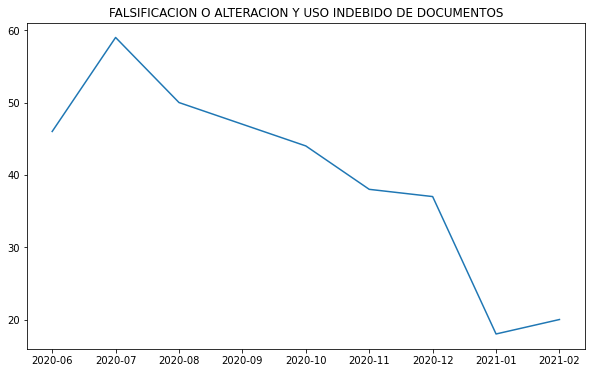

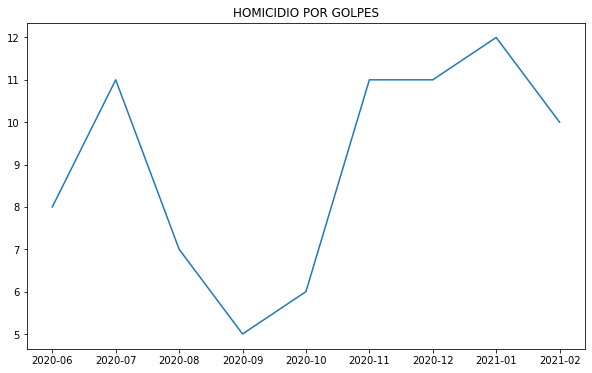

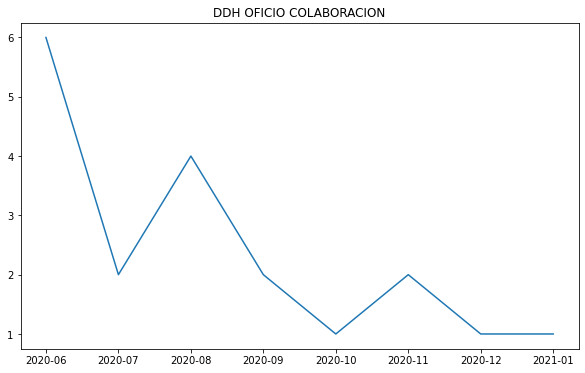

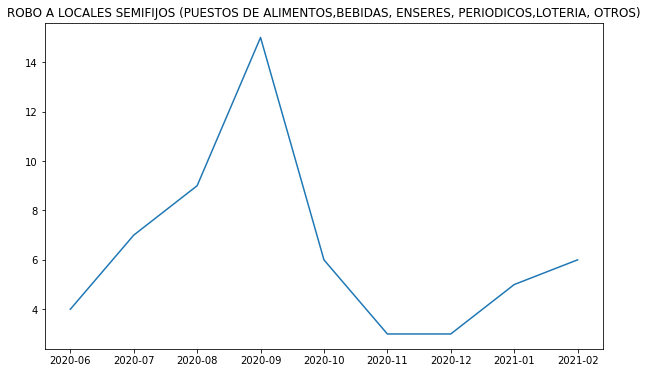

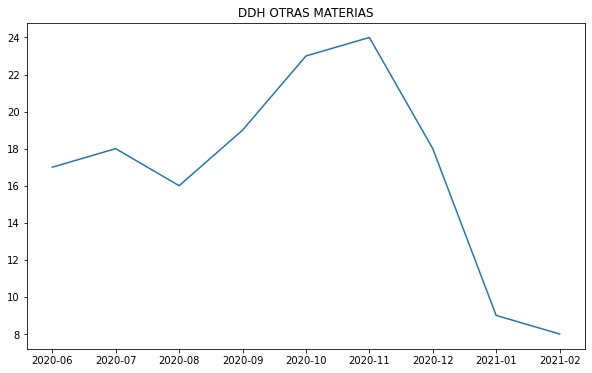

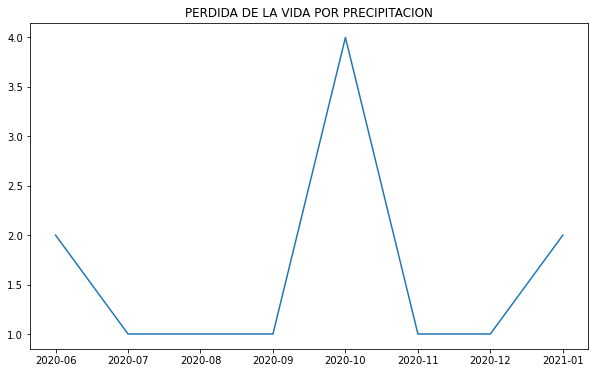

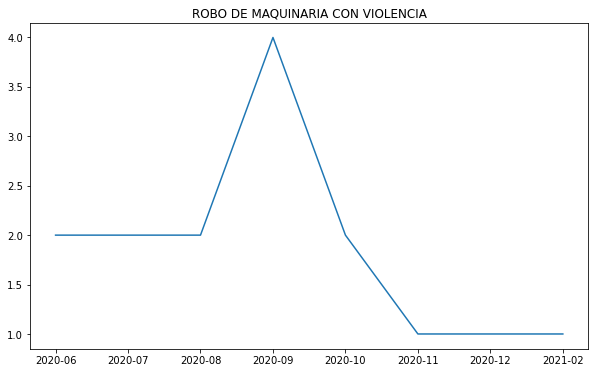

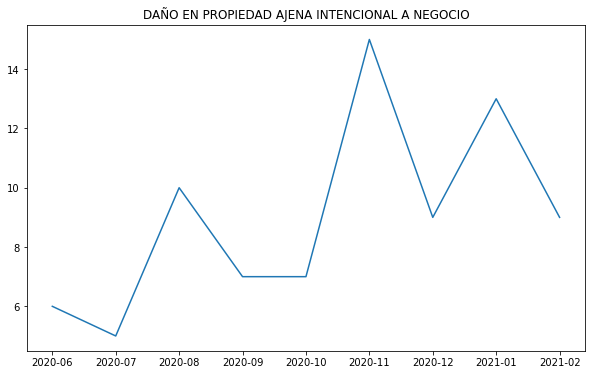

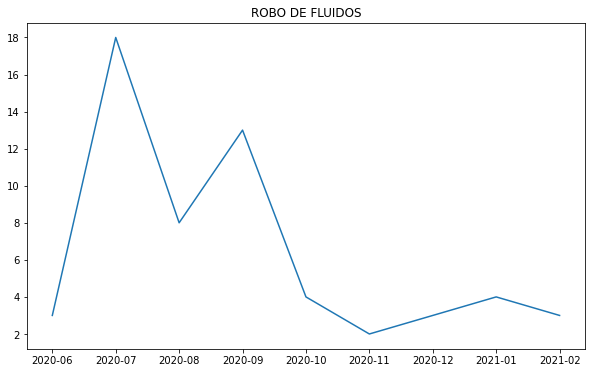

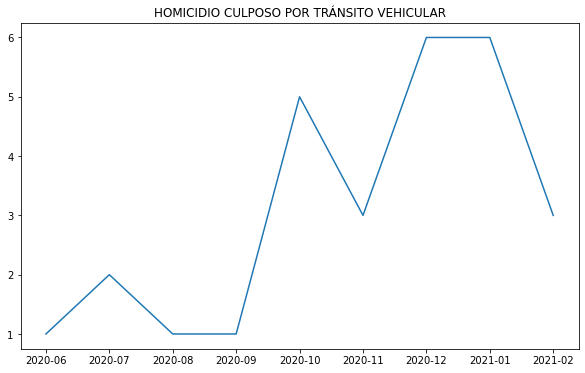

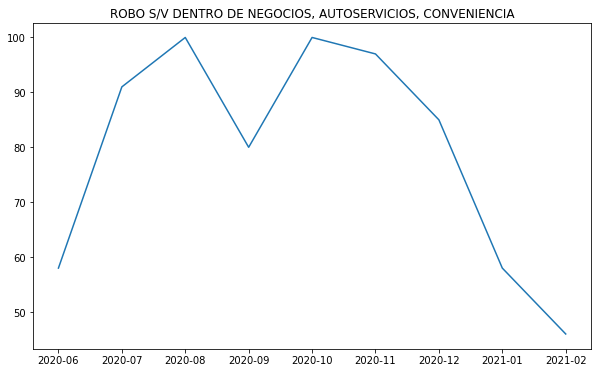

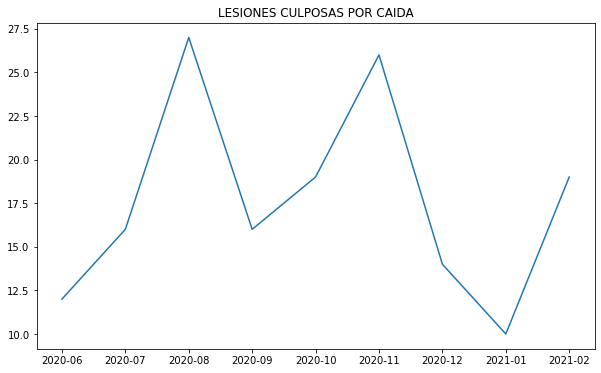

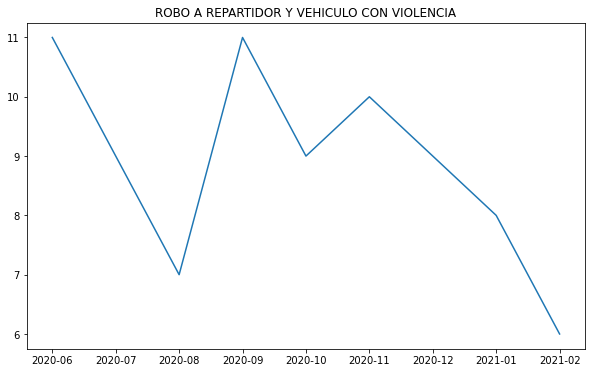

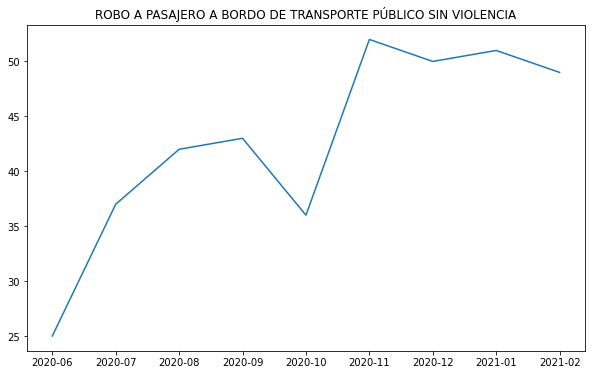

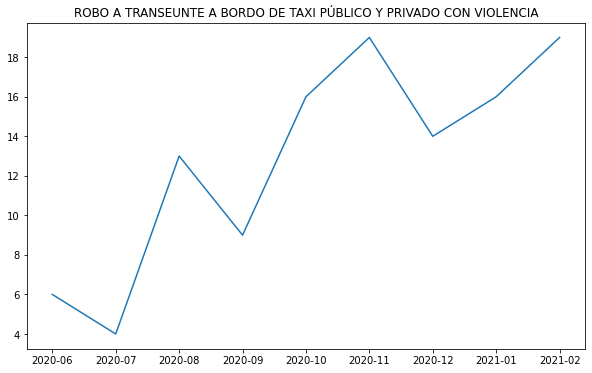

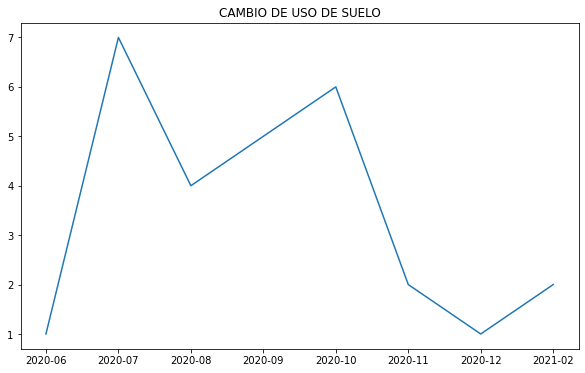

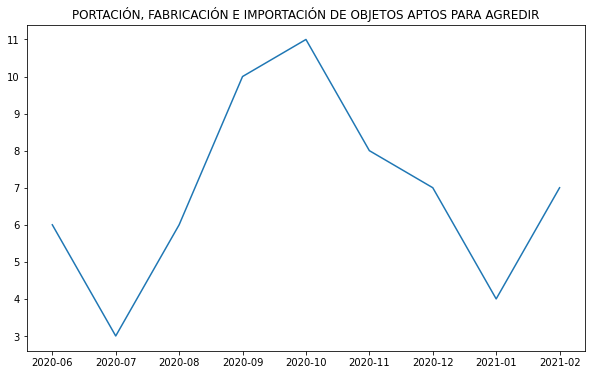

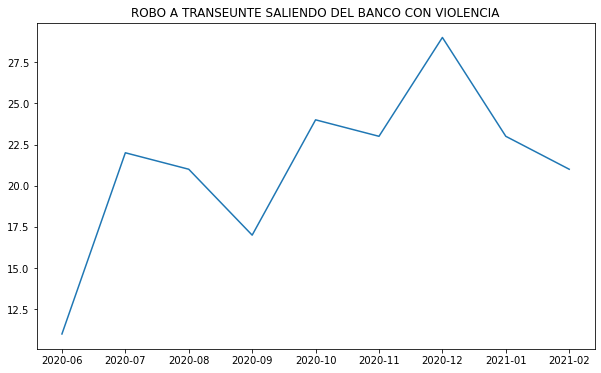

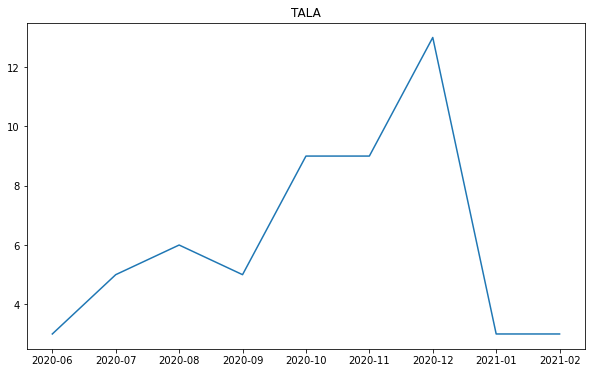

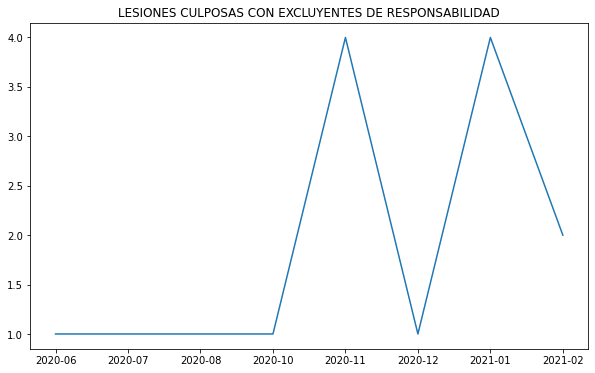

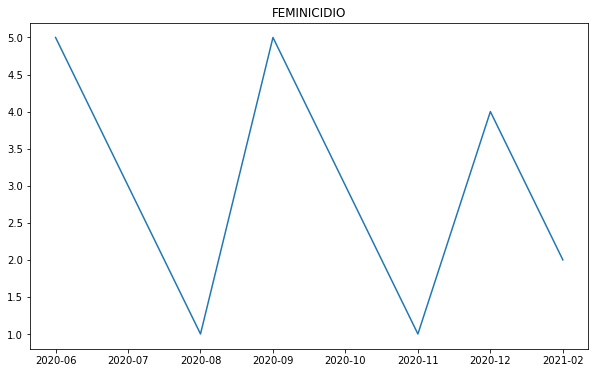

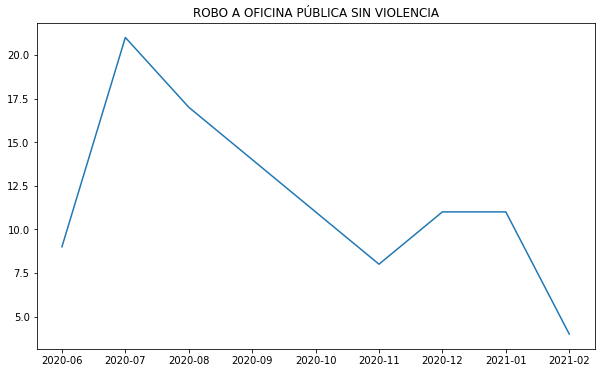

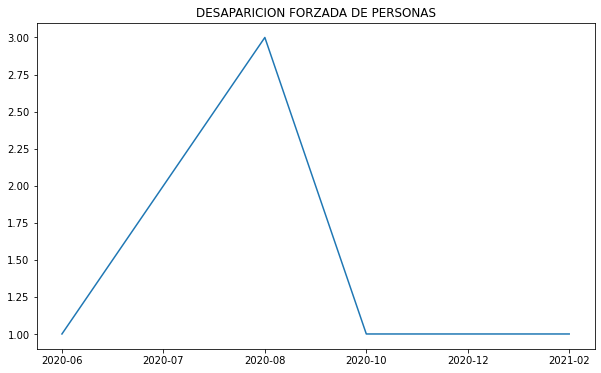

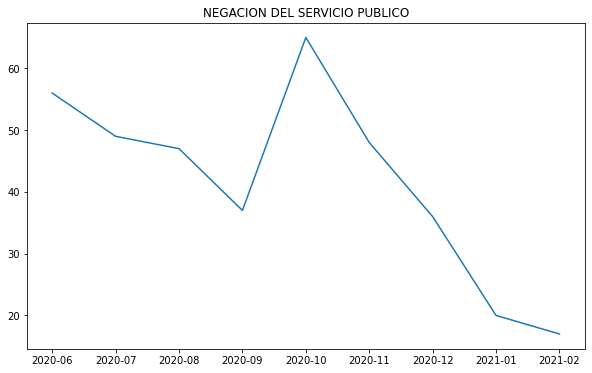

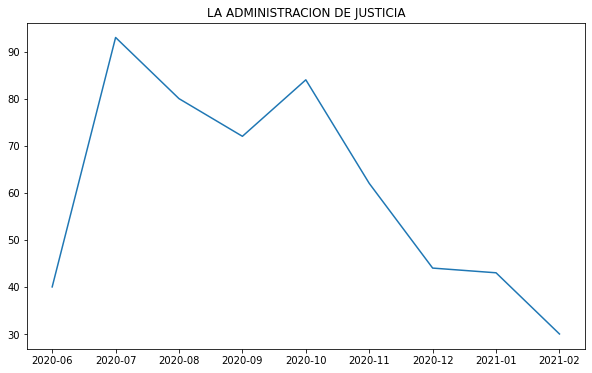

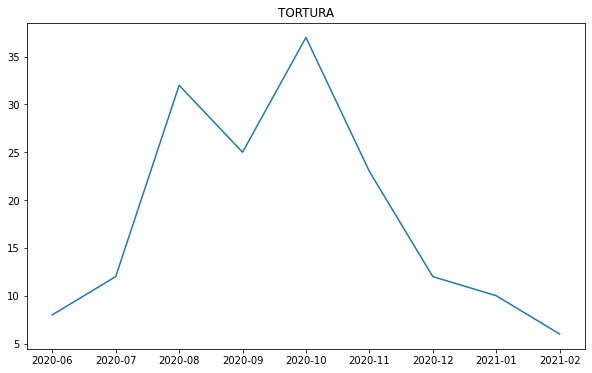

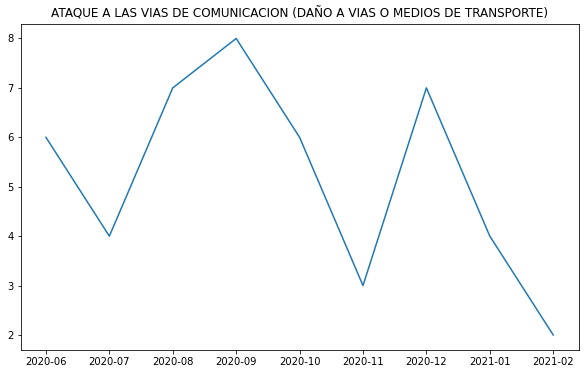

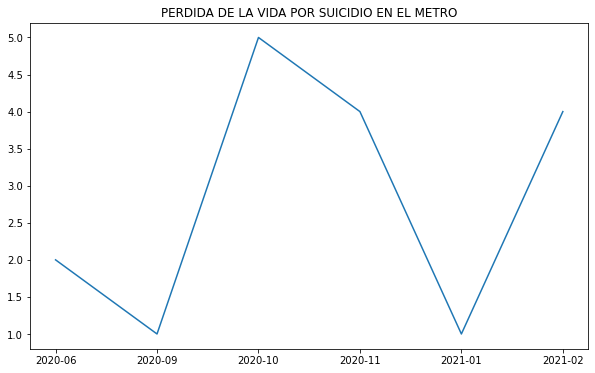

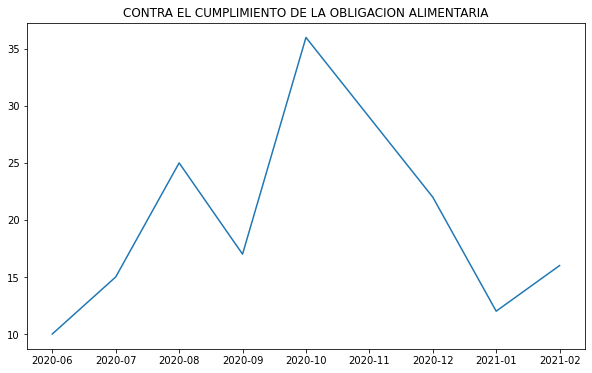

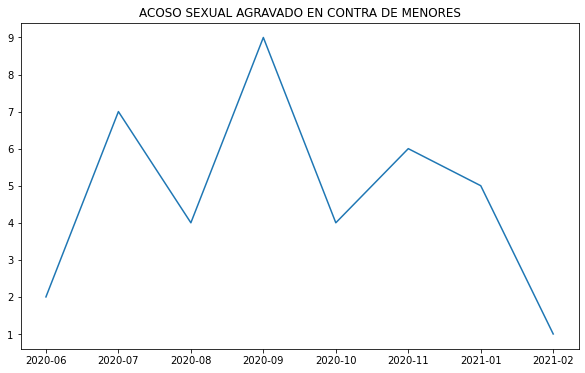

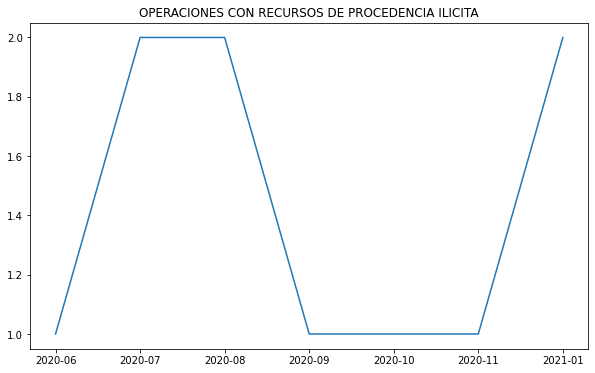

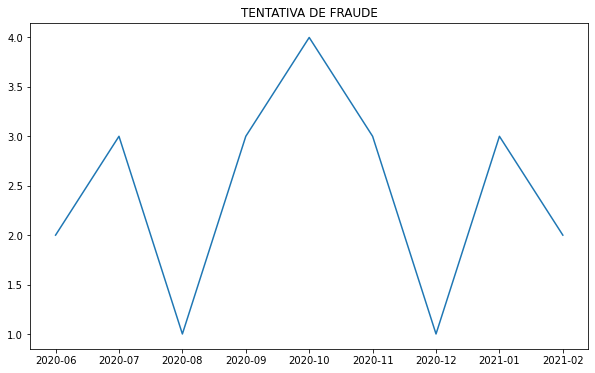

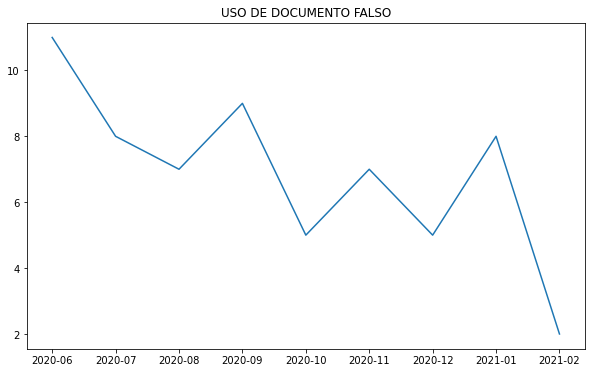

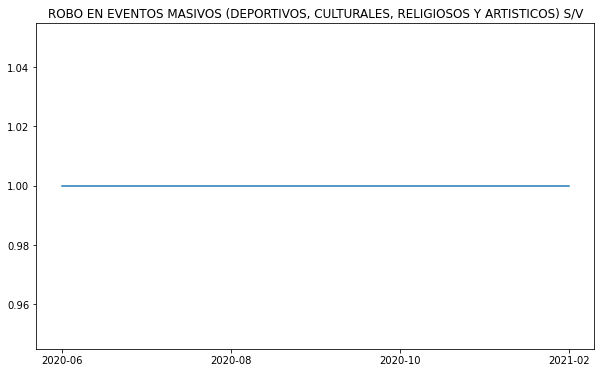

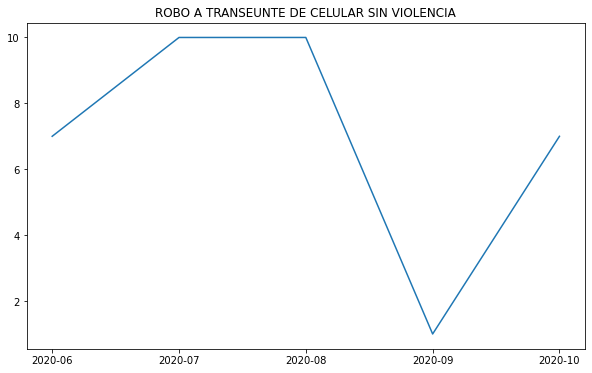

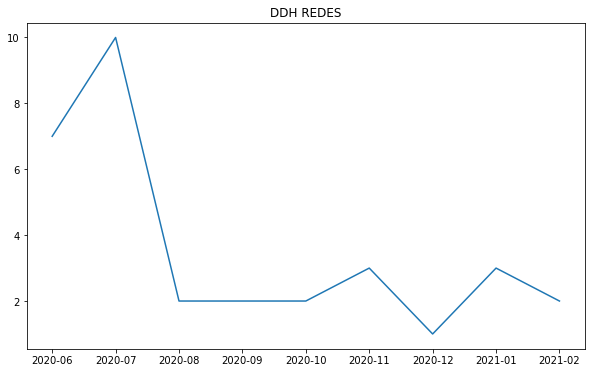

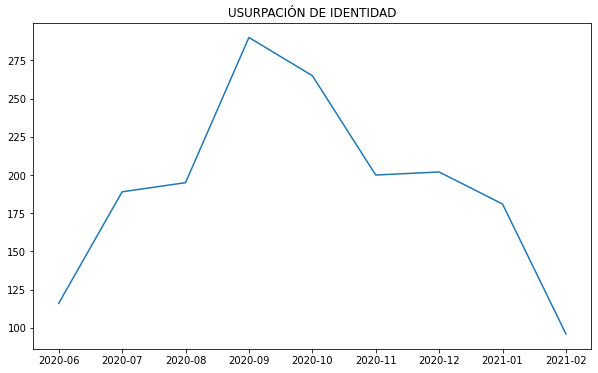

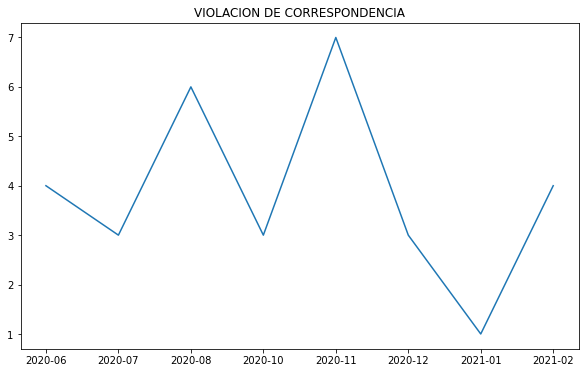

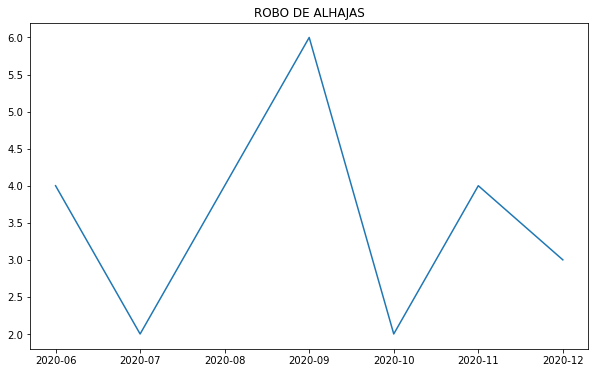

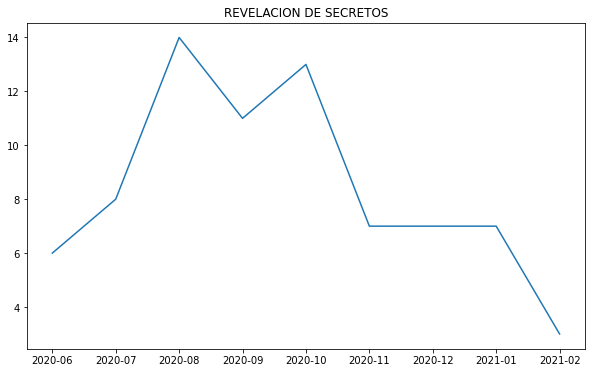

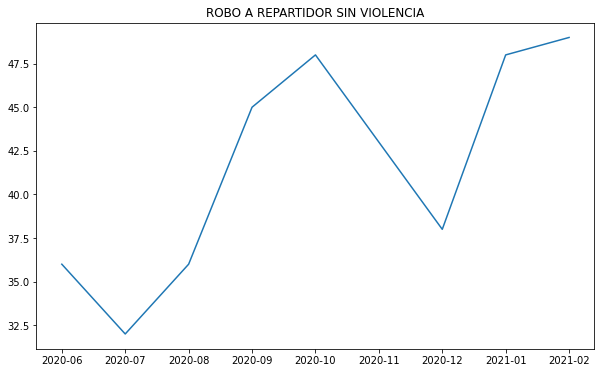

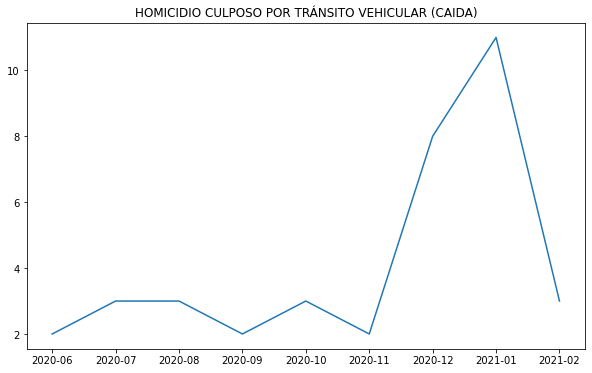

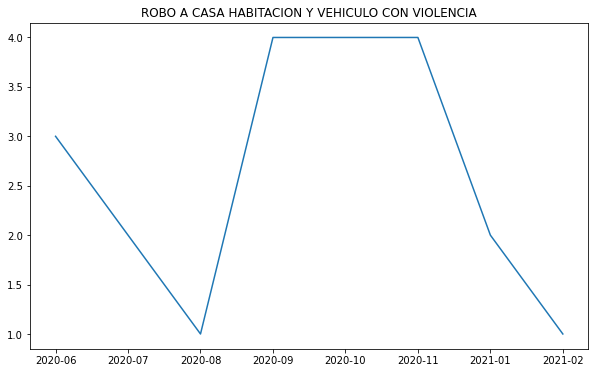

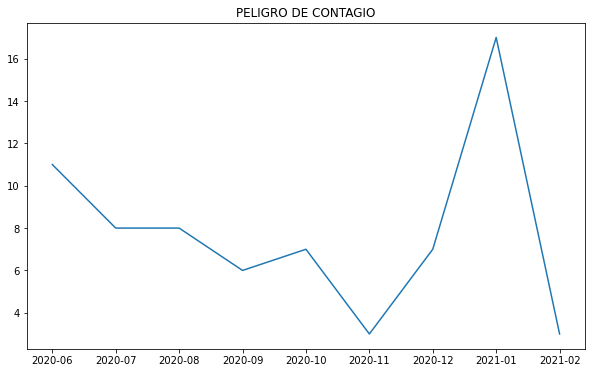

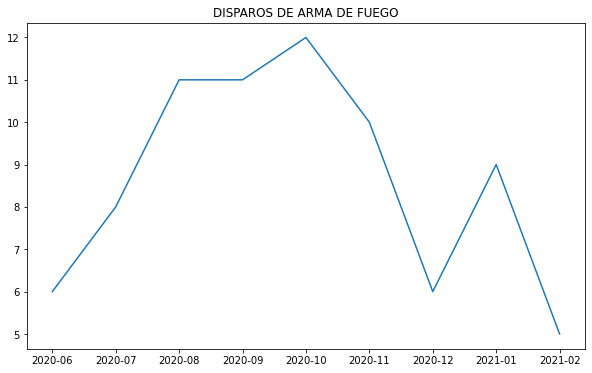

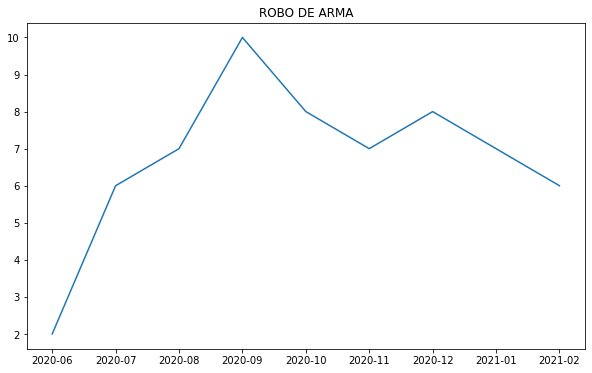

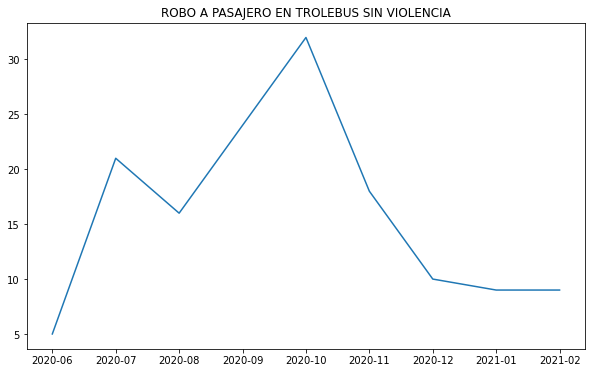

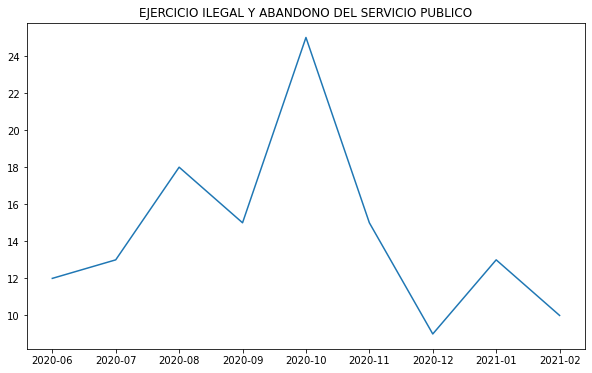

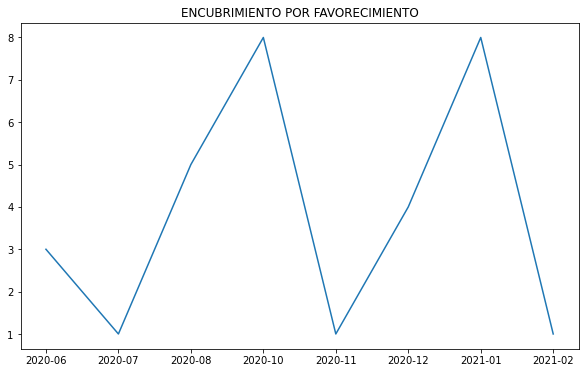

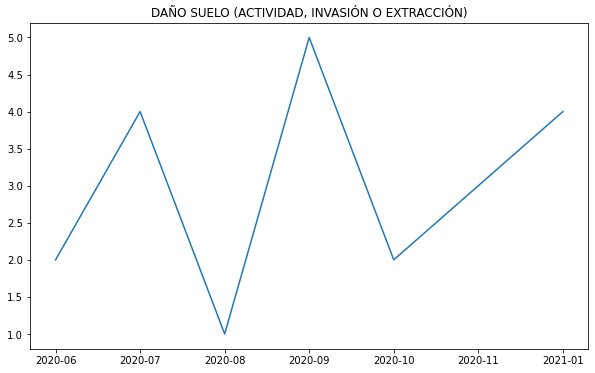

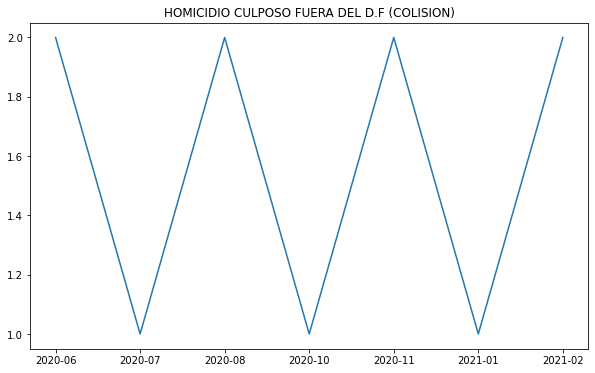

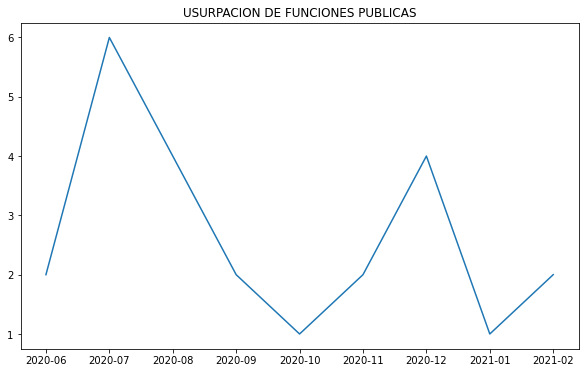

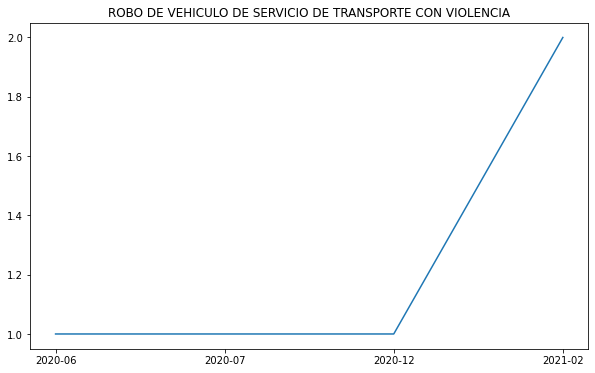

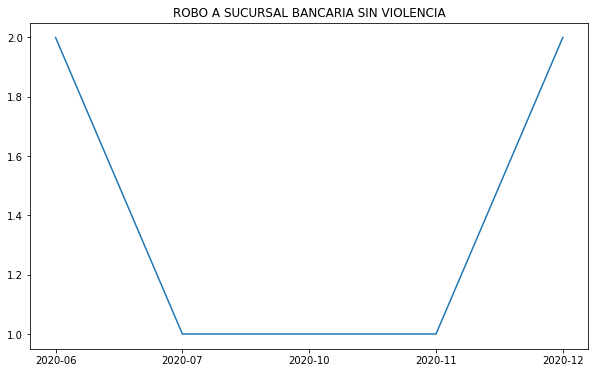

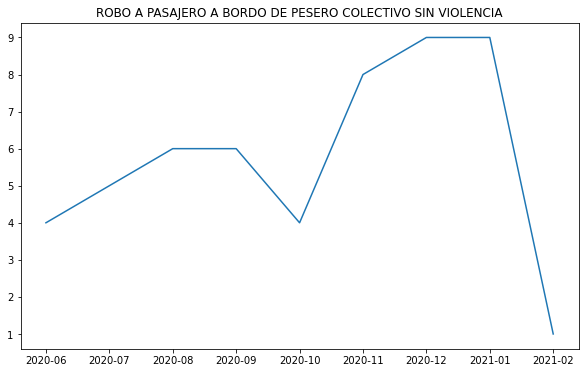

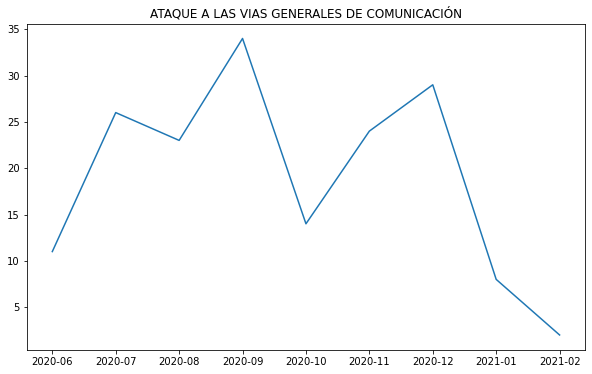

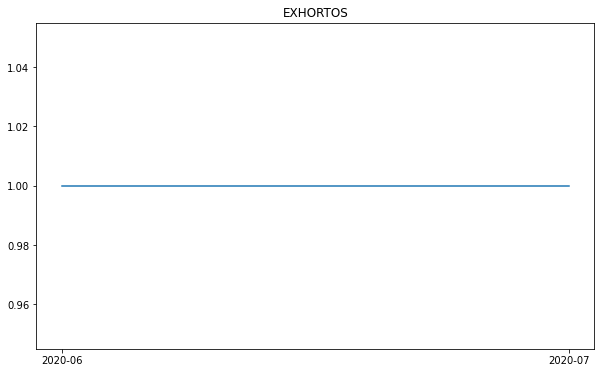

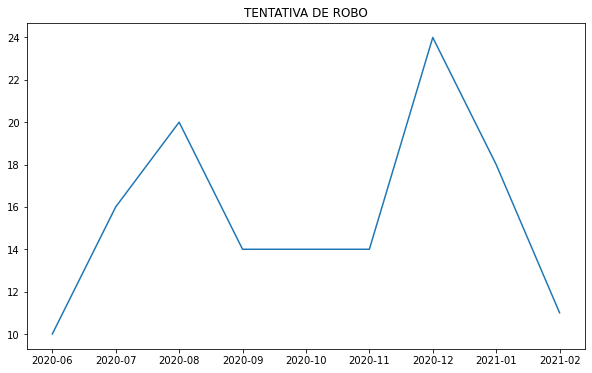

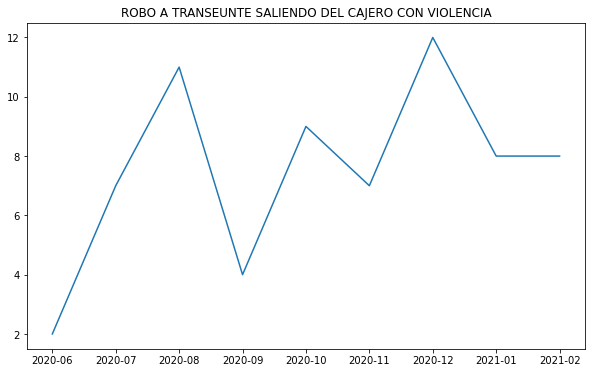

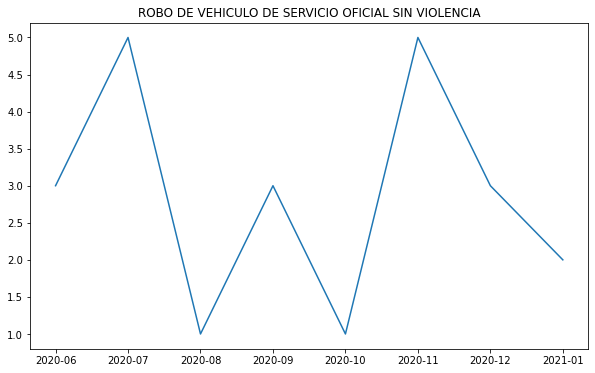

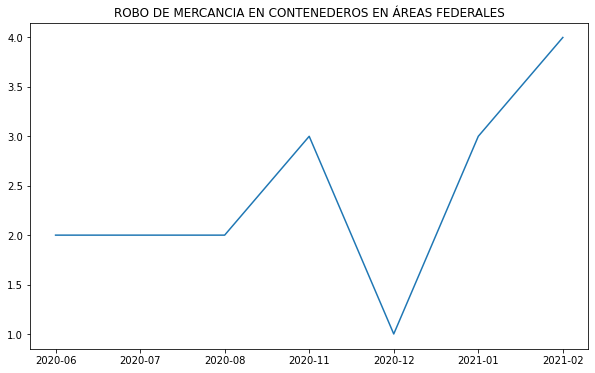

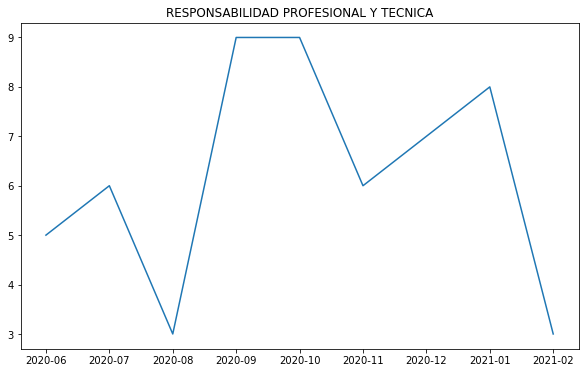

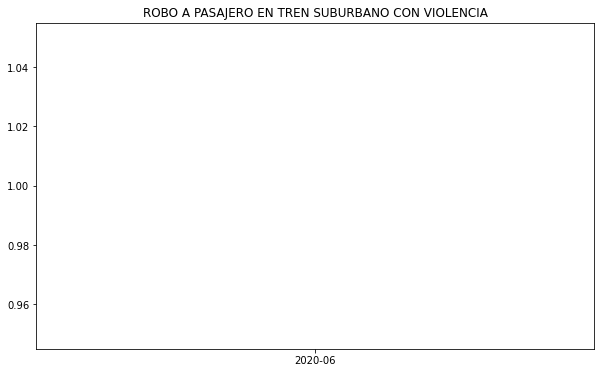

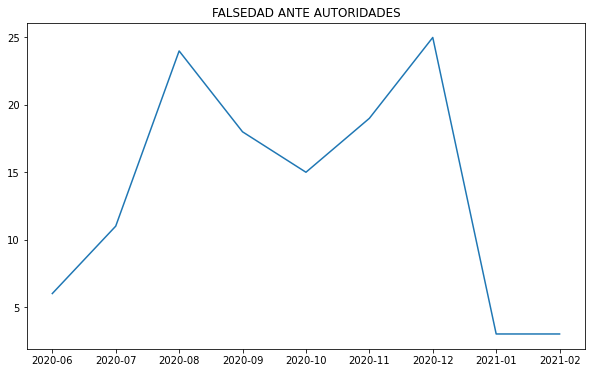

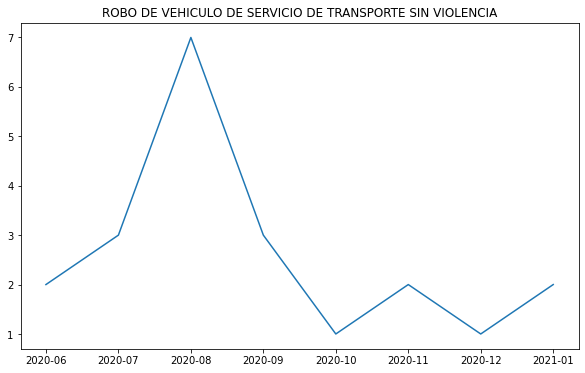

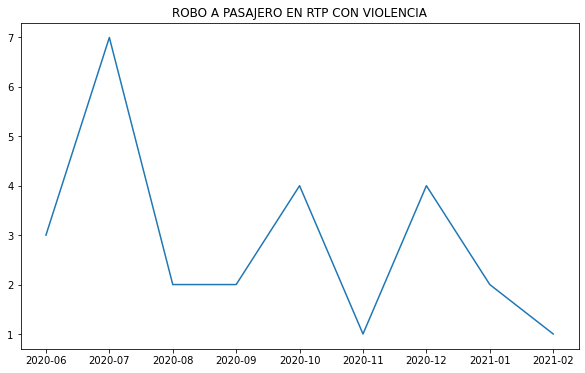

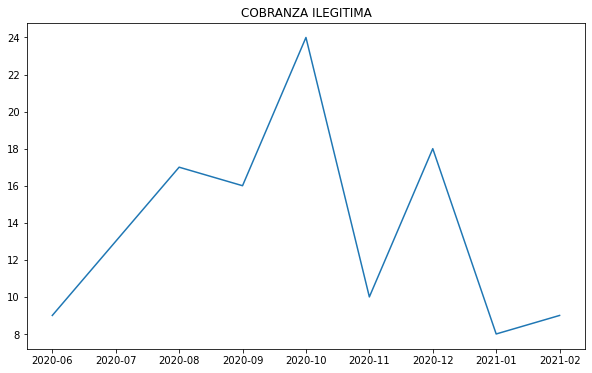

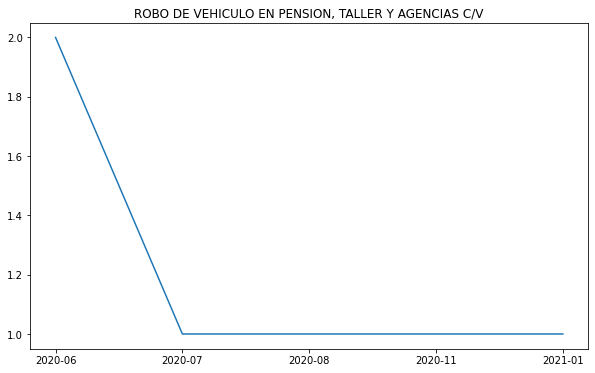

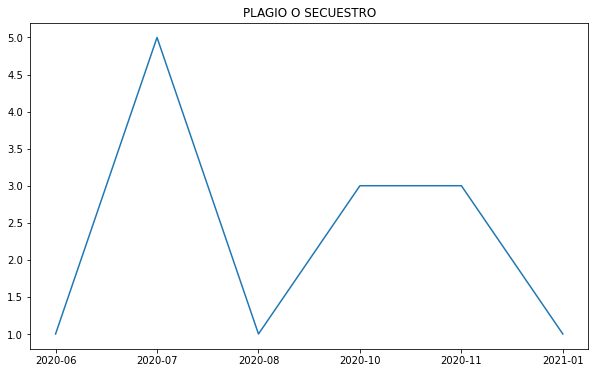

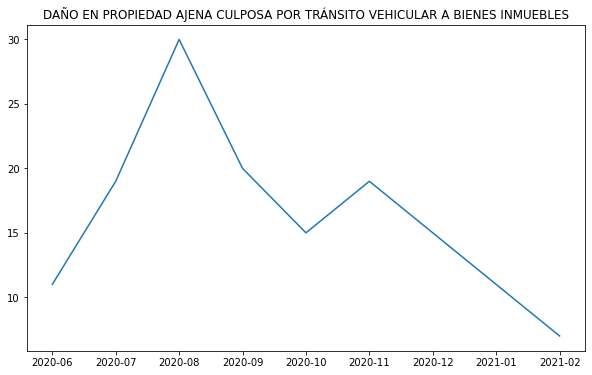

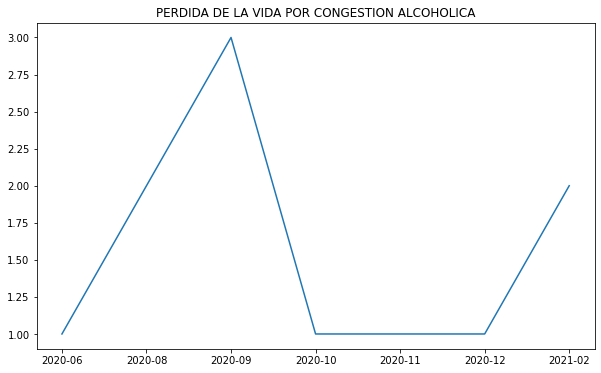

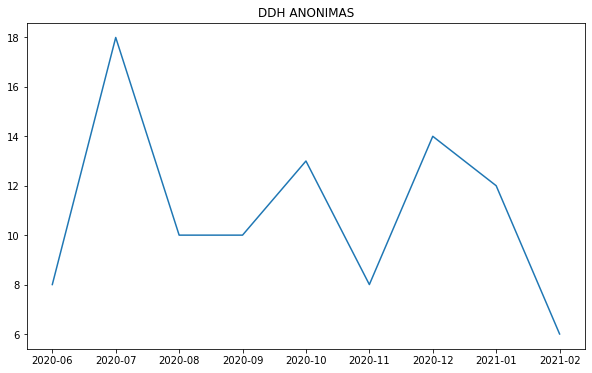

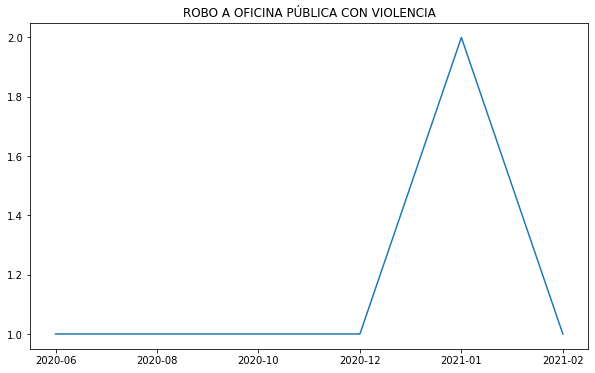

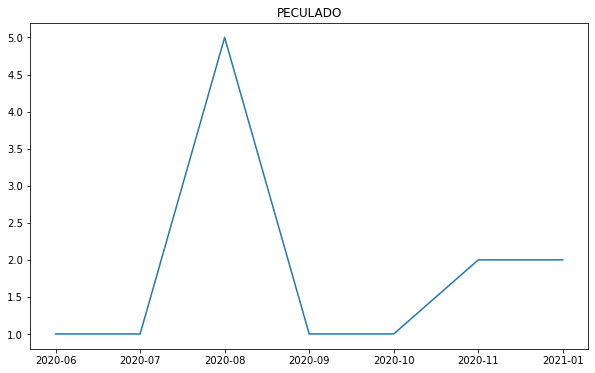

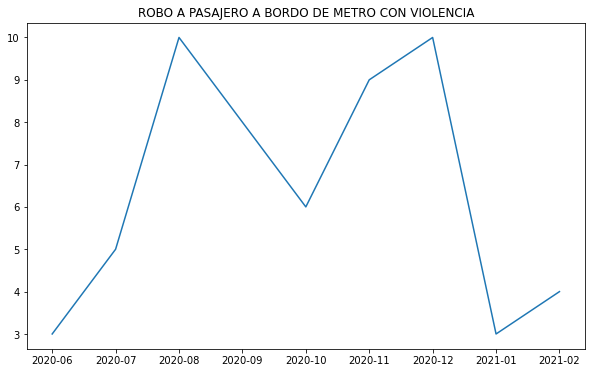

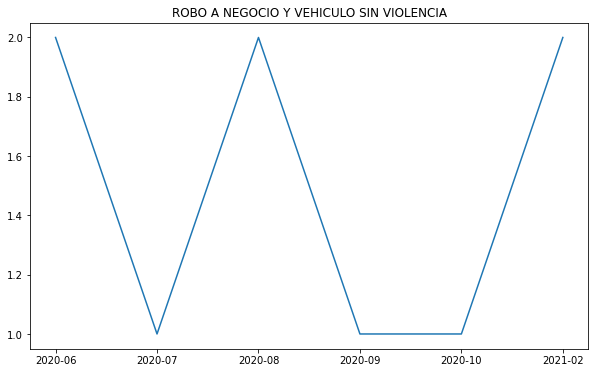

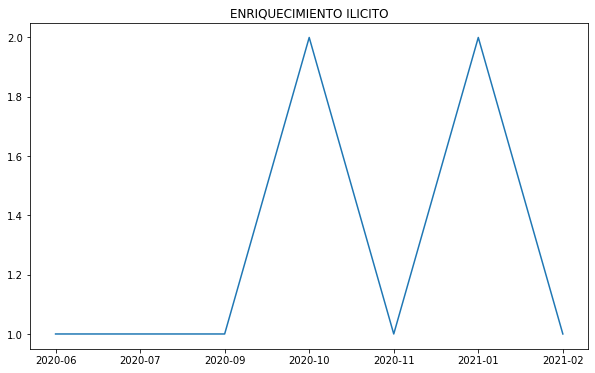

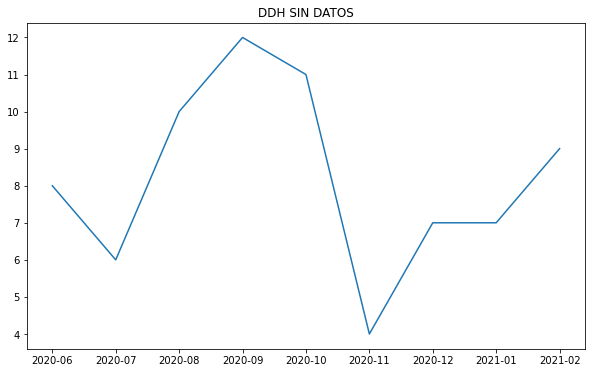

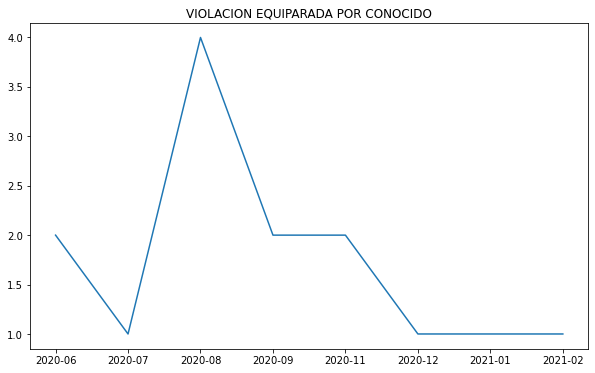

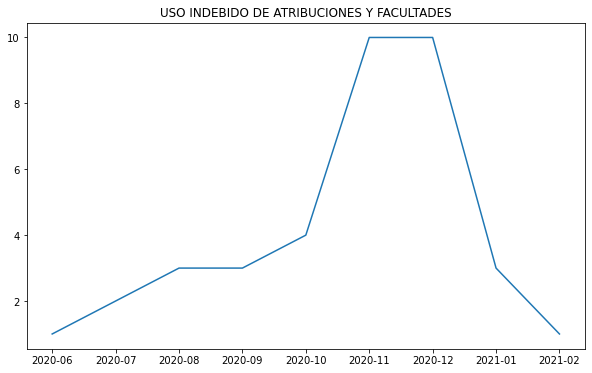

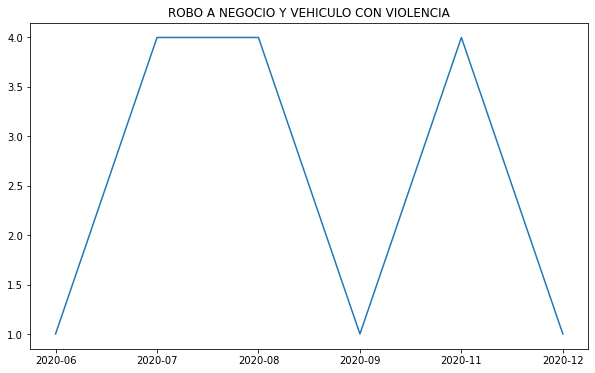

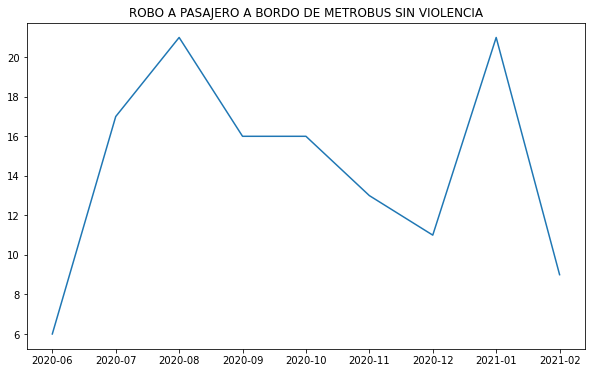

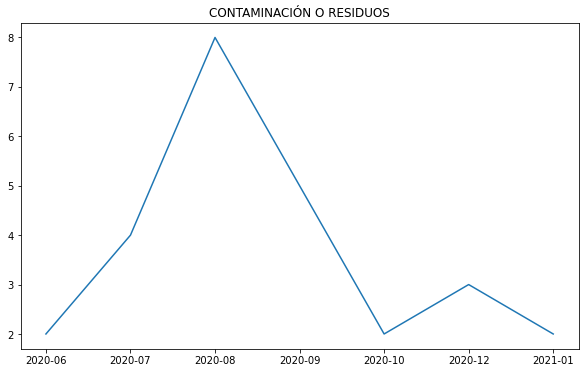

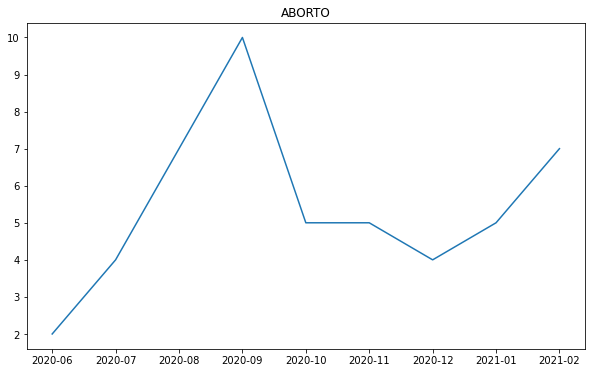

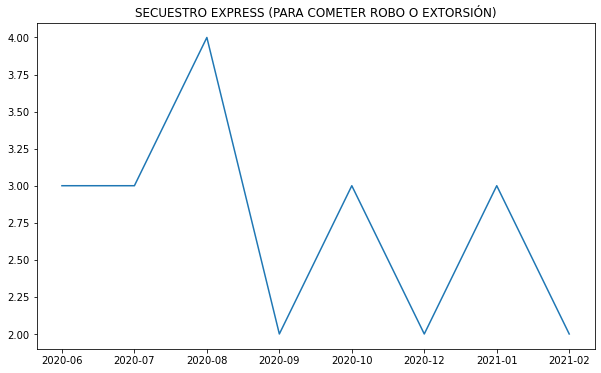

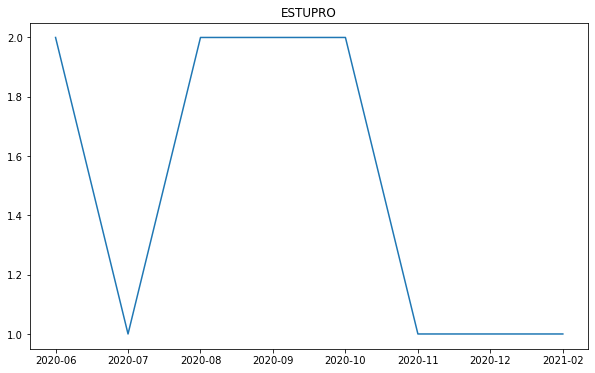

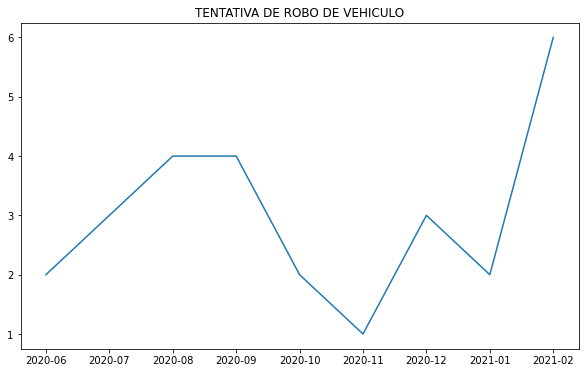

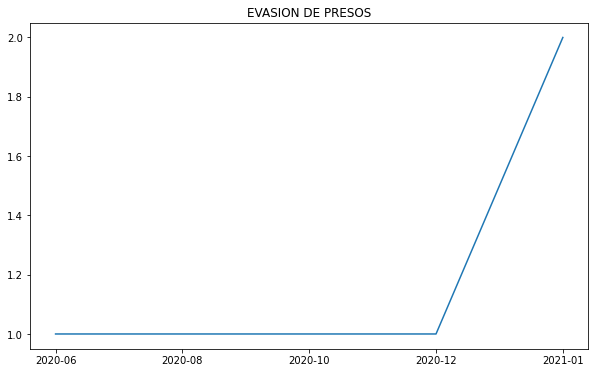

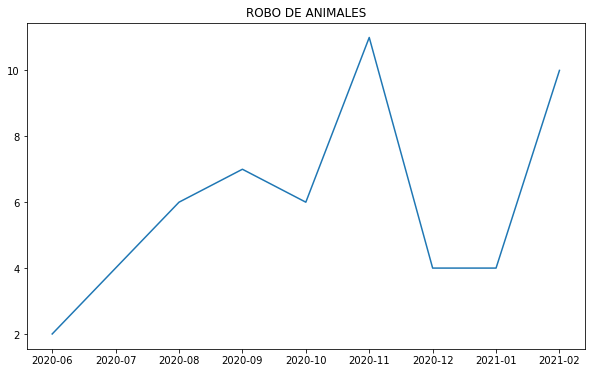

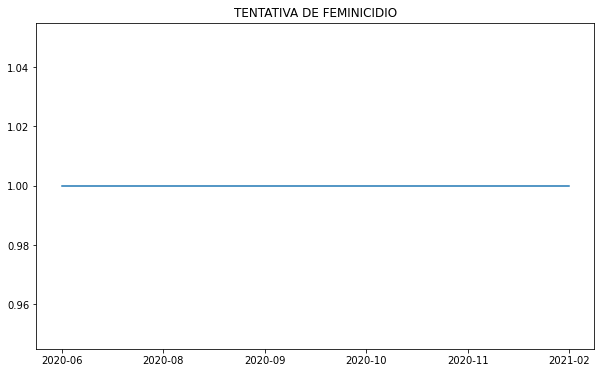

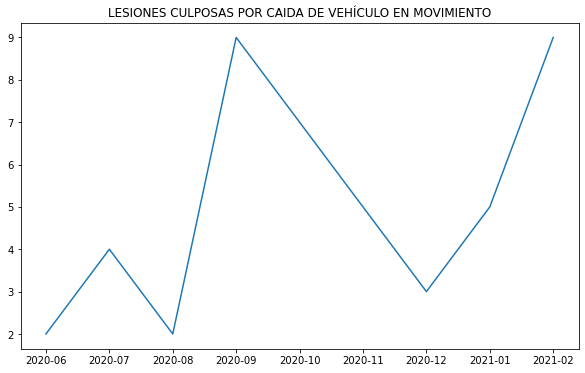

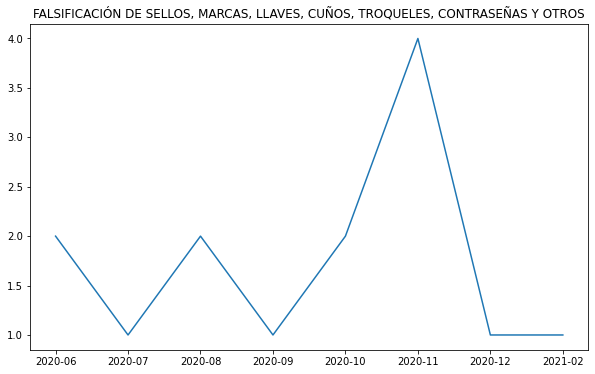

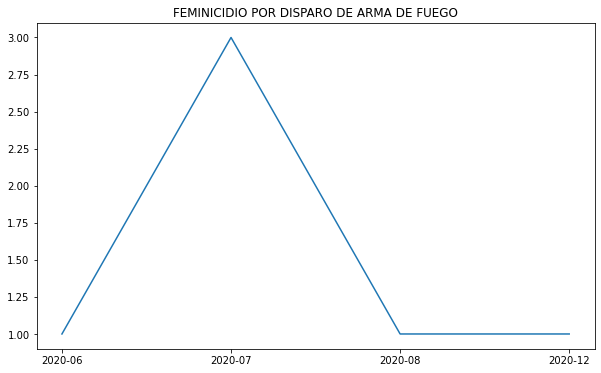

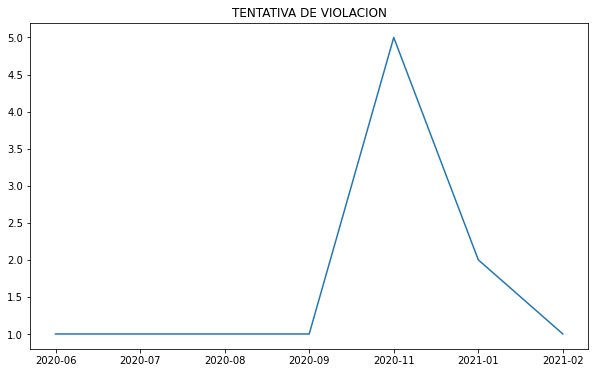

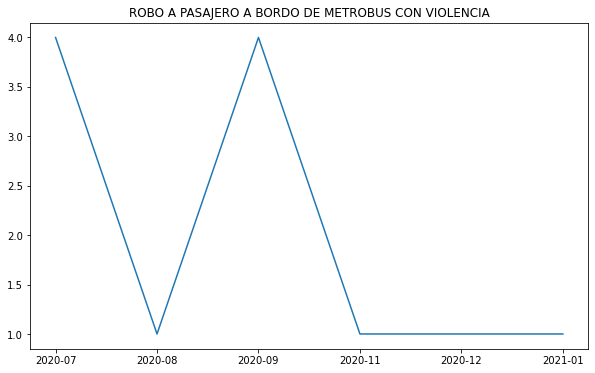

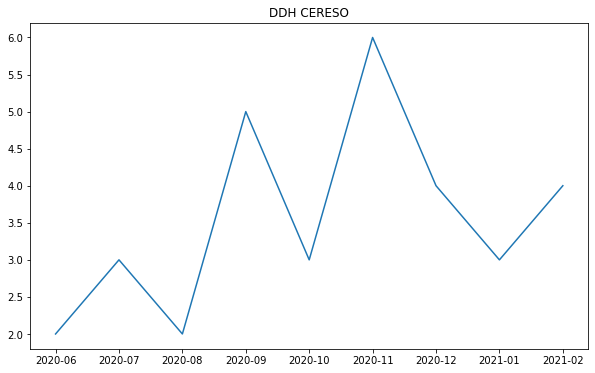

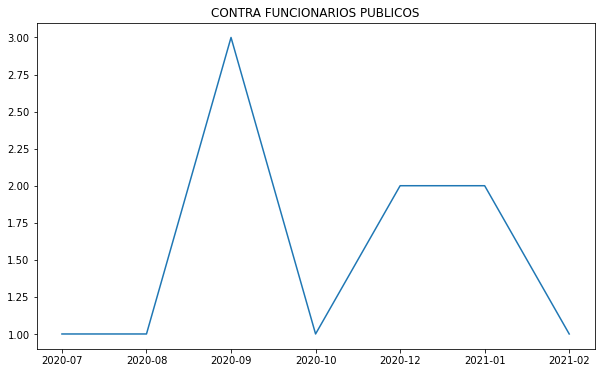

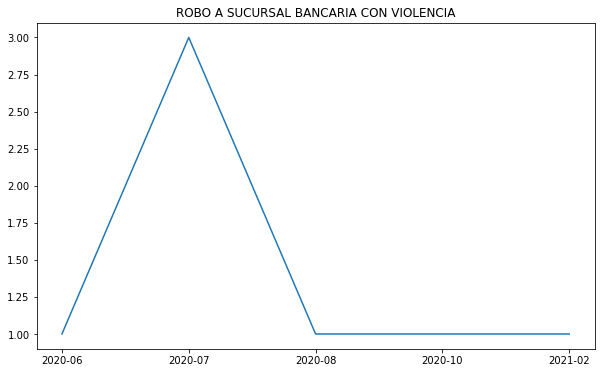

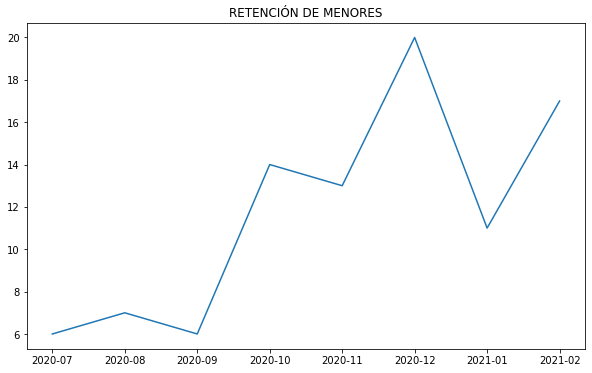

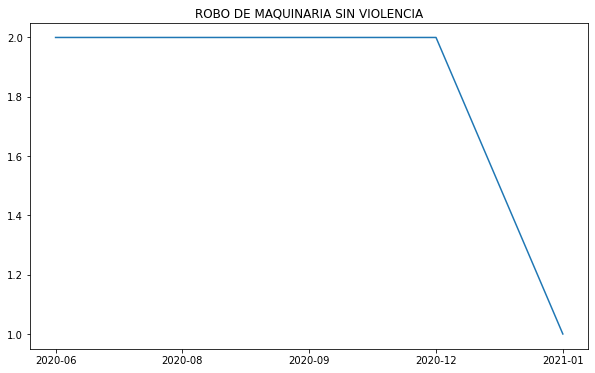

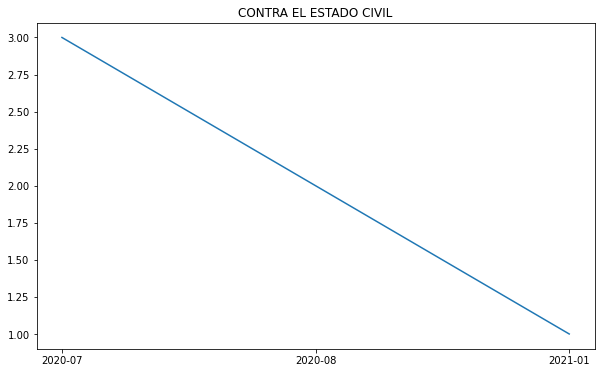

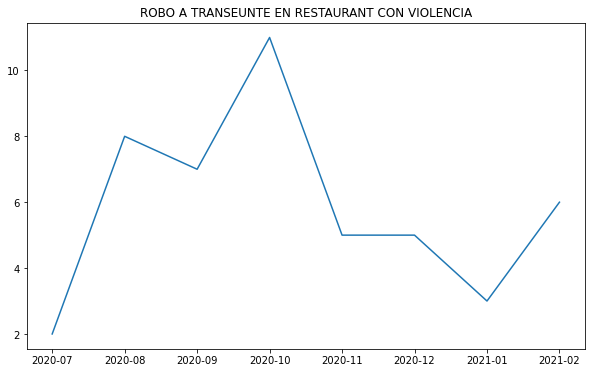

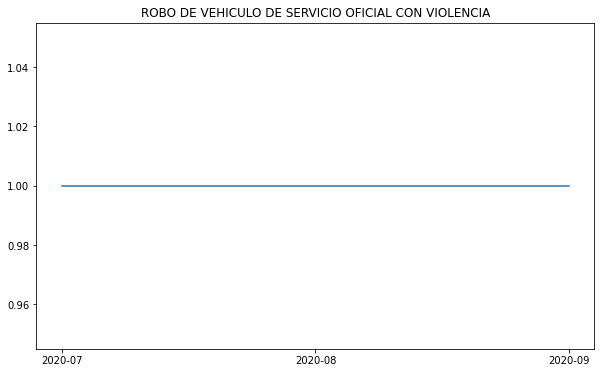

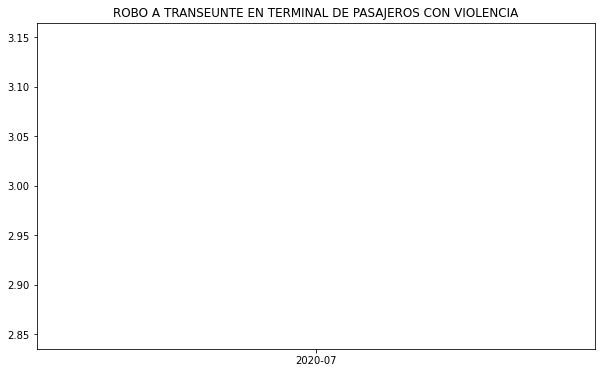

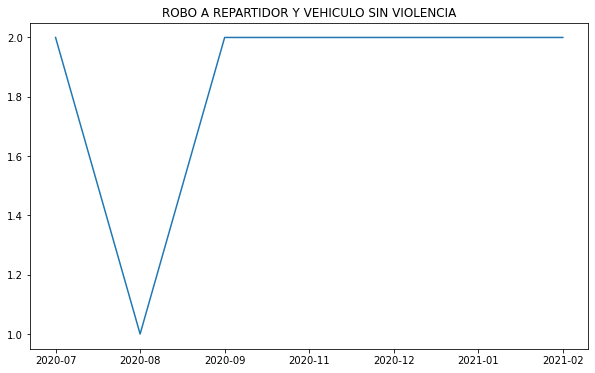

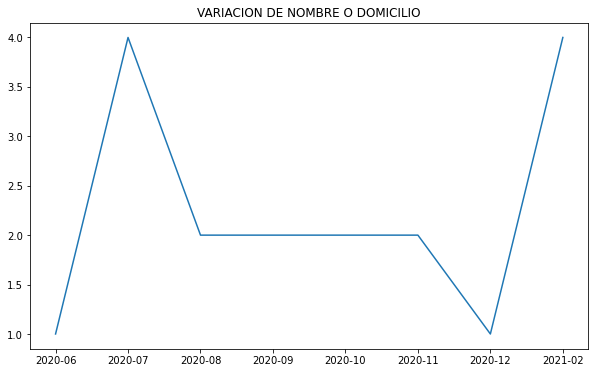

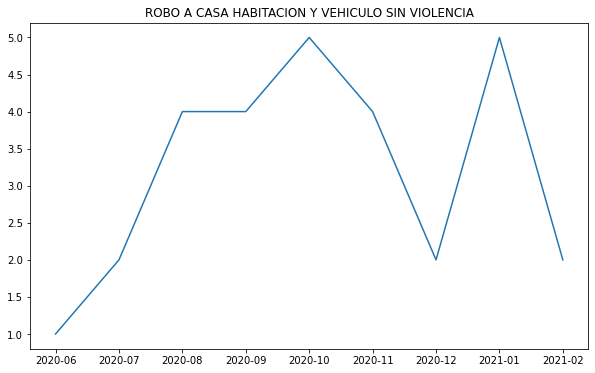

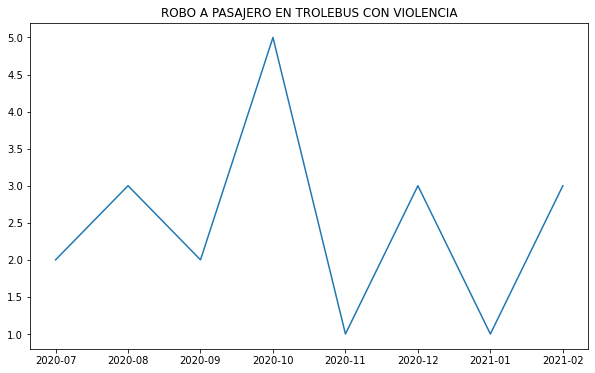

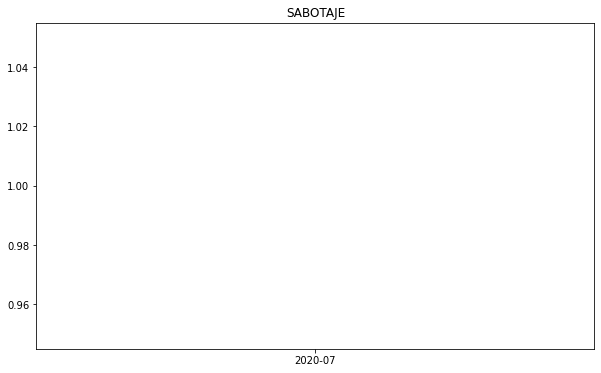

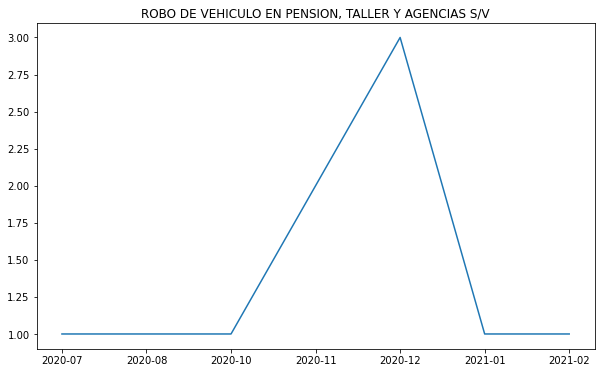

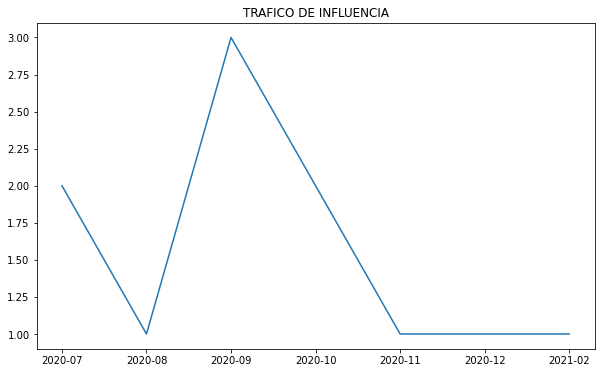

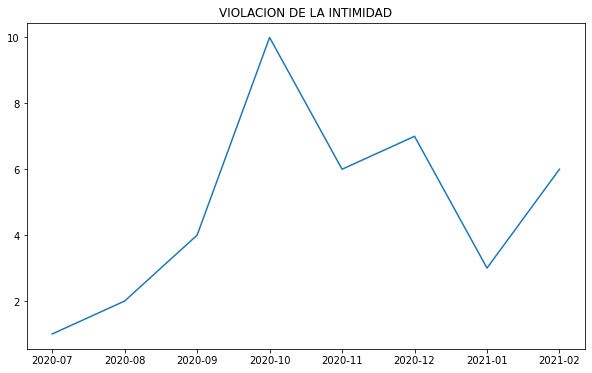

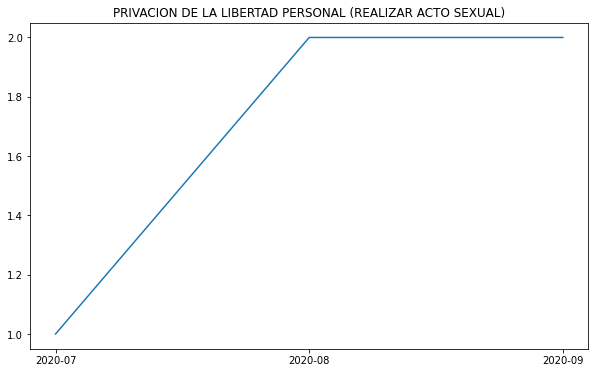

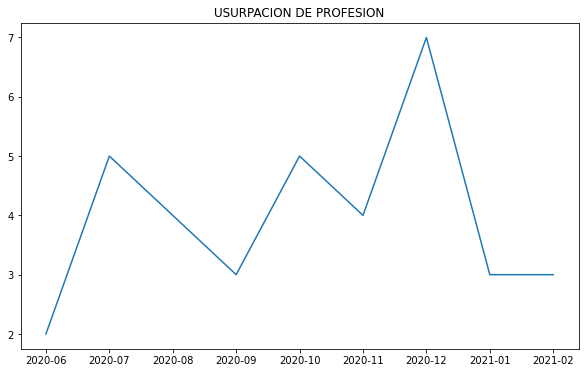

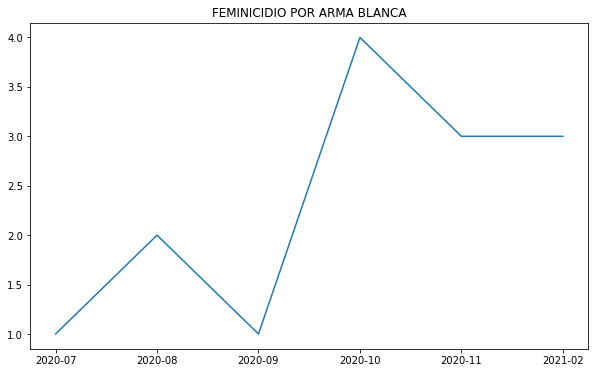

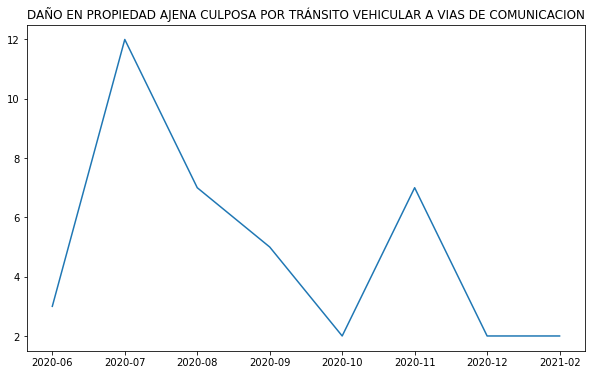

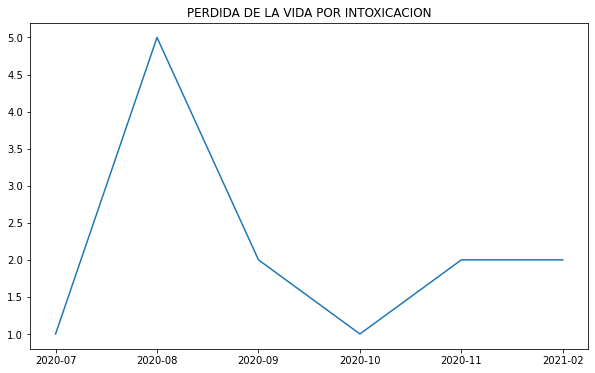

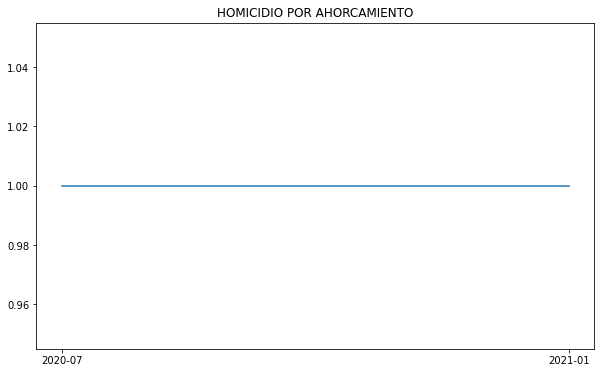

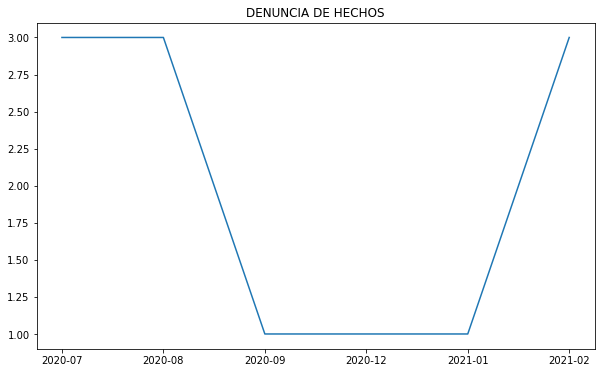

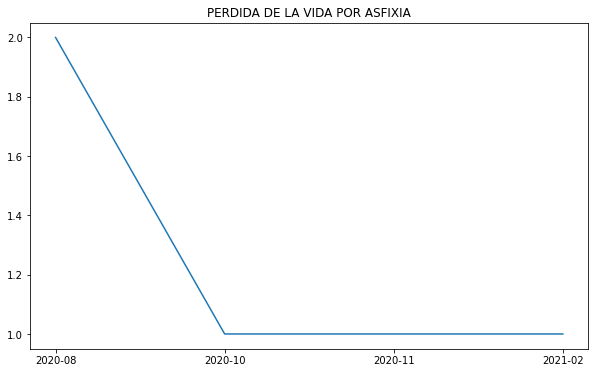

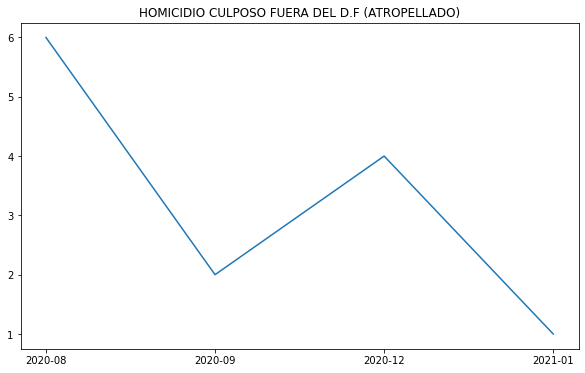

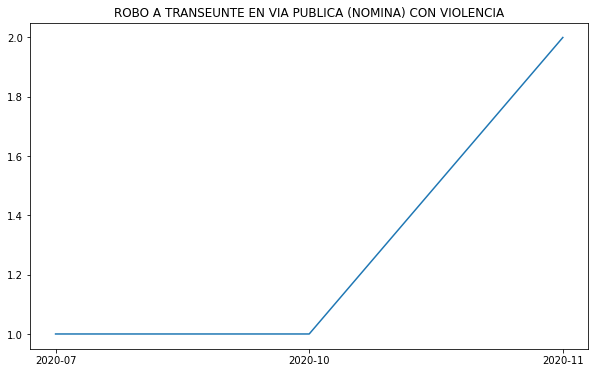

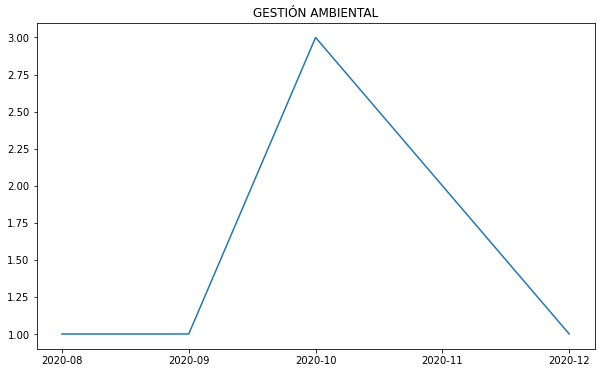

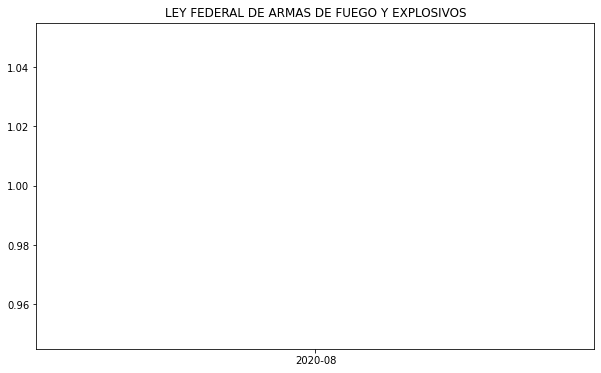

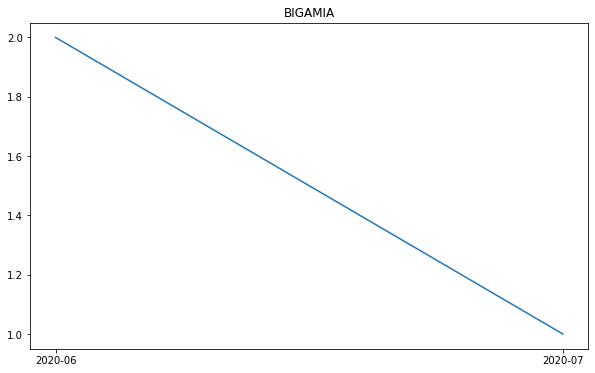

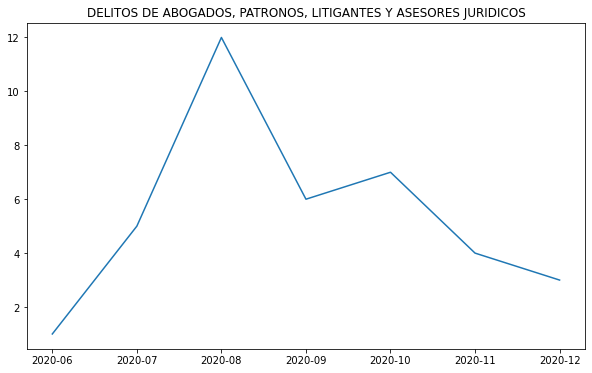

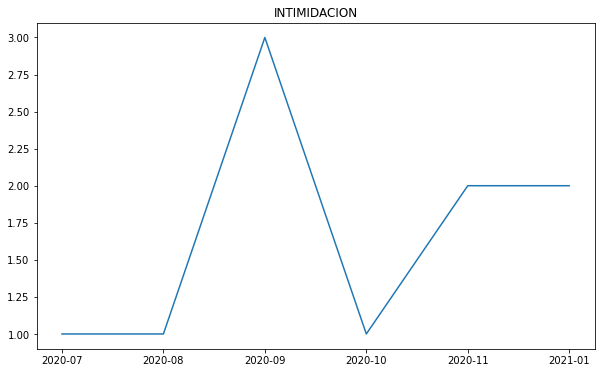

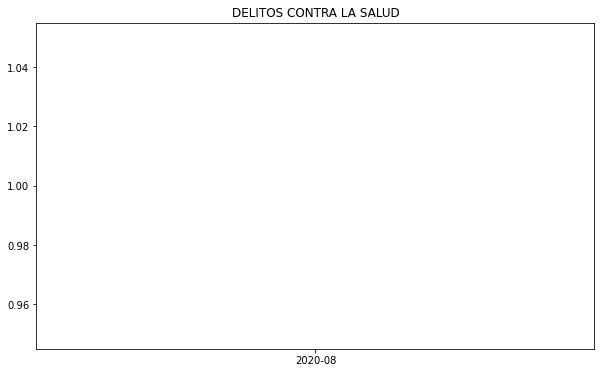

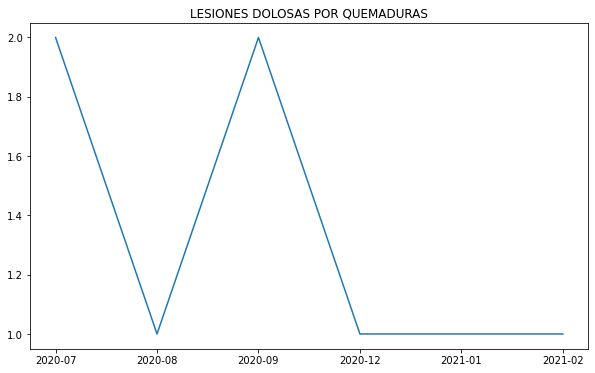

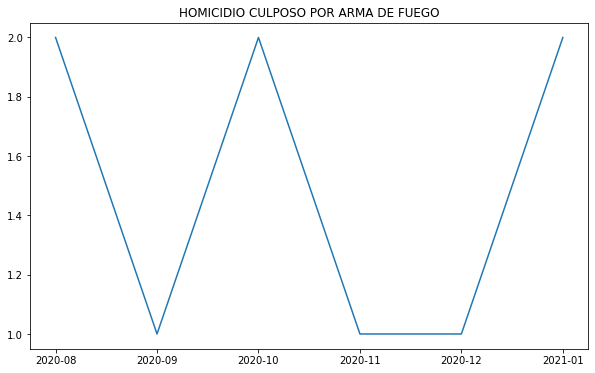

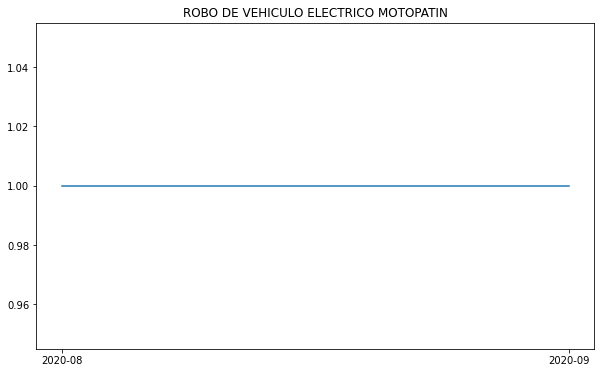

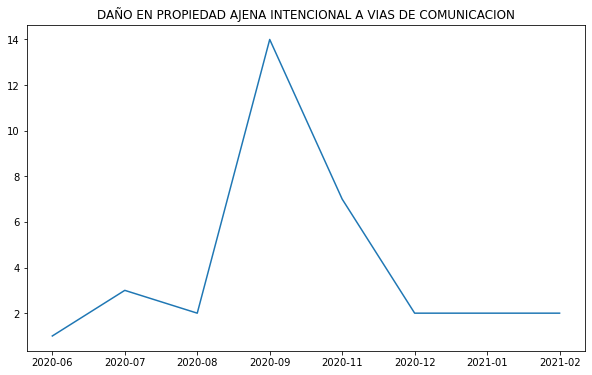

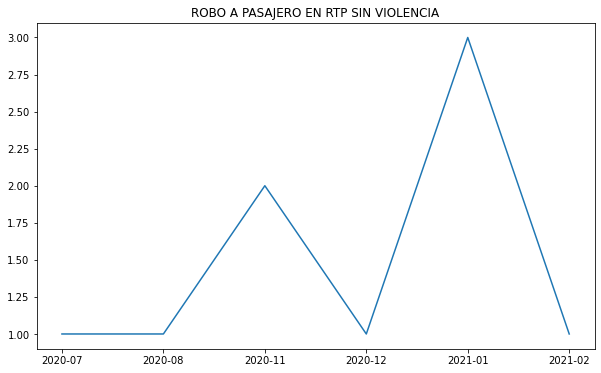

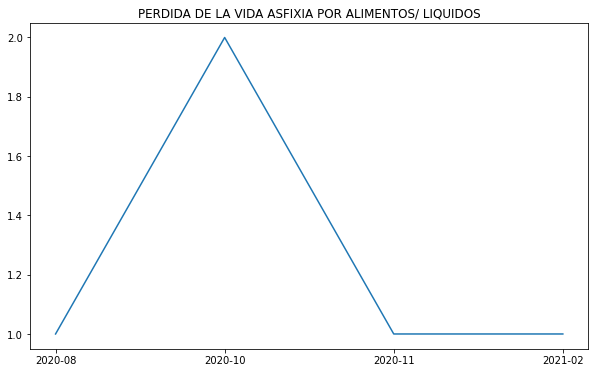

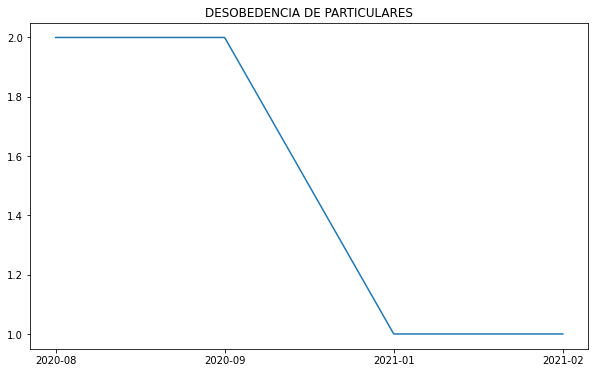

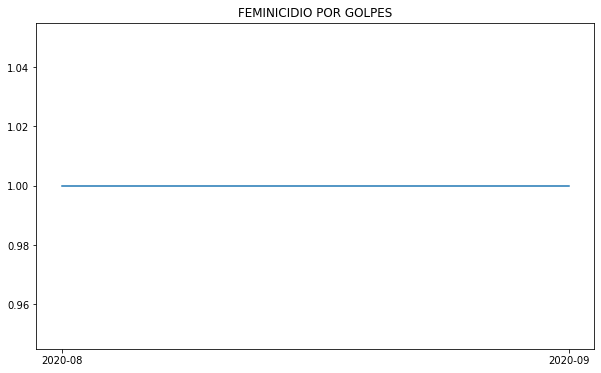

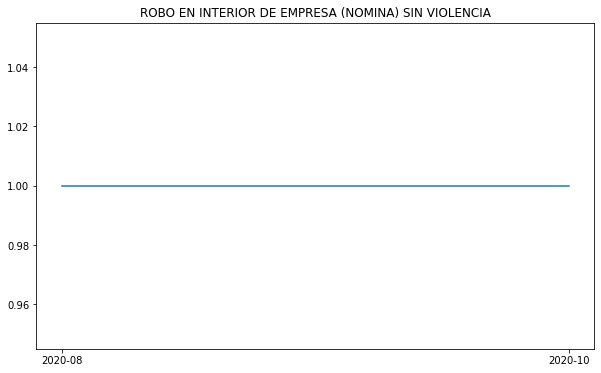

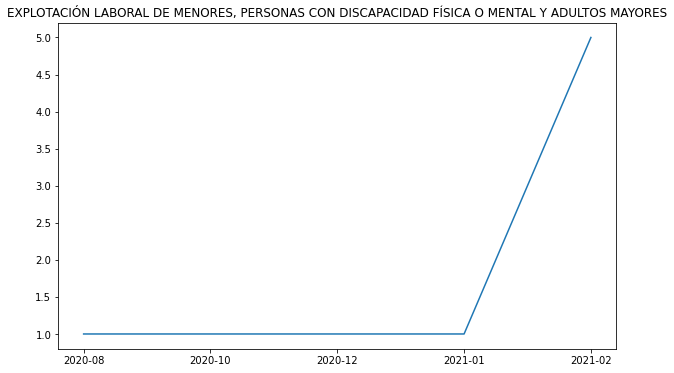

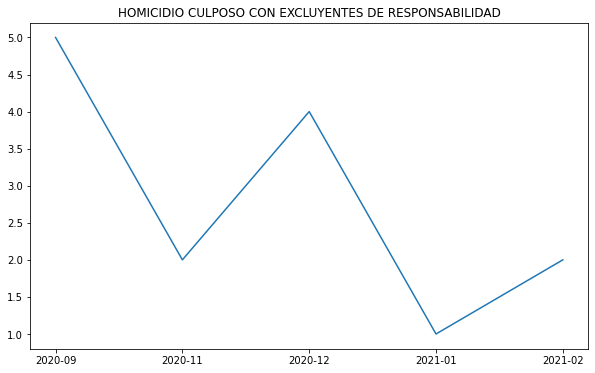

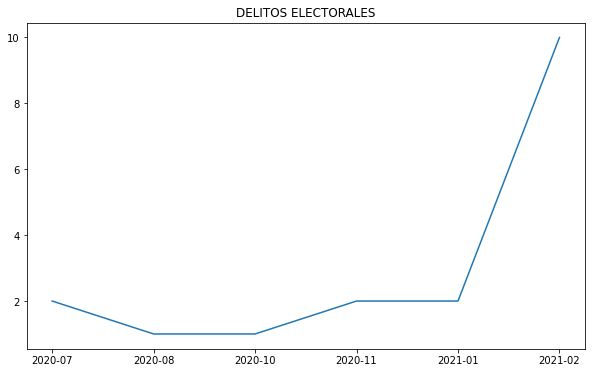

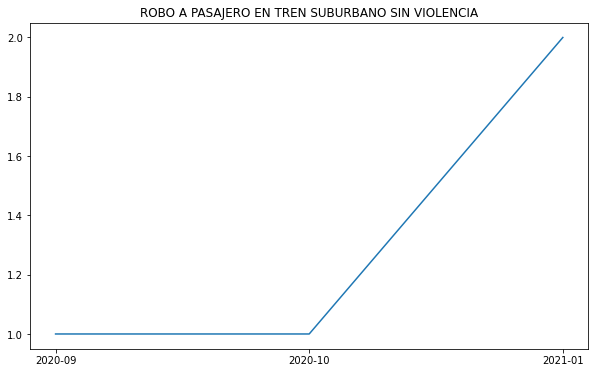

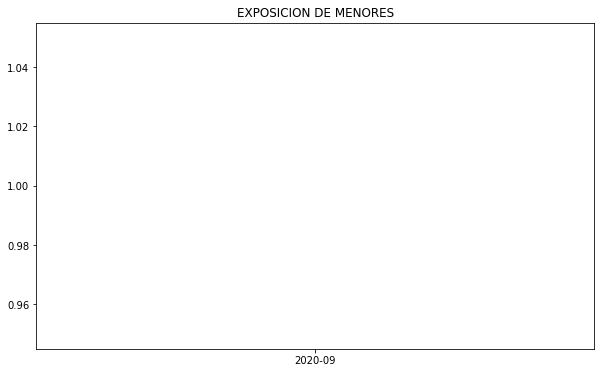

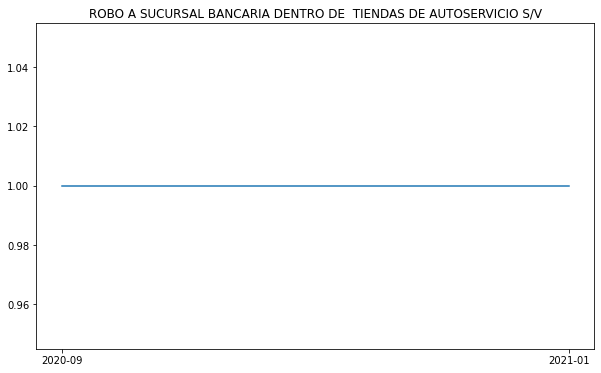

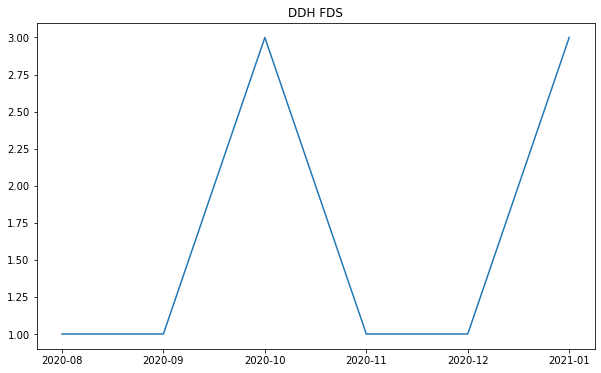

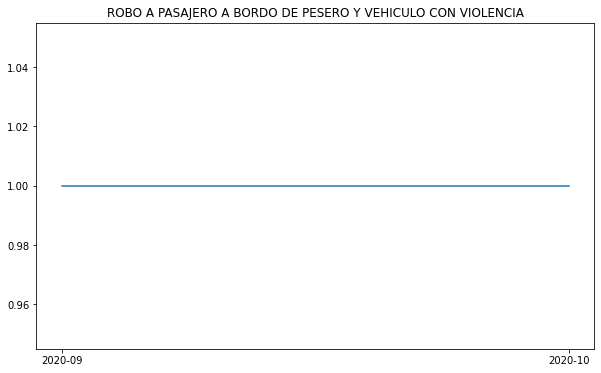

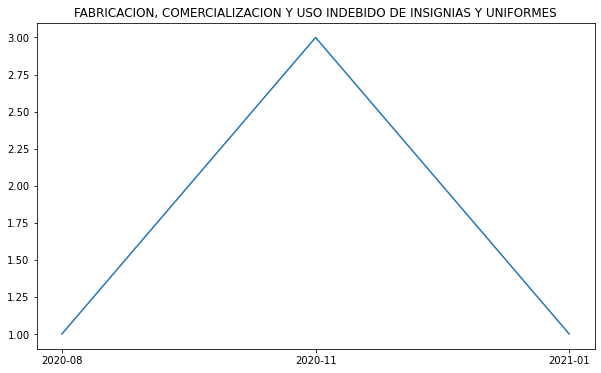

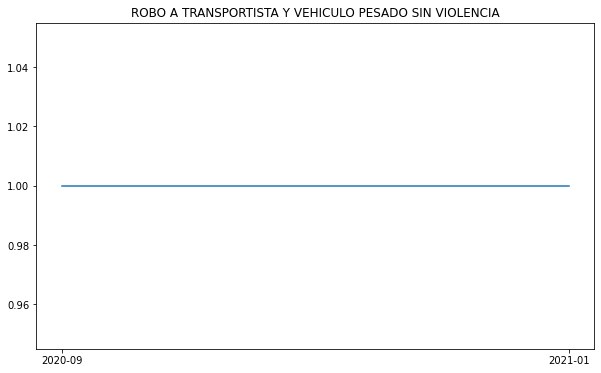

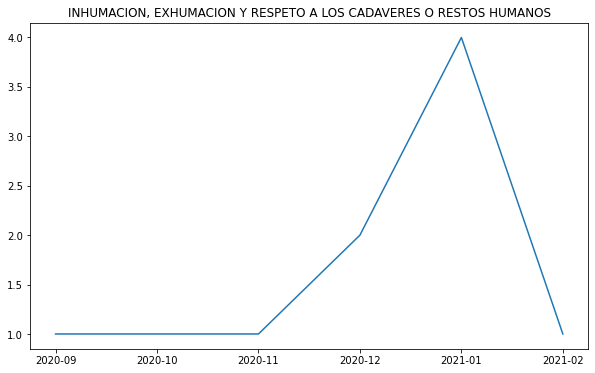

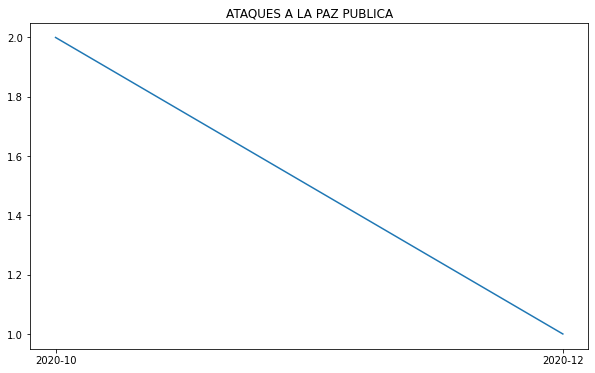

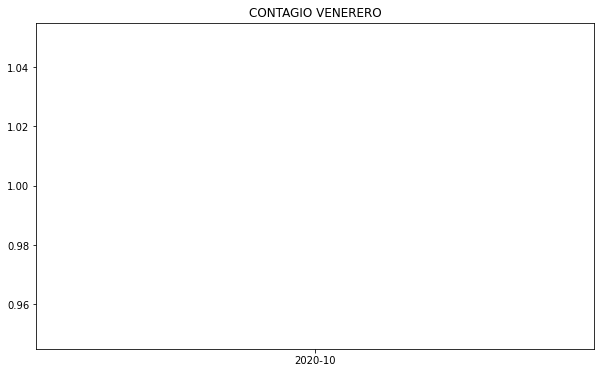

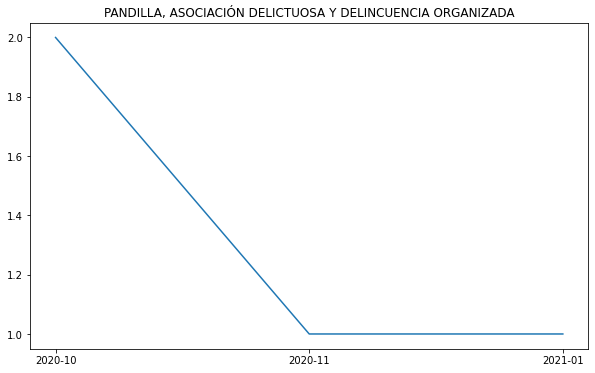

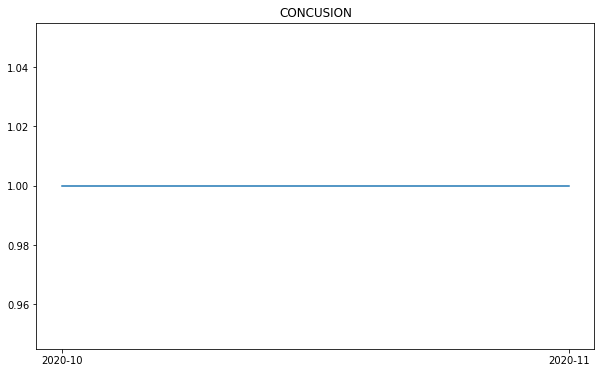

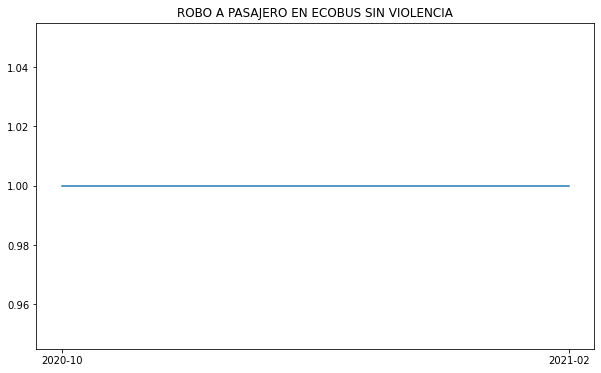

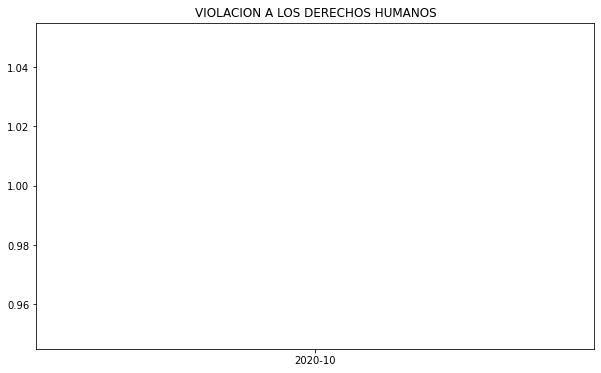

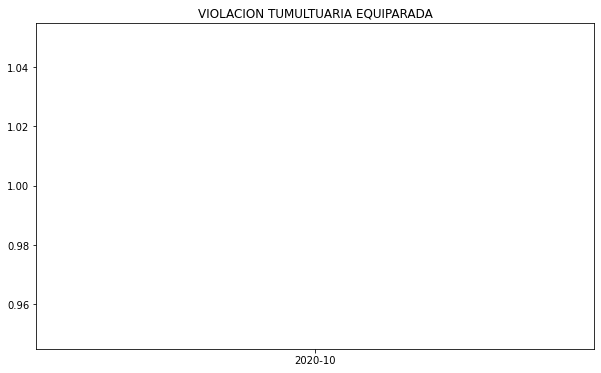

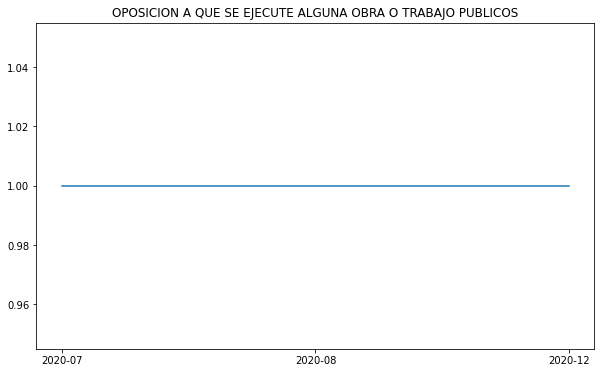

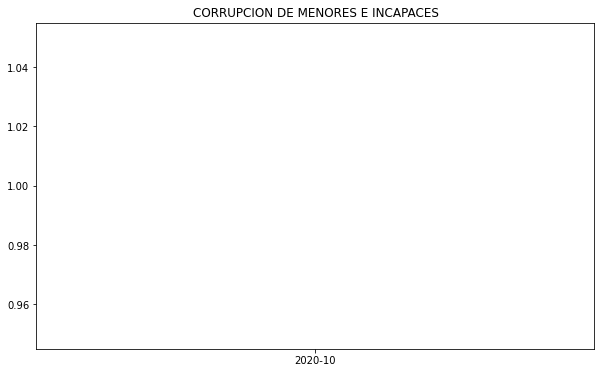

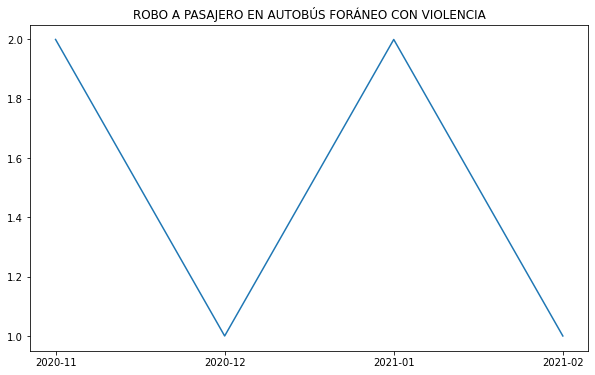

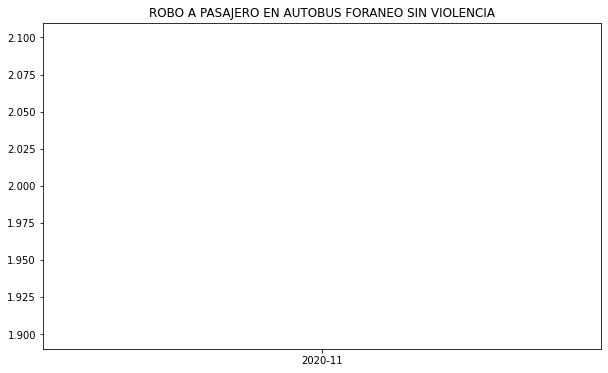

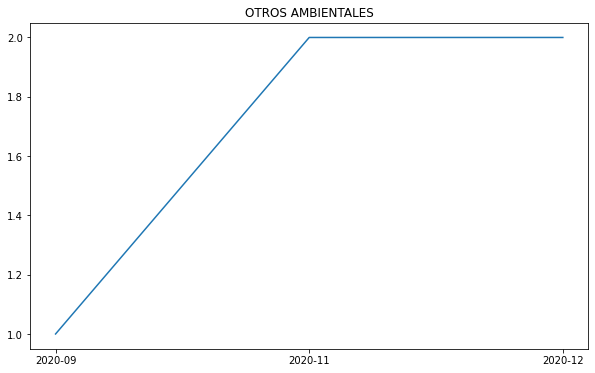

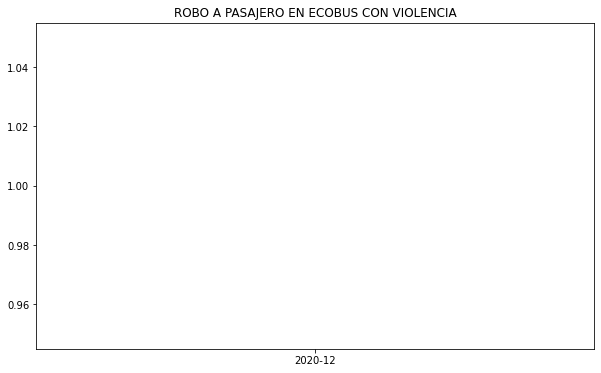

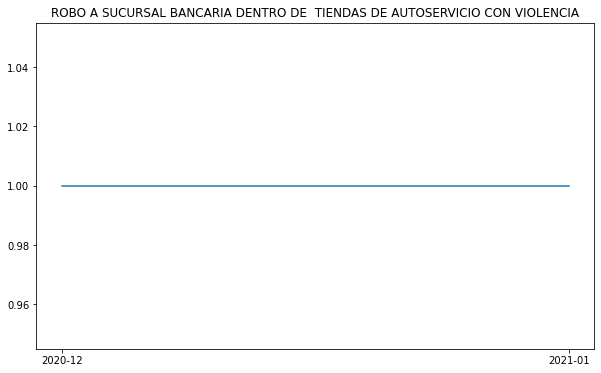

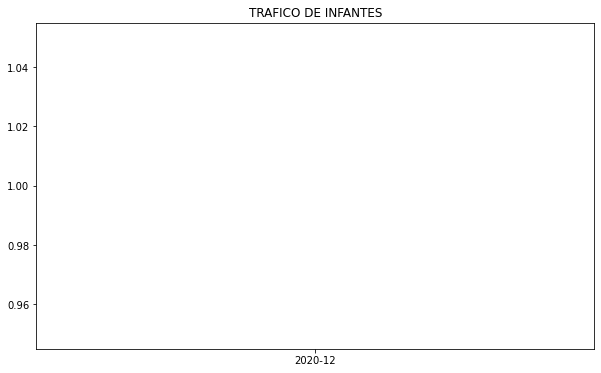

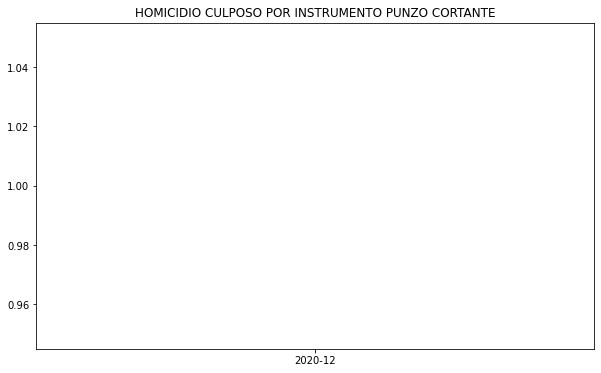

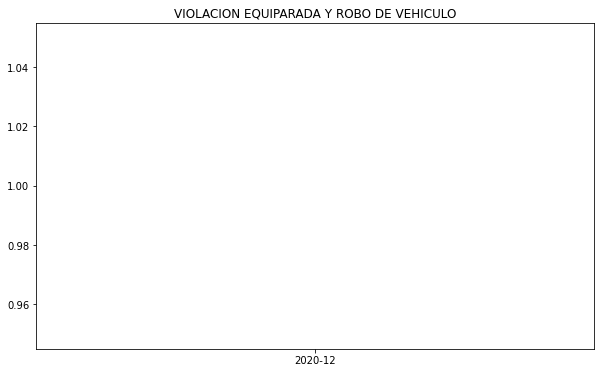

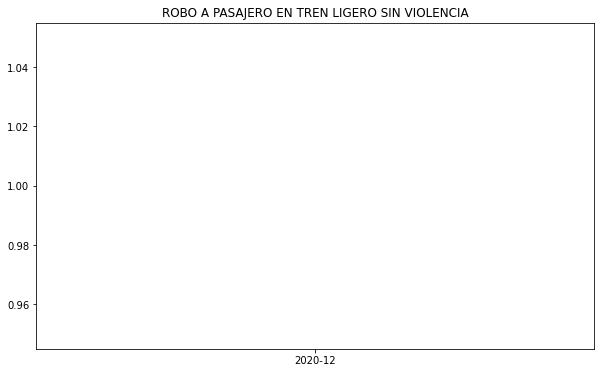

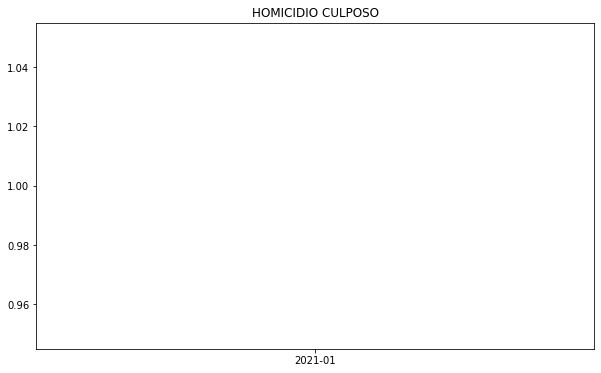

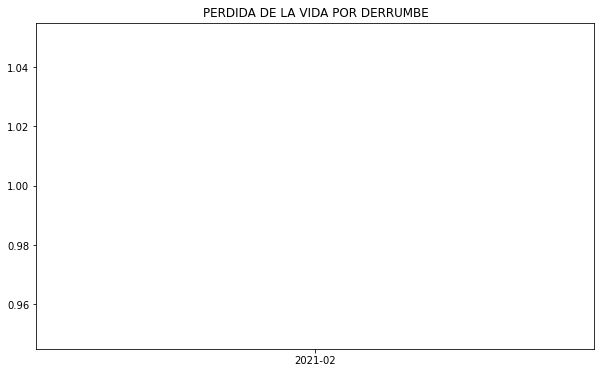

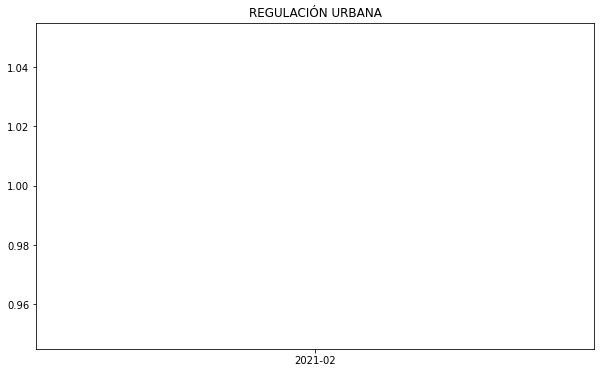

In [340]:
for delito in pgr_lastyear.delito.unique():
    aux = pgr_lastyear[pgr_lastyear.delito == delito].groupby(['mes_anio_hechos'])[['num_delitos']].sum()
    fig = plt.figure(figsize=(10,6))
    plt.plot(aux)
    plt.title(delito)
    plt.show()

## ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?.¿Por qué crees que sea esto?

In [613]:
pgr.groupby(['alcaldia_hechos']).sum()[['num_delitos']].sort_values(by='num_delitos')

num_delitos
alcaldia_hechos                   
ABALA                            1
ENCARNACION DE DIAZ              1
SAN JUAN GUICHICOVI              1
SAN JUAN DE LOS LAGOS            1
ERONGARICUARO                    1
...                            ...
ALVARO OBREGON               78922
BENITO JUAREZ                97733
GUSTAVO A MADERO            117082
IZTAPALAPA                  175723
CUAUHTEMOC                  182728

[542 rows x 1 columns]

## Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [606]:
pgr.groupby(['alcaldia_hechos','colonia_hechos']).sum()[['num_delitos']].sort_values(by='num_delitos')

num_delitos
alcaldia_hechos colonia_hechos               
ABALA           nan                         1
BUSTAMANTE      nan                         1
BUCTZOTZ        nan                         1
BOCOYNA         nan                         1
RAFAEL DELGADO  nan                         1
...                                       ...
BENITO JUAREZ   NARVARTE                12516
CUAUHTEMOC      ROMA NORTE              14181
BENITO JUAREZ   DEL VALLE CENTRO        17141
CUAUHTEMOC      DOCTORES                22761
                CENTRO                  38682

[2350 rows x 1 columns]

## ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

In [674]:
pgr_seasonality = pgr[~(pgr.fecha_hechos.isnull())].copy()

pgr_seasonality = pgr_seasonality[pgr_seasonality.fecha_hechos>=datetime(2016,1,1)]

In [675]:
pgr_seasonality['mes'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.month)
pgr_seasonality['dia'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.day)
pgr_seasonality['year'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.year)
pgr_seasonality['week'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.week)

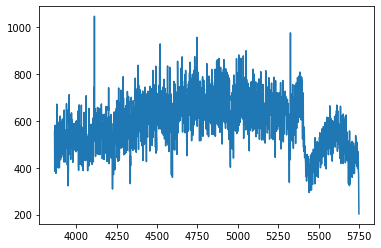

In [664]:
plt.plot(pgr_seasonality.num_delitos)

In [676]:
pgr_seasonality['hour'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.hour)

/home/abraxas/venv/opi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal plot of num_delitos')

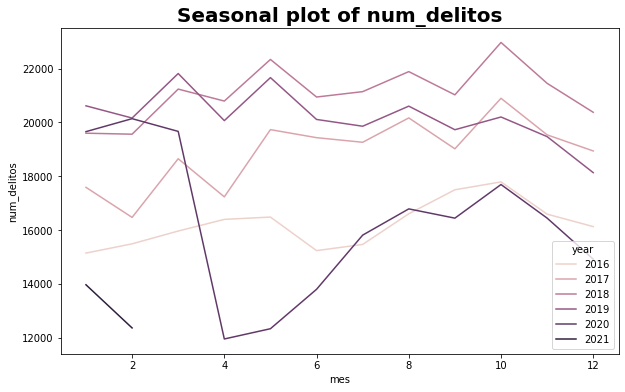

In [684]:
aux = pgr_seasonality.groupby(['year','mes']).sum()[['num_delitos']].reset_index()
fig = plt.figure(figsize=(10,6))
sns.lineplot(aux['mes'], aux['num_delitos'], hue=aux['year'])
plt.title('Seasonal plot of num_delitos', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#('Month', fontsize = 16, fontdict=dict(weight='bold'))
#fig.set_ylabel('Num delitos', fontsize = 16, fontdict=dict(weight='bold'))

/home/abraxas/venv/opi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal plot of num_delitos')

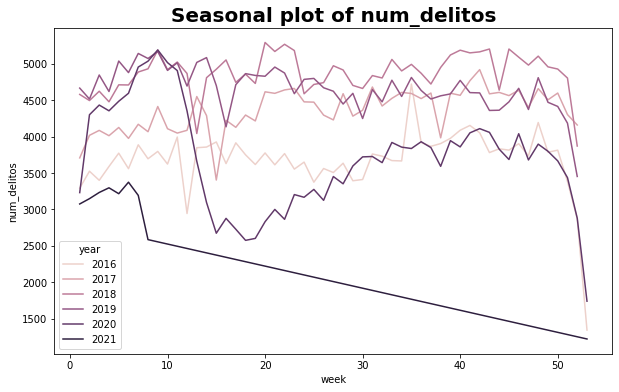

In [691]:
aux = pgr_seasonality.groupby(['year','week']).sum()[['num_delitos']].reset_index()
fig = plt.figure(figsize=(10,6))
sns.lineplot(aux['week'], aux['num_delitos'], hue=aux['year'])
plt.title('Seasonal plot of num_delitos', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#('Month', fontsize = 16, fontdict=dict(weight='bold'))
#fig.set_ylabel('Num delitos', fontsize = 16, fontdict=dict(weight='bold'))

/home/abraxas/venv/opi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal plot of num_delitos')

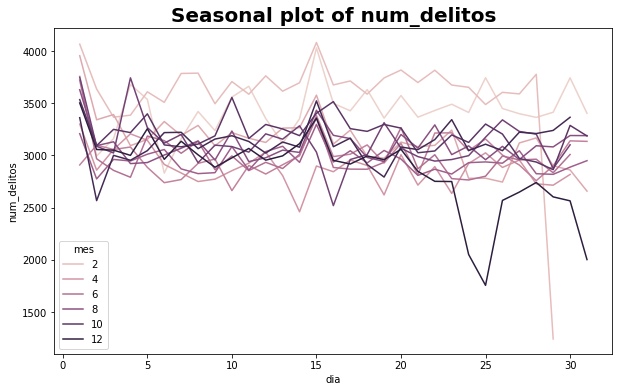

In [685]:
aux = pgr_seasonality.groupby(['mes','dia']).sum()[['num_delitos']].reset_index()
fig = plt.figure(figsize=(10,6))
sns.lineplot(aux['dia'], aux['num_delitos'], hue=aux['mes'])
plt.title('Seasonal plot of num_delitos', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#('Month', fontsize = 16, fontdict=dict(weight='bold'))
#fig.set_ylabel('Num delitos', fontsize = 16, fontdict=dict(weight='bold'))

/home/abraxas/venv/opi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal plot of num_delitos')

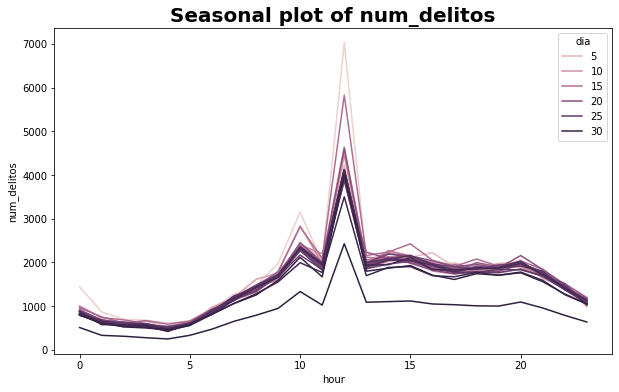

In [687]:
aux = pgr_seasonality.groupby(['dia','hour']).sum()[['num_delitos']].reset_index()
fig = plt.figure(figsize=(10,6))
sns.lineplot(aux['hour'], aux['num_delitos'], hue=aux['dia'])
plt.title('Seasonal plot of num_delitos', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#('Month', fontsize = 16, fontdict=dict(weight='bold'))
#fig.set_ylabel('Num delitos', fontsize = 16, fontdict=dict(weight='bold'))

In [690]:
pgr_seasonality[pgr_seasonality.hour == 11].delito.value_counts(1)

VIOLENCIA FAMILIAR                         0.101058
FRAUDE                                     0.073872
ROBO DE OBJETOS                            0.066469
AMENAZAS                                   0.058714
ROBO A NEGOCIO SIN VIOLENCIA               0.049898
                                             ...   
ROBO A PASAJERO EN ECOBUS CON VIOLENCIA    0.000017
ENRIQUECIMIENTO ILICITO                    0.000017
TENTATIVA DE FEMINICIDIO                   0.000017
ROBO A TRANSEUNTE EN CINE CON VIOLENCIA    0.000017
OTROS DELITOS                              0.000017
Name: delito, Length: 274, dtype: float64

## ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [705]:
pgr_rep_alcaldia = pd.pivot_table(data=pgr[['num_delitos','delito','alcaldia_hechos']],index='delito',columns='alcaldia_hechos',
                                  aggfunc=np.sum).fillna(0)


In [706]:
pgr_rep_alcaldia.columns = [x[1] for x in pgr_rep_alcaldia.columns]

In [707]:
pgr_rep_alcaldia['TOTAL'] = pgr_rep_alcaldia.sum(axis=1)

In [708]:
pgr_rep_alcaldia.drop('nan',axis=1,inplace=True)

In [710]:
columnas = [x for x in pgr_rep_alcaldia.columns if x!='TOTAL']
for col in columnas:
    pgr_rep_alcaldia[col] = pgr_rep_alcaldia[col]/pgr_rep_alcaldia['TOTAL']


In [715]:
pgr_rep_alcaldia.drop('TOTAL',axis=1,inplace=True)

In [722]:
pgr_rep_alcaldia

ABALA  ACAMBARO   ACAMBAY  \
delito                                                                          
ABANDONO DE PERSONA                                   0.0  0.000000  0.000000   
ABORTO                                                0.0  0.000000  0.000000   
ABUSO DE AUTORIDAD                                    0.0  0.000000  0.000000   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...    0.0  0.000000  0.000000   
ABUSO DE CONFIANZA                                    0.0  0.000000  0.000000   
...                                                   ...       ...       ...   
VIOLACION TUMULTUARIA                                 0.0  0.000000  0.000000   
VIOLACION TUMULTUARIA EQUIPARADA                      0.0  0.000000  0.000000   
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO         0.0  0.000000  0.000000   
VIOLACION Y ROBO DE VEHICULO                          0.0  0.000000  0.000000   
VIOLENCIA FAMILIAR                                    0.0  0.000009  0.000009   

                                                    ACAPULCO DE JUAREZ  \
delito                                                                   
ABANDONO DE PERSONA                                           0.000000   
ABORTO                                                        0.000000   
ABUSO DE AUTORIDAD                                            0.000000   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...            0.000000   
ABUSO DE CONFIANZA                                            0.000000   
...                                                                ...   
VIOLACION TUMULTUARIA                                         0.000000   
VIOLACION TUMULTUARIA EQUIPARADA                              0.000000   
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO                 0.000000   
VIOLACION Y ROBO DE VEHICULO                                  0.000000   
VIOLENCIA FAMILIAR                                            0.000026   

                                                    ACATLAN  ACATZINGO  \
delito                                                                   
ABANDONO DE PERSONA                                     0.0        0.0   
ABORTO                                                  0.0        0.0   
ABUSO DE AUTORIDAD                                      0.0        0.0   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...      0.0        0.0   
ABUSO DE CONFIANZA                                      0.0        0.0   
...                                                     ...        ...   
VIOLACION TUMULTUARIA                                   0.0        0.0   
VIOLACION TUMULTUARIA EQUIPARADA                        0.0        0.0   
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO           0.0        0.0   
VIOLACION Y ROBO DE VEHICULO                            0.0        0.0   
VIOLENCIA FAMILIAR                                      0.0        0.0   

                                                    ACAXOCHITLAN  ACAYUCAN  \
delito                                                                       
ABANDONO DE PERSONA                                          0.0       0.0   
ABORTO                                                       0.0       0.0   
ABUSO DE AUTORIDAD                                           0.0       0.0   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...           0.0       0.0   
ABUSO DE CONFIANZA                                           0.0       0.0   
...                                                          ...       ...   
VIOLACION TUMULTUARIA                                        0.0       0.0   
VIOLACION TUMULTUARIA EQUIPARADA                             0.0       0.0   
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO                0.0       0.0   
VIOLACION Y ROBO DE VEHICULO                                 0.0       0.0   
VIOLENCIA FAMILIAR                                           0.0       0.0   

                                                     ACOL

In [743]:
dicc = {}
for delito in pgr_rep_alcaldia.index:
    maximo = pgr_rep_alcaldia.loc[delito].max()
    if maximo > 0.5:
        alcaldia = pgr_rep_alcaldia.loc[delito].idxmax(axis = 1, skipna = True)
        if alcaldia in dicc.keys():
            aux = dicc[alcaldia]
            dicc.update({alcaldia:aux+[delito]})
        else:
            dicc[alcaldia] = [delito]

In [744]:
dicc

{'BENITO JUAREZ': ['ASOCIACION DELICTUOSA', 'CONTAGIO VENERERO'],
 'CUAUHTEMOC': ['CALUMNIAS',
  'COACCION DE SERVIDORES PUBLICOS',
  'DDH FRVT',
  'DDH OFICIO COLABORACION',
  'DELITOS DE ABOGADOS PATRONOS Y LITIGANTES',
  'DESOBEDENCIA DE PARTICULARES',
  'FALSEDAD ANTE AUTORIDADES',
  'FALSEDAD DE DECLARACIONES',
  'ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA',
  'ROBO A PASAJERO EN TREN SUBURBANO CON VIOLENCIA',
  'ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA',
  'ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA',
  'ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA',
  'ROBO DE INFANTE',
  'ULTRAJES'],
 'TLAHUAC': ['CONTRA LA LEY GENERAL DE EXPLOSIVOS'],
 'IZTAPALAPA': ['DDH CERESO',
  'ROBO DE VEHICULO Y NOMINA CON VIOLENCIA',
  'ROBO DURANTE TRASLADO DE VALORES (NOMINA) CON VIOLENCIA',
  'VIOLACION A LOS DERECHOS HUMANOS'],
 'GUSTAVO A MADERO': ['DESACATO',
  'LEY FEDERAL DE ARMAS DE FUEGO Y EXPLOSIVOS',
  'UTILIZACION INDEBIDA DE LA VIA PUBLICA'],
 'TLALPAN': ['PROCREACION ASISTIDA'],
 

In [720]:
pgr_rep_alcaldia.loc['ABANDONO DE PERSONA'].idxmax(axis = 1, skipna = True)

'CUAUHTEMOC'

## Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).

In [747]:
inegi = pd.read_csv('data/RESAGEBURB_09TXT10.txt',sep='\t')

In [754]:
from shapely.geometry import shape, Point
import shapefile

In [769]:
# read your shapefile
ageb_u = shapefile.Reader("data/09_ciudaddemexico/conjunto de datos/09a.shp")
ageb_r = shapefile.Reader("data/09_ciudaddemexico/conjunto de datos/09ar.shp")

# get the shapes
shapes_u = ageb_u.shapes()
shapes_r = ageb_r.shapes()

In [ ]:
import geopandas as gpd
df_neighbourhoods = gpd.read_file("../data/Neighbourhoods/NEIGHBORHOODS_WGS84.shp")